In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
from IPython.display import HTML
plotly.tools.set_credentials_file(username='analiselp', api_key='udECHGkQwiOSw4pNPsCh')

In [2]:
sns.set()
america_colors = ["#eeef09", "#1f77b4", "#0d560d", "#3a3838"]
europe_ns_colors = ["#0c3ec9", "#b5070a", "#ff7f0e", "#b70b82"]
europe_we_colors = ["#8c8c8c", "#4c2503", "#e377c2", "#112049"]
age_colors = ["#1f77b4", "#9467bd", "#03c403", "#e377c2", "#4c2503", "#3a3838"]
aao_colors = ["#a0a00c", "#9467bd", "#6008af", "#03c403"]
south_america_colors = ["#eeef09", "#1f77b4"]
central_america_colors = ["#0d560d"]
north_america_colors = ["#3a3838"]
eastern_europe_colors = ["#e377c2", "#112049"]
northern_europe_colors = ["#ff7f0e", "#b70b82"]
southern_europe_colors = ["#0c3ec9", "#b5070a"]
western_europe_colors = ["#8c8c8c", "#4c2503"]
asia_colors = ["#9467bd", "#6008af"]
africa_colors = ["#03c403"]
oceania_colors = ["#a0a00c"]
male_female_colors = ["#d62728", "#2ca02c"]
russia_sweden_colors = ["#1f77b4","#ff7f0e"]

In [3]:
#Para manter a ordem das cores:

"""
Australia = "#a0a00c" = Mostarda
Brazil = "#eeef09" = Amarelo
Chile = "#1f77b4" = Azul Claro
Germany = "#8c8c8c" = Cinza
Israel = "#9467bd" = Lilás
Italy = "#0c3ec9" = Azul
Japan = "#6008af" = Roxo
Mexico = "#0d560d" = Verde
Netherlands = "#4c2503" = Marrom
Poland = "#e377c2" = Rosa
Russia = "#112049" = Azul Marinho
South Africa = "#03c403" = Verde Claro
Spain = "#b5070a" = Vermelho
Sweden = "#ff7f0e" = Laranja
United Kingdom = "#b70b82" = Rosa Choque
United States = "#3a3838" = Cinza Escuro
"""

'\nAustralia = "#a0a00c" = Mostarda\nBrazil = "#eeef09" = Amarelo\nChile = "#1f77b4" = Azul Claro\nGermany = "#8c8c8c" = Cinza\nIsrael = "#9467bd" = Lilás\nItaly = "#0c3ec9" = Azul\nJapan = "#6008af" = Roxo\nMexico = "#0d560d" = Verde\nNetherlands = "#4c2503" = Marrom\nPoland = "#e377c2" = Rosa\nRussia = "#112049" = Azul Marinho\nSouth Africa = "#03c403" = Verde Claro\nSpain = "#b5070a" = Vermelho\nSweden = "#ff7f0e" = Laranja\nUnited Kingdom = "#b70b82" = Rosa Choque\nUnited States = "#3a3838" = Cinza Escuro\n'

In [4]:
suicide_csv = "../csvs/suicide.csv"
hdi_csv = "../csvs/hdi.csv"
country_continent_csv = "../csvs/countryContinent.csv"
total_population_csv = "../csvs/totalPopulationCountries.csv"
total_populationF_csv = "../csvs/totalPopulationF.csv"
total_populationM_csv = "../csvs/totalPopulationM.csv"
gender_inequality_csv = "../csvs/genderInequality.csv"
users_internet_csv = "../csvs/totalUsersInternet.csv"
employmentto_population_csv = "../csvs/employmenttoPopulationRatio(%ages15andOlder).csv"

In [5]:
#Lendo csv.
suicide_df = pd.read_csv(suicide_csv, sep=";")
hdi_df = pd.read_csv(hdi_csv, sep=";")
country_continent_df = pd.read_csv(country_continent_csv)
total_population_df = pd.read_csv(total_population_csv)
total_populationF_df = pd.read_csv(total_populationF_csv, sep=";")
total_populationM_df = pd.read_csv(total_populationM_csv, sep=";")
gender_inequality_df = pd.read_csv(gender_inequality_csv)
users_internet_df = pd.read_csv(users_internet_csv, sep=";")
employmentto_population_df = pd.read_csv(employmentto_population_csv)

In [6]:
#Fazendo cópias do Dataframe para trabalhar com as cópias.
suicide = suicide_df.copy()
hdi = hdi_df.copy()
country_continent = country_continent_df.copy()
total_population = total_population_df.copy()
total_populationF = total_populationF_df.copy()
total_populationM = total_populationM_df.copy()
gender_inequality = gender_inequality_df.copy()
users_internet = users_internet_df.copy()
employmentto_population = employmentto_population_df.copy()

In [7]:
#Fazendo drop em colunas que não serão ultilizadas.
country_continent.drop("code_2", axis=1, inplace=True)
country_continent.drop("code_3", axis=1, inplace=True)
country_continent.drop("country_code", axis=1, inplace=True)
country_continent.drop("iso_3166_2", axis=1, inplace=True)
country_continent.drop("region_code", axis=1, inplace=True)
country_continent.drop("sub_region_code", axis=1, inplace=True)

In [8]:
#Junatando suicidio com continentes, para obter os nomes dos continentes e sub-regiões.
add_continent = pd.merge(suicide,country_continent,on=["country"], how="inner")

#Juntando continentes(gerado no merge anterior) com o idh, para obter a coluna de idh.
add_hdi = pd.merge(add_continent,hdi, on=["country","year"], how="inner")

#Adicionando a coluna de população total.
add_total_population = pd.merge(add_hdi,total_population, on=["country","year"], how="inner")

#Adicionando a coluna de população total Feminina.
add_total_populationF = pd.merge(add_total_population, total_populationF,on=["country","year"], how="inner")

#Adicionando a coluna de população total Masculina.
add_total_populationM = pd.merge(add_total_populationF, total_populationM,on=["country","year"], how="inner")

#Adicionando a coluna de desigualdade de gênero.
add_gender_inequality = pd.merge(add_total_populationM, gender_inequality,on=["country","year"], how="inner")

#Adicionando a coluna de total de usuários de internet.
add_users_internet = pd.merge(add_gender_inequality, users_internet,on=["country","year"], how="inner")

#Adicionando a coluna de taxa de empregados a partir de 15 anos.
result = pd.merge(add_users_internet,employmentto_population,on=["country","year"], how="inner")

In [9]:
def generate_array(array1, array2):
    nova_lista = []
    np.asarray(nova_lista)
    for i in range(len(array1)):
        nova_lista.append(array1[i])
        nova_lista.append(array2[i])
    return nova_lista

In [10]:
#México
mexico_filter_year = add_total_populationM[(add_total_populationM["country"] == "Mexico") & (add_total_populationM["year"] >= 2009) & (add_total_populationM["year"] < 2016)]
mexico_filter_year = mexico_filter_year.groupby(["year", "totalPopulationFemale", "totalPopulationMale"], as_index=False).sum()
mexico_filter_year = mexico_filter_year.diff()
mex_lista_female = np.asarray(mexico_filter_year["totalPopulationFemale"])
mex_lista_female = (mex_lista_female[~np.isnan(mex_lista_female)]) / 100000
mex_lista_male = np.asarray(mexico_filter_year["totalPopulationMale"])
mex_lista_male = (mex_lista_male[~np.isnan(mex_lista_male)]) / 100000
new_mex_sex = generate_array(mex_lista_female,mex_lista_male)

#Brasil
brazil_filter_year = add_total_populationM[(add_total_populationM["country"] == "Brazil") & (add_total_populationM["year"] >= 2009) & (add_total_populationM["year"] < 2016)]
brazil_filter_year = brazil_filter_year.groupby(["year", "totalPopulationFemale", "totalPopulationMale"], as_index=False).sum()
brazil_filter_year = brazil_filter_year.diff()
bra_lista_female = np.asarray(brazil_filter_year["totalPopulationFemale"])
bra_lista_female = (bra_lista_female[~np.isnan(bra_lista_female)]) / 100000
bra_lista_male = np.asarray(brazil_filter_year["totalPopulationMale"])
bra_lista_male = (bra_lista_male[~np.isnan(bra_lista_male)]) / 100000
new_bra_sex = (generate_array(bra_lista_female,bra_lista_male))

#Estados Unidos
unitedStates_filter_year = add_total_populationM[(add_total_populationM["country"] == "United States") & (add_total_populationM["year"] >= 2009) & (add_total_populationM["year"] < 2016)]
unitedStates_filter_year = unitedStates_filter_year.groupby(["year", "totalPopulationFemale", "totalPopulationMale"], as_index=False).sum()
unitedStates_filter_year = unitedStates_filter_year.diff()
usa_lista_female = np.asarray(unitedStates_filter_year["totalPopulationFemale"])
usa_lista_female = (usa_lista_female[~np.isnan(usa_lista_female)]) / 100000
usa_lista_male = np.asarray(unitedStates_filter_year["totalPopulationMale"])
usa_lista_male = (usa_lista_male[~np.isnan(usa_lista_male)]) / 100000
new_usa_sex = generate_array(usa_lista_female,usa_lista_male)

#Chile
chile_filter_year = add_total_populationM[(add_total_populationM["country"] == "Chile") & (add_total_populationM["year"] >= 2009) & (add_total_populationM["year"] < 2016)]
chile_filter_year = chile_filter_year.groupby(["year", "totalPopulationFemale", "totalPopulationMale"], as_index=False).sum()
chile_filter_year = chile_filter_year.diff()
chi_lista_female = np.asarray(chile_filter_year["totalPopulationFemale"])
chi_lista_female = (chi_lista_female[~np.isnan(chi_lista_female)]) / 100000
chi_lista_male = np.asarray(chile_filter_year["totalPopulationMale"])
chi_lista_male = (chi_lista_male[~np.isnan(chi_lista_male)]) / 100000
new_chi_sex = generate_array(chi_lista_female,chi_lista_male)

#Japão
japan_filter_year = add_total_populationM[(add_total_populationM["country"] == "Japan") & (add_total_populationM["year"] >= 2009) & (add_total_populationM["year"] < 2016)]
japan_filter_year = japan_filter_year.groupby(["year", "totalPopulationFemale", "totalPopulationMale"], as_index=False).sum()
japan_filter_year = japan_filter_year.diff()
jap_lista_female = np.asarray(japan_filter_year["totalPopulationFemale"])
jap_lista_female = (jap_lista_female[~np.isnan(jap_lista_female)]) / 100000
jap_lista_male = np.asarray(japan_filter_year["totalPopulationMale"])
jap_lista_male = (jap_lista_male[~np.isnan(jap_lista_male)]) / 100000
new_jap_sex = generate_array(jap_lista_female,jap_lista_male)

#Austrália
australia_filter_year = add_total_populationM[(add_total_populationM["country"] == "Australia") & (add_total_populationM["year"] >= 2009) & (add_total_populationM["year"] < 2016)]
australia_filter_year = australia_filter_year.groupby(["year", "totalPopulationFemale", "totalPopulationMale"], as_index=False).sum()
australia_filter_year = australia_filter_year.diff()
aus_lista_female = np.asarray(australia_filter_year["totalPopulationFemale"])
aus_lista_female = (aus_lista_female[~np.isnan(aus_lista_female)]) / 100000
aus_lista_male = np.asarray(australia_filter_year["totalPopulationMale"])
aus_lista_male = (aus_lista_male[~np.isnan(aus_lista_male)]) / 100000
new_aus_sex = generate_array(aus_lista_female,aus_lista_male)

#África do Sul
southAfrica_filter_year = add_total_populationM[(add_total_populationM["country"] == "South Africa") & (add_total_populationM["year"] >= 2009) & (add_total_populationM["year"] < 2016)]
southAfrica_filter_year = southAfrica_filter_year.groupby(["year", "totalPopulationFemale", "totalPopulationMale"], as_index=False).sum()
southAfrica_filter_year = southAfrica_filter_year.diff()
sou_lista_female = np.asarray(southAfrica_filter_year["totalPopulationFemale"])
sou_lista_female = (sou_lista_female[~np.isnan(sou_lista_female)]) / 100000
sou_lista_male = np.asarray(southAfrica_filter_year["totalPopulationMale"])
sou_lista_male = (sou_lista_male[~np.isnan(sou_lista_male)]) / 100000
new_sou_sex = generate_array(sou_lista_female,sou_lista_male)

#Israel
israel_filter_year = add_total_populationM[(add_total_populationM["country"] == "Israel") & (add_total_populationM["year"] >= 2009) & (add_total_populationM["year"] < 2016)]
israel_filter_year = israel_filter_year.groupby(["year", "totalPopulationFemale", "totalPopulationMale"], as_index=False).sum()
israel_filter_year = israel_filter_year.diff()
isr_lista_female = np.asarray(israel_filter_year["totalPopulationFemale"])
isr_lista_female = (isr_lista_female[~np.isnan(isr_lista_female)]) / 100000
isr_lista_male = np.asarray(israel_filter_year["totalPopulationMale"])
isr_lista_male = (isr_lista_male[~np.isnan(isr_lista_male)]) / 100000
new_isr_sex = generate_array(isr_lista_female,isr_lista_male)

#Suécia
sweden_filter_year = add_total_populationM[(add_total_populationM["country"] == "Sweden") & (add_total_populationM["year"] >= 2009) & (add_total_populationM["year"] < 2016)]
sweden_filter_year = sweden_filter_year.groupby(["year", "totalPopulationFemale", "totalPopulationMale"], as_index=False).sum()
sweden_filter_year = sweden_filter_year.diff()
swe_lista_female = np.asarray(sweden_filter_year["totalPopulationFemale"])
swe_lista_female = (swe_lista_female[~np.isnan(swe_lista_female)]) / 100000
swe_lista_male = np.asarray(sweden_filter_year["totalPopulationMale"])
swe_lista_male = (swe_lista_male[~np.isnan(swe_lista_male)]) / 100000
new_swe_sex = generate_array(swe_lista_female,swe_lista_male)

#Polônia
poland_filter_year = add_total_populationM[(add_total_populationM["country"] == "Poland") & (add_total_populationM["year"] >= 2009) & (add_total_populationM["year"] < 2016)]
poland_filter_year = poland_filter_year.groupby(["year", "totalPopulationFemale", "totalPopulationMale"], as_index=False).sum()
poland_filter_year = poland_filter_year.diff()
pol_lista_female = np.asarray(poland_filter_year["totalPopulationFemale"])
pol_lista_female = (pol_lista_female[~np.isnan(pol_lista_female)]) / 100000
pol_lista_male = np.asarray(poland_filter_year["totalPopulationMale"])
pol_lista_male = (pol_lista_male[~np.isnan(pol_lista_male)]) / 100000
new_pol_sex = generate_array(pol_lista_female,pol_lista_male)

#Holanda
netherlands_filter_year = add_total_populationM[(add_total_populationM["country"] == "Netherlands") & (add_total_populationM["year"] >= 2009) & (add_total_populationM["year"] < 2016)]
netherlands_filter_year = netherlands_filter_year.groupby(["year", "totalPopulationFemale", "totalPopulationMale"], as_index=False).sum()
netherlands_filter_year = netherlands_filter_year.diff()
net_lista_female = np.asarray(netherlands_filter_year["totalPopulationFemale"])
net_lista_female = (net_lista_female[~np.isnan(net_lista_female)]) / 100000
net_lista_male = np.asarray(netherlands_filter_year["totalPopulationMale"])
net_lista_male = (net_lista_male[~np.isnan(net_lista_male)]) / 100000
new_net_sex = generate_array(net_lista_female,net_lista_male)

#Alemanha
germany_filter_year = add_total_populationM[(add_total_populationM["country"] == "Germany") & (add_total_populationM["year"] >= 2009) & (add_total_populationM["year"] < 2016)]
germany_filter_year = germany_filter_year.groupby(["year", "totalPopulationFemale", "totalPopulationMale"], as_index=False).sum()
germany_filter_year = germany_filter_year.diff()
ger_lista_female = np.asarray(germany_filter_year["totalPopulationFemale"])
ger_lista_female = (ger_lista_female[~np.isnan(ger_lista_female)]) / 100000
ger_lista_male = np.asarray(germany_filter_year["totalPopulationMale"])
ger_lista_male = (ger_lista_male[~np.isnan(ger_lista_male)]) / 100000
new_ger_sex = generate_array(ger_lista_female,ger_lista_male)

#Reino Unido
unitedKingdom_filter_year = add_total_populationM[(add_total_populationM["country"] == "United Kingdom") & (add_total_populationM["year"] >= 2009) & (add_total_populationM["year"] < 2016)]
unitedKingdom_filter_year = unitedKingdom_filter_year.groupby(["year", "totalPopulationFemale", "totalPopulationMale"], as_index=False).sum()
unitedKingdom_filter_year = unitedKingdom_filter_year.diff()
unk_lista_female = np.asarray(unitedKingdom_filter_year["totalPopulationFemale"])
unk_lista_female = (unk_lista_female[~np.isnan(unk_lista_female)]) / 100000
unk_lista_male = np.asarray(unitedKingdom_filter_year["totalPopulationMale"])
unk_lista_male = (unk_lista_male[~np.isnan(unk_lista_male)]) / 100000
new_unk_sex = generate_array(unk_lista_female,unk_lista_male)

#Itália
italy_filter_year = add_total_populationM[(add_total_populationM["country"] == "Italy") & (add_total_populationM["year"] >= 2009) & (add_total_populationM["year"] < 2016)]
italy_filter_year = italy_filter_year.groupby(["year", "totalPopulationFemale", "totalPopulationMale"], as_index=False).sum()
italy_filter_year = italy_filter_year.diff()
ita_lista_female = np.asarray(italy_filter_year["totalPopulationFemale"])
ita_lista_female = (ita_lista_female[~np.isnan(ita_lista_female)]) / 100000
ita_lista_male = np.asarray(italy_filter_year["totalPopulationMale"])
ita_lista_male = (ita_lista_male[~np.isnan(ita_lista_male)]) / 100000
new_ita_sex = generate_array(ita_lista_female,ita_lista_male)

#Espanha
spain_filter_year = add_total_populationM[(add_total_populationM["country"] == "Spain") & (add_total_populationM["year"] >= 2009) & (add_total_populationM["year"] < 2016)]
spain_filter_year = spain_filter_year.groupby(["year", "totalPopulationFemale", "totalPopulationMale"], as_index=False).sum()
spain_filter_year = spain_filter_year.diff()
spa_lista_female = np.asarray(spain_filter_year["totalPopulationFemale"])
spa_lista_female = (spa_lista_female[~np.isnan(spa_lista_female)]) / 100000
spa_lista_male = np.asarray(spain_filter_year["totalPopulationMale"])
spa_lista_male = (spa_lista_male[~np.isnan(spa_lista_male)]) / 100000
new_spa_sex = generate_array(spa_lista_female,spa_lista_male)

#Rússia
russia_filter_year = add_total_populationM[(add_total_populationM["country"] == "Russian Federation") & (add_total_populationM["year"] >= 2009) & (add_total_populationM["year"] < 2016)]
russia_filter_year = russia_filter_year.groupby(["year", "totalPopulationFemale", "totalPopulationMale"], as_index=False).sum()
russia_filter_year = russia_filter_year.diff()
rus_lista_female = np.asarray(russia_filter_year["totalPopulationFemale"])
rus_lista_female = (rus_lista_female[~np.isnan(rus_lista_female)]) / 100000
rus_lista_male = np.asarray(russia_filter_year["totalPopulationMale"])
rus_lista_male = (rus_lista_male[~np.isnan(rus_lista_male)]) / 100000
new_rus_sex = generate_array(rus_lista_female,rus_lista_male)

In [11]:
#America
mexico= result[(result["country"] == "Mexico") & (result["year"] > 2005)]
brazil= result[(result["country"] == "Brazil") & (result["year"] > 2005)]
unitedStates= result[(result["country"] == "United States") & (result["year"] > 2005)]
chile= result[(result["country"] == "Chile") & (result["year"] > 2005)]

#Asia, africa e oceania 
japan = result[(result["country"] == "Japan") & (result["year"] > 2005)]
australia = result[(result["country"] == "Australia") & (result["year"] > 2005)]
southAfrica = result[(result["country"] == "South Africa") & (result["year"] > 2005)]
israel = result[(result["country"] == "Israel") & (result["year"] > 2005)]

#Europa
sweden = result[(result["country"] == "Sweden") & (result["year"] > 2005)]
poland = result[(result["country"] == "Poland") & (result["year"] > 2005)]
netherlands = result[(result["country"] == "Netherlands") & (result["year"] > 2005)]
germany = result[(result["country"] == "Germany") & (result["year"] > 2005)]
unitedKingdom = result[(result["country"] == "United Kingdom") & (result["year"] > 2005)]
italy = result[(result["country"] == "Italy") & (result["year"] > 2005)]
spain = result[(result["country"] == "Spain") & (result["year"] > 2005)]
russia = result[(result["country"] == "Russian Federation") & (result["year"] > 2005)]

In [12]:
#Criação de frames por Continente

frames = [mexico, brazil, chile, unitedStates]
america = pd.concat(frames, keys=['a', 'b', 'c', 'd'])

frames = [japan, israel, australia, southAfrica]
asiaAfricaOceania= pd.concat(frames, keys=['a', 'b', 'c', 'd'])

frames = [sweden, unitedKingdom, italy, spain]
europe_northern_southern = pd.concat(frames, keys=['a', 'b', 'c', 'd'])

frames = [poland, netherlands, germany, russia]
europe_western_eastern = pd.concat(frames, keys=['a', 'b', 'c', 'd'])

In [13]:
#Contatenando df de Russia e Suécia

frames = [sweden, russia]
my_group = pd.concat(frames, keys=['a', 'b'])
my_group = my_group.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder", "continent"], as_index=False).sum()

In [14]:
#Data frame Suicídio por ano e por região.

group_america_year = america.groupby(["year","suicides_no"], as_index=False).mean()
group_aao_year = asiaAfricaOceania.groupby(["year","suicides_no"], as_index=False).mean()
group_europe_ns_year = europe_northern_southern.groupby(["year","suicides_no"], as_index=False).mean()
group_europe_we_year = europe_western_eastern.groupby(["year","suicides_no"], as_index=False).mean()

In [15]:
#Data frame Suicídio por Idade e por região.

group_america_age = america.groupby(["age","suicides_no"], as_index=False).mean()
group_aao_age = asiaAfricaOceania.groupby(["age","suicides_no"], as_index=False).mean()
group_europe_ns_age = europe_northern_southern.groupby(["age","suicides_no"], as_index=False).mean()
group_europe_we_age = europe_western_eastern.groupby(["age","suicides_no"], as_index=False).mean()

In [16]:
group_america_sex = america.groupby(["sex","suicides_no"], as_index=False).mean()
group_aao_sex = asiaAfricaOceania.groupby(["sex","suicides_no"], as_index=False).mean()
group_europe_ns_sex = europe_northern_southern.groupby(["sex","suicides_no"], as_index=False).mean()
group_europe_we_sex = europe_western_eastern.groupby(["sex","suicides_no"], as_index=False).mean()

In [17]:
def generate_boxplot_year_suicide(df, title, ylim):
    plt.ylim(-50,ylim)
    plt.ylabel("Número de Suicídio")
    plt.title(title)
    plt.rcParams["figure.figsize"] = (10,12)
    df_2010 = df[(df["year"] == 2010)]
    df_2011 = df[(df["year"] == 2011)]
    df_2012 = df[(df["year"] == 2012)]
    df_2013 = df[(df["year"] == 2013)]
    df_2014 = df[(df["year"] == 2014)]
    df_2015 = df[(df["year"] == 2015)]
    df_years = [np.asarray(df_2010["suicides_no"]), np.asarray(df_2011["suicides_no"]), np.asarray(df_2012["suicides_no"]), np.asarray(df_2013["suicides_no"]), np.asarray(df_2014["suicides_no"]), np.asarray(df_2015["suicides_no"])]
    plt.boxplot(df_years,patch_artist=True,labels=["2010", "2011", "2012", "2013", "2014", "2015"])
    plt.show()
    

In [18]:
def generate_boxplot_age_suicide(df, title, ylim):
    plt.ylim(-50,ylim)
    plt.ylabel("Número de Suicídio")
    plt.title(title)
    plt.rcParams["figure.figsize"] = (10,12)
    df_age_05_14= df[(df["age"] == "05-14 years")]
    df_age_15_24 = df[(df["age"] == "15-24 years")]
    df_age_25_34 = df[(df["age"] == "25-34 years")]
    df_age_35_54 = df[(df["age"] == "35-54 years")]
    df_age_55_74 = df[(df["age"] == "55-74 years")]
    df_age_75 = df[(df["age"] == "75+ years")]
    df_age = [np.asarray(df_age_05_14["suicides_no"]), np.asarray(df_age_15_24["suicides_no"]), np.asarray(df_age_25_34["suicides_no"]), np.asarray(df_age_35_54["suicides_no"]), np.asarray(df_age_55_74["suicides_no"]), np.asarray(df_age_75["suicides_no"])]
    plt.boxplot(df_age,patch_artist=True,labels=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"])
    plt.show()

In [19]:
def generate_boxplot_sex_suicide(df, title, ylim):
    plt.ylim(-50,ylim)
    plt.ylabel("Número de Suicídio")
    plt.title(title)
    plt.rcParams["figure.figsize"] = (10,12)
    df_male = df[(df["sex"] == "male")]
    df_female = df[(df["sex"] == "female")]
    df_sex = [np.asarray(df_male["suicides_no"]), np.asarray(df_female["suicides_no"])]
    plt.boxplot(df_sex,patch_artist=True,labels=["Masculino", "Feminino"])
    plt.show()

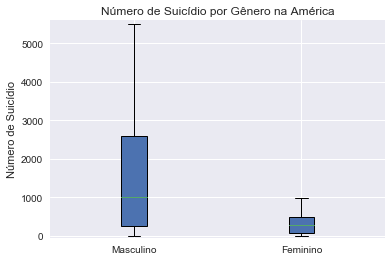

In [20]:
generate_boxplot_sex_suicide(group_america_sex, "Número de Suicídio por Gênero na América", 5600)

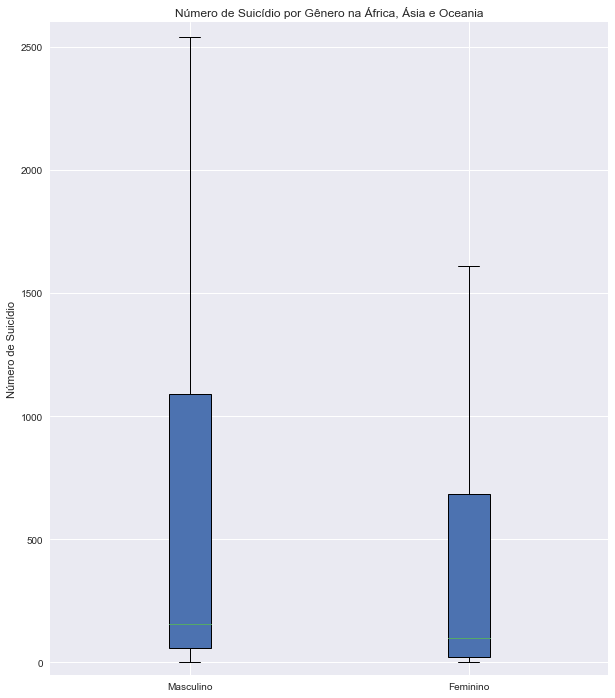

In [21]:
generate_boxplot_sex_suicide(group_aao_sex, "Número de Suicídio por Gênero na África, Ásia e Oceania", 2600)

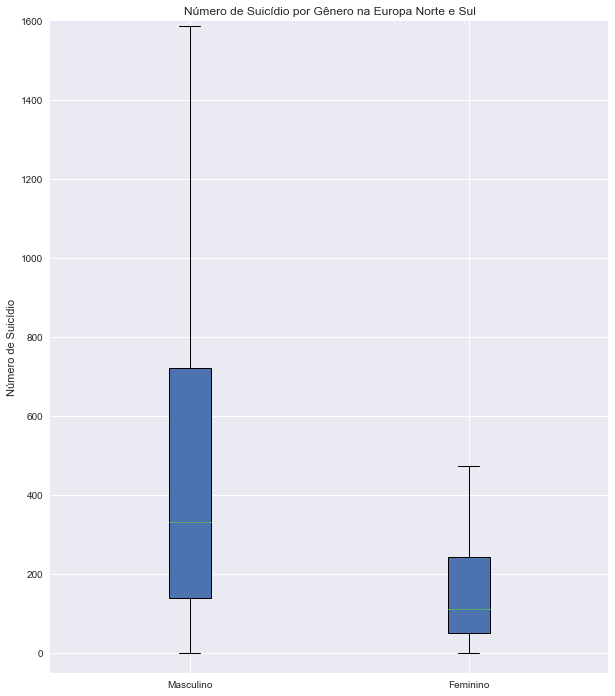

In [22]:
generate_boxplot_sex_suicide(group_europe_ns_sex, "Número de Suicídio por Gênero na Europa Norte e Sul", 1600)

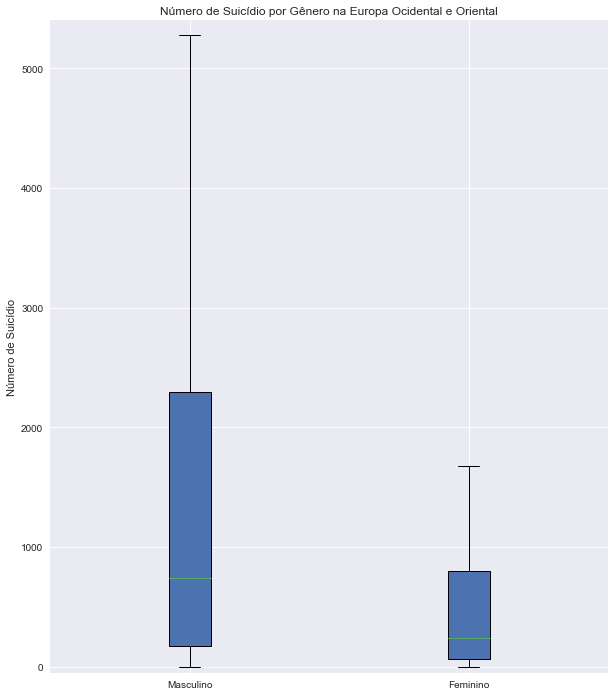

In [23]:
generate_boxplot_sex_suicide(group_europe_we_sex, "Número de Suicídio por Gênero na Europa Ocidental e Oriental", 5400)

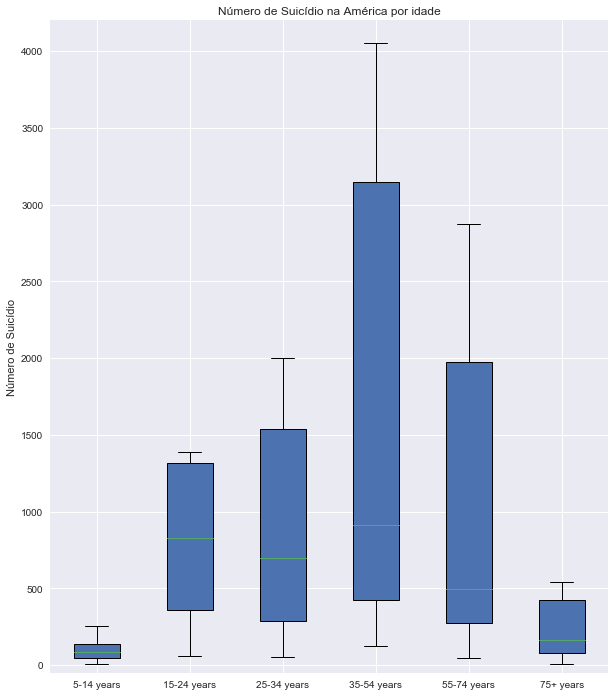

In [24]:
generate_boxplot_age_suicide(group_america_age, "Número de Suicídio na América por idade", 4200)

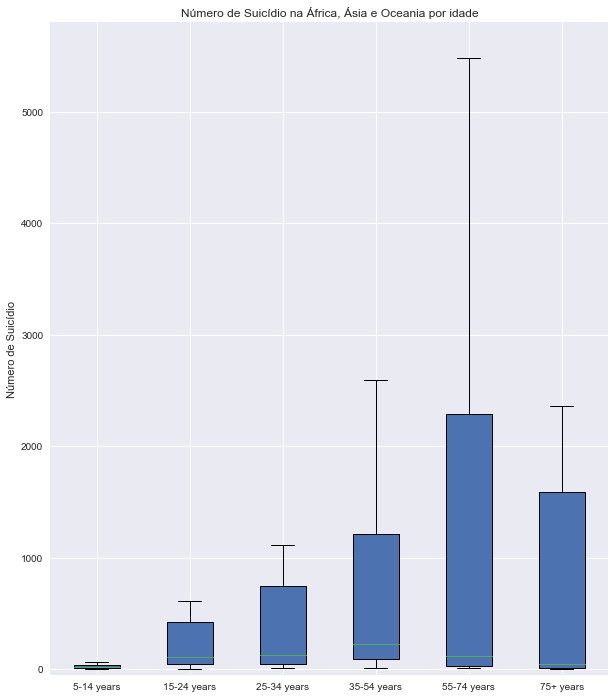

In [25]:
generate_boxplot_age_suicide(group_aao_age, "Número de Suicídio na África, Ásia e Oceania por idade", 5800)

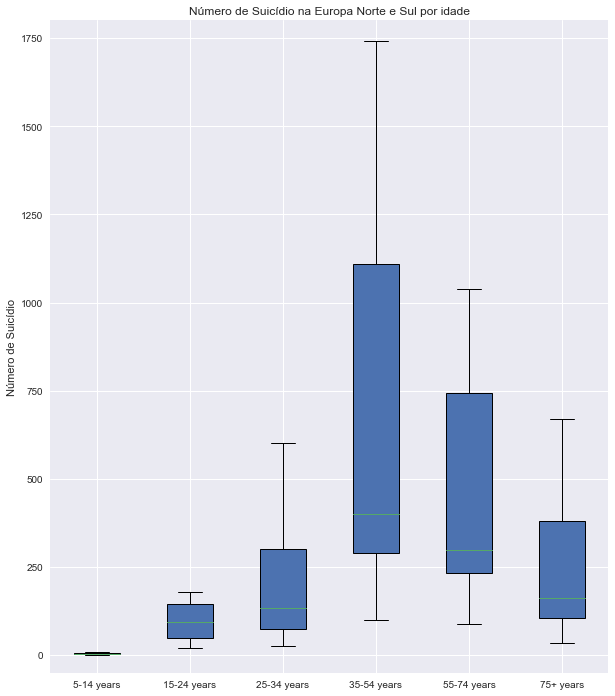

In [26]:
generate_boxplot_age_suicide(group_europe_ns_age, "Número de Suicídio na Europa Norte e Sul por idade", 1800)

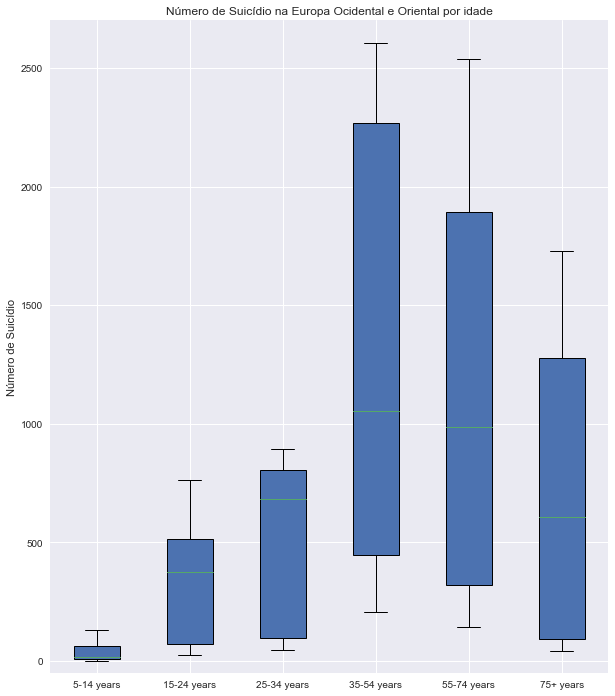

In [27]:
generate_boxplot_age_suicide(group_europe_we_age, "Número de Suicídio na Europa Ocidental e Oriental por idade", 2700)

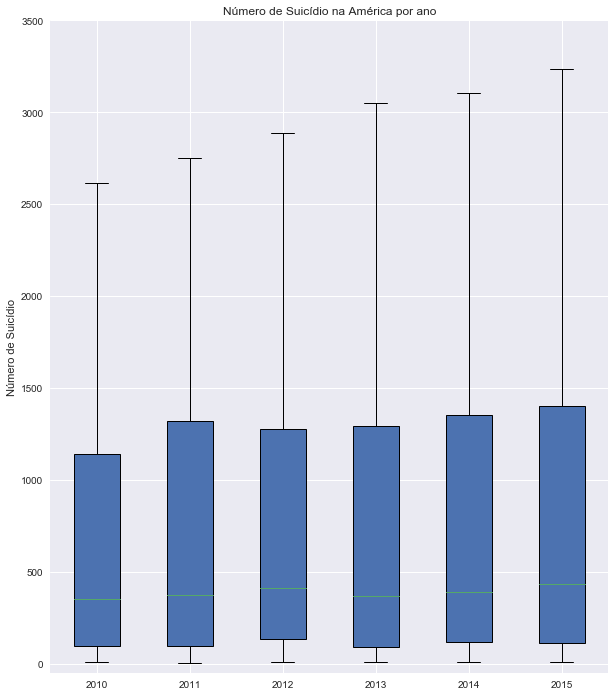

In [28]:
generate_boxplot_year_suicide(group_america_year, "Número de Suicídio na América por ano", 3500)

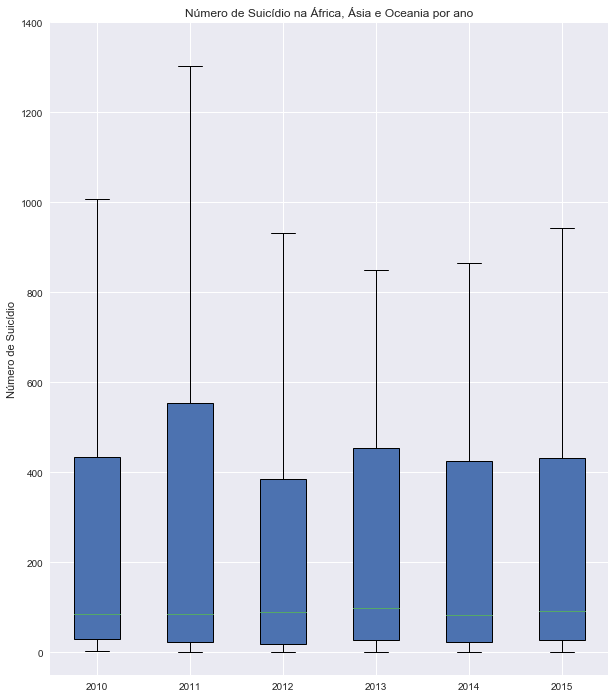

In [29]:
generate_boxplot_year_suicide(group_aao_year, "Número de Suicídio na África, Ásia e Oceania por ano", 1400)

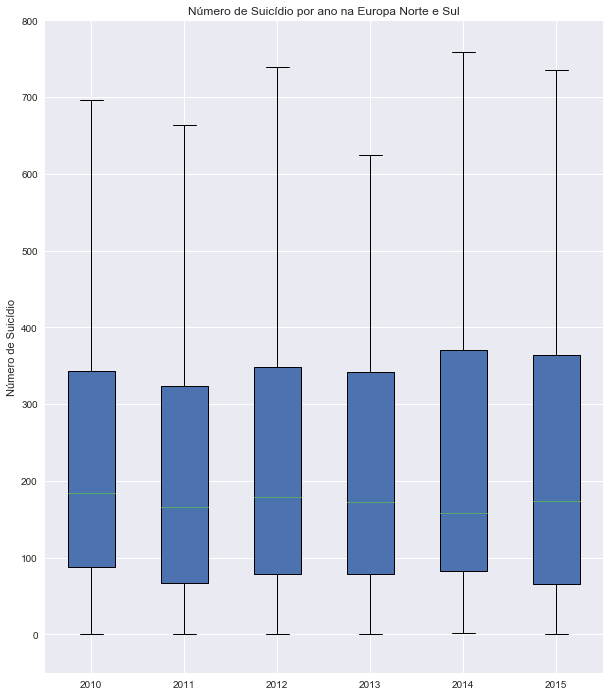

In [30]:
generate_boxplot_year_suicide(group_europe_ns_year, "Número de Suicídio por ano na Europa Norte e Sul",800)

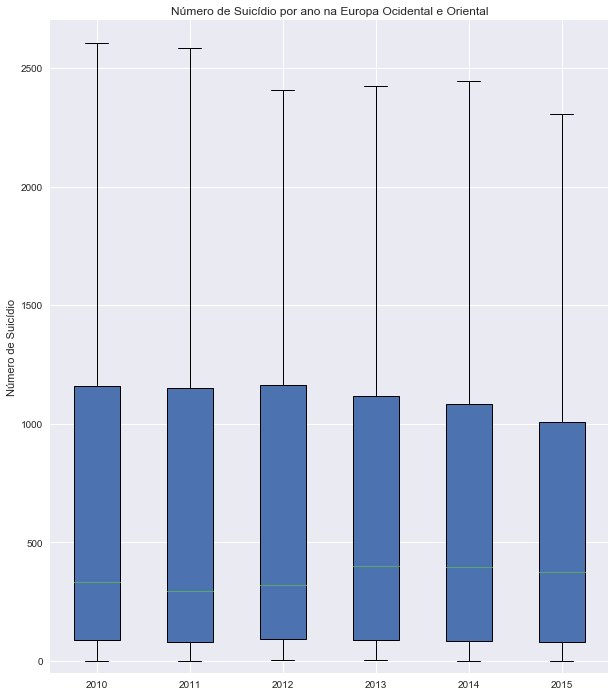

In [31]:
generate_boxplot_year_suicide(group_europe_we_year, "Número de Suicídio por ano na Europa Ocidental e Oriental",2700)

In [32]:
#Criação de frames por sub região.

frames = [brazil, chile]
south_america = pd.concat(frames, keys=['x', 'y'])

frames = [poland, russia]
eastern_europe = pd.concat(frames, keys=['x', 'y'])

frames = [sweden, unitedKingdom]
northern_europe = pd.concat(frames, keys=['x', 'y'])

frames = [italy, spain]
southern_europe = pd.concat(frames, keys=['x', 'y'])

frames = [ germany, netherlands]
western_europe = pd.concat(frames, keys=['x', 'y'])

frames = [israel, japan]
asia = pd.concat(frames, keys=['x', 'y'])

In [33]:
#America
mexico_male = mexico[(mexico["sex"] == "male")]
mexico_female = mexico[(mexico["sex"] == "female")]

unitedStates_male = unitedStates[(unitedStates["sex"] == "male")]
unitedStates_female = unitedStates[(unitedStates["sex"] == "female")]

brazil_male = brazil[(brazil["sex"] == "male")]
brazil_female = brazil[(brazil["sex"] == "female")]

chile_male = chile[(chile["sex"] == "male")]
chile_female = chile[(chile["sex"] == "female")]

#Asia, africa e Oceania
japan_male = japan[(japan["sex"] == "male")]
japan_female = japan[(japan["sex"] == "female")]

israel_male = israel[(israel["sex"] == "male")]
israel_female = israel[(israel["sex"] == "female")]

southAfrica_male = southAfrica[(southAfrica["sex"] == "male")]
southAfrica_female = southAfrica[(southAfrica["sex"] == "female")]

australia_male = australia[(australia["sex"] == "male")]
australia_female = australia[(australia["sex"] == "female")]

#Europa

netherlands_male = netherlands[(netherlands["sex"] == "male")]
netherlands_female = netherlands[(netherlands["sex"] == "female")]

unitedKingdom_male = unitedKingdom[(unitedKingdom["sex"] == "male")]
unitedKingdom_female = unitedKingdom[(unitedKingdom["sex"] == "female")]

spain_male = spain[(spain["sex"] == "male")]
spain_female = spain[(spain["sex"] == "female")]
  
italy_male = italy[(italy["sex"] == "male")]
italy_female = italy[(italy["sex"] == "female")]

germany_male = germany[(germany["sex"] == "male")]
germany_female = germany[(germany["sex"] == "female")]

poland_male = poland[(poland["sex"] == "male")]
poland_female = poland[(poland["sex"] == "female")]

russia_male = russia[(russia["sex"] == "male")]
russia_female = russia[(russia["sex"] == "female")]

sweden_male = sweden[(sweden["sex"] == "male")]
sweden_female = sweden[(sweden["sex"] == "female")]

In [34]:
#Frames de sexo separados por continente.

america_male = america[(america["sex"] == "male")]
america_female = america[(america["sex"] == "female")]

asiaAfricaOceania_male = asiaAfricaOceania[(asiaAfricaOceania["sex"] == "male")]
asiaAfricaOceania_female = asiaAfricaOceania[(asiaAfricaOceania["sex"] == "female")]

europe_ns_male = europe_northern_southern[(europe_northern_southern["sex"] == "male")]
europe_ns_female = europe_northern_southern[(europe_northern_southern["sex"] == "female")]

europe_we_male = europe_western_eastern[(europe_western_eastern["sex"] == "male")]
europe_we_female = europe_western_eastern[(europe_western_eastern["sex"] == "female")]

In [35]:
#Frames de sexo separados por sub região.

south_america_male = south_america[(south_america["sex"] == "male")]
south_america_female = south_america[(south_america["sex"] == "female")]

eastern_europe_male = eastern_europe[(eastern_europe["sex"] == "male")]
eastern_europe_female = eastern_europe[(eastern_europe["sex"] == "female")]

northern_europe_male = northern_europe[(northern_europe["sex"] == "male")]
northern_europe_female = northern_europe[(northern_europe["sex"] == "female")]

southern_europe_male = southern_europe[(southern_europe["sex"] == "male")]
southern_europe_female = southern_europe[(southern_europe["sex"] == "female")]

western_europe_male = western_europe[(western_europe["sex"] == "male")]
western_europe_female = western_europe[(western_europe["sex"] == "female")]

asia_male = asia[(asia["sex"] == "male")]
asia_female = asia[(asia["sex"] == "female")]

In [36]:
#Agrupando por países

#America
gbr = brazil.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gbr["growthPopulation"] = new_bra_sex
gch = chile.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gch["growthPopulation"] = new_chi_sex
gme = mexico.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gme["growthPopulation"] = new_mex_sex
gus = unitedStates.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gus["growthPopulation"] = new_usa_sex

#Asia, africa e Oceania
gjp = japan.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gjp["growthPopulation"] = new_jap_sex
gsa = southAfrica.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gsa["growthPopulation"] = new_sou_sex
gis = israel.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gis["growthPopulation"] = new_isr_sex
gau = australia.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gau["growthPopulation"] = new_aus_sex

#Europa
gru = russia.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gru["growthPopulation"] = new_rus_sex
gsw = sweden.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gsw["growthPopulation"] = new_swe_sex
gpo = poland.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gpo["growthPopulation"] = new_pol_sex
gge = germany.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gge["growthPopulation"] = new_ger_sex
git = italy.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
git["growthPopulation"] = new_ita_sex
gsp = spain.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gsp["growthPopulation"] = new_spa_sex
guk = unitedKingdom.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
guk["growthPopulation"] = new_unk_sex
gne = netherlands.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gne["growthPopulation"] = new_net_sex

In [37]:
#Agrupando por países sem considerar o sexo

#America
tgbr = brazil.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgbr['suicides_no'] = list((tgbr['suicides_no']/tgbr['totalPopulation'])*100000)
tgbr['gdp-year'] = list(tgbr['gdp-year']/tgbr['totalPopulation'])

tgch = chile.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgch['suicides_no'] = list((tgch['suicides_no']/tgch['totalPopulation'])*100000)
tgch['gdp-year'] = list(tgch['gdp-year']/tgch['totalPopulation'])

tgme = mexico.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgme['suicides_no'] = list((tgme['suicides_no']/tgme['totalPopulation'])*100000)
tgme['gdp-year'] = list(tgme['gdp-year']/tgme['totalPopulation'])

tgus = unitedStates.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgus['suicides_no'] = list((tgus['suicides_no']/tgus['totalPopulation'])*100000)
tgus['gdp-year'] = list(tgus['gdp-year']/tgus['totalPopulation'])

#Asia, africa e Oceania
tgjp = japan.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgjp['suicides_no'] = list((tgjp['suicides_no']/tgjp['totalPopulation'])*100000)
tgjp['gdp-year'] = list(tgjp['gdp-year']/tgjp['totalPopulation'])

tgsa = southAfrica.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgsa['suicides_no'] = list((tgsa['suicides_no']/tgsa['totalPopulation'])*100000)
tgsa['gdp-year'] = list(tgsa['gdp-year']/tgsa['totalPopulation'])

tgis = israel.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgis['suicides_no'] = list((tgis['suicides_no']/tgis['totalPopulation'])*100000)
tgis['gdp-year'] = list(tgis['gdp-year']/tgis['totalPopulation'])

tgau = australia.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgau['suicides_no'] = list((tgau['suicides_no']/tgau['totalPopulation'])*100000)
tgau['gdp-year'] = list(tgau['gdp-year']/tgau['totalPopulation'])

#Europa

tgru = russia.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgru['suicides_no'] = list((tgru['suicides_no']/tgru['totalPopulation'])*100000)
tgru['gdp-year'] = list(tgru['gdp-year']/tgru['totalPopulation'])

tgsw = sweden.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgsw['suicides_no'] = list((tgsw['suicides_no']/tgsw['totalPopulation'])*100000)
tgsw['gdp-year'] = list(tgsw['gdp-year']/tgsw['totalPopulation'])

tgpo = poland.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgpo['suicides_no'] = list((tgpo['suicides_no']/tgpo['totalPopulation'])*100000)
tgpo['gdp-year'] = list(tgpo['gdp-year']/tgpo['totalPopulation'])

tgge = germany.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgge['suicides_no'] = list((tgge['suicides_no']/tgge['totalPopulation'])*100000)
tgge['gdp-year'] = list(tgge['gdp-year']/tgge['totalPopulation'])

tgit = italy.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgit['suicides_no'] = list((tgit['suicides_no']/tgit['totalPopulation'])*100000)
tgit['gdp-year'] = list(tgit['gdp-year']/tgit['totalPopulation'])

tgsp = spain.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgsp['suicides_no'] = list((tgsp['suicides_no']/tgsp['totalPopulation'])*100000)
tgsp['gdp-year'] = list(tgsp['gdp-year']/tgsp['totalPopulation'])

tguk = unitedKingdom.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tguk['suicides_no'] = list((tguk['suicides_no']/tguk['totalPopulation'])*100000)
tguk['gdp-year'] = list(tguk['gdp-year']/tguk['totalPopulation'])

tgne = netherlands.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder"], as_index=False).sum()
tgne['suicides_no'] = list((tgne['suicides_no']/tgne['totalPopulation'])*100000)
tgne['gdp-year'] = list(tgne['gdp-year']/tgne['totalPopulation'])

In [38]:
tgbr.corr("spearman") #Brazil

year  totalPopulationFemale  \
year                      1.000000               1.000000   
totalPopulationFemale     1.000000               1.000000   
totalPopulationMale       1.000000               1.000000   
genderInequality         -1.000000              -1.000000   
gdp-year                 -0.428571              -0.428571   
gdp-per-capita           -0.428571              -0.428571   
hdi                       1.000000               1.000000   
totalPopulation           1.000000               1.000000   
totalUsersInternet        1.000000               1.000000   
rateEmployment15andOlder -0.925820              -0.925820   
suicides_no               1.000000               1.000000   
population                1.000000               1.000000   
suicides/100kpop          0.714286               0.714286   

                          totalPopulationMale  genderInequality  gdp-year  \
year                                 1.000000         -1.000000 -0.428571   
totalPopulationFemale                1.000000         -1.000000 -0.428571   
totalPopulationMale                  1.000000         -1.000000 -0.428571   
genderInequality                    -1.000000          1.000000  0.428571   
gdp-year                            -0.428571          0.428571  1.000000   
gdp-per-capita                      -0.428571          0.428571  1.000000   
hdi                                  1.000000         -1.000000 -0.428571   
totalPopulation                      1.000000         -1.000000 -0.428571   
totalUsersInternet                   1.000000         -1.000000 -0.428571   
rateEmployment15andOlder            -0.925820          0.925820  0.462910   
suicides_no                          1.000000         -1.000000 -0.428571   
population                           1.000000         -1.000000 -0.428571   
suicides/100kpop                     0.714286         -0.714286 -0.428571   

                          gdp-per-capita       hdi  totalPopulation  \
year                           -0.428571  1.000000         1.000000   
totalPopulationFemale          -0.428571  1.000000         1.000000   
totalPopulationMale            -0.428571  1.000000         1.000000   
genderInequality                0.428571 -1.000000        -1.000000   
gdp-year                        1.000000 -0.428571        -0.428571   
gdp-per-capita                  1.000000 -0.428571        -0.428571   
hdi                            -0.428571  1.000000         1.000000   
totalPopulation                -0.428571  1.000000         1.000000   
totalUsersInternet             -0.428571  1.000000         1.000000   
rateEmployment15andOlder        0.462910 -0.925820        -0.925820   
suicides_no                    -0.428571  1.000000         1.000000   
population                     -0.428571  1.000000         1.000000   
suicides/100kpop               -0.428571  0.714286         0.714286   

                          totalUsersInternet  rateEmployment15andOlder  \
year                                1.000000                  -0.92582   
totalPopulationFemale               1.000000                  -0.92582   
totalPopulationMale                 1.000000                  -0.92582   
genderInequality                   -1.000000                   0.92582   
gdp-year                           -0.428571                   0.46291   
gdp-per-capita                     -0.428571                   0.46291   
hdi                                 1.000000                  -0.92582   
totalPopulation                     1.000000                  -0.92582   
totalUsersInternet                  1.000000                  -0.92582   
rateEmployment15andOlder           -0.925820                   1.00000   
suicides_no                         1.000000                  -0.92582   
population                          1.000000                  -0.92582   
suicides/100kpop                    0.714286                  -0.92582   

                          suicides_no  population  suicides/100k

In [39]:
tgch.corr("spearman") #Chile

year  totalPopulationFemale  \
year                      1.000000               1.000000   
totalPopulationFemale     1.000000               1.000000   
totalPopulationMale       1.000000               1.000000   
genderInequality         -1.000000              -1.000000   
gdp-year                  0.257143               0.257143   
gdp-per-capita            0.257143               0.257143   
hdi                       1.000000               1.000000   
totalPopulation           1.000000               1.000000   
totalUsersInternet        1.000000               1.000000   
rateEmployment15andOlder  0.985611               0.985611   
suicides_no              -0.714286              -0.714286   
population                1.000000               1.000000   
suicides/100kpop         -0.771429              -0.771429   

                          totalPopulationMale  genderInequality  gdp-year  \
year                                 1.000000         -1.000000  0.257143   
totalPopulationFemale                1.000000         -1.000000  0.257143   
totalPopulationMale                  1.000000         -1.000000  0.257143   
genderInequality                    -1.000000          1.000000 -0.257143   
gdp-year                             0.257143         -0.257143  1.000000   
gdp-per-capita                       0.257143         -0.257143  1.000000   
hdi                                  1.000000         -1.000000  0.257143   
totalPopulation                      1.000000         -1.000000  0.257143   
totalUsersInternet                   1.000000         -1.000000  0.257143   
rateEmployment15andOlder             0.985611         -0.985611  0.318874   
suicides_no                         -0.714286          0.714286 -0.600000   
population                           1.000000         -1.000000  0.257143   
suicides/100kpop                    -0.771429          0.771429 -0.714286   

                          gdp-per-capita       hdi  totalPopulation  \
year                            0.257143  1.000000         1.000000   
totalPopulationFemale           0.257143  1.000000         1.000000   
totalPopulationMale             0.257143  1.000000         1.000000   
genderInequality               -0.257143 -1.000000        -1.000000   
gdp-year                        1.000000  0.257143         0.257143   
gdp-per-capita                  1.000000  0.257143         0.257143   
hdi                             0.257143  1.000000         1.000000   
totalPopulation                 0.257143  1.000000         1.000000   
totalUsersInternet              0.257143  1.000000         1.000000   
rateEmployment15andOlder        0.318874  0.985611         0.985611   
suicides_no                    -0.600000 -0.714286        -0.714286   
population                      0.257143  1.000000         1.000000   
suicides/100kpop               -0.714286 -0.771429        -0.771429   

                          totalUsersInternet  rateEmployment15andOlder  \
year                                1.000000                  0.985611   
totalPopulationFemale               1.000000                  0.985611   
totalPopulationMale                 1.000000                  0.985611   
genderInequality                   -1.000000                 -0.985611   
gdp-year                            0.257143                  0.318874   
gdp-per-capita                      0.257143                  0.318874   
hdi                                 1.000000                  0.985611   
totalPopulation                     1.000000                  0.985611   
totalUsersInternet                  1.000000                  0.985611   
rateEmployment15andOlder            0.985611                  1.000000   
suicides_no                        -0.714286                 -0.753702   
population                          1.000000                  0.985611   
suicides/100kpop                   -0.771429                 -0.811679   

                          suicides_no  population  suicides/100k

In [40]:
tgme.corr("spearman") #México

year  totalPopulationFemale  \
year                      1.000000               1.000000   
totalPopulationFemale     1.000000               1.000000   
totalPopulationMale       1.000000               1.000000   
genderInequality         -1.000000              -1.000000   
gdp-year                  0.428571               0.428571   
gdp-per-capita            0.428571               0.428571   
hdi                       0.942857               0.942857   
totalPopulation           1.000000               1.000000   
totalUsersInternet        1.000000               1.000000   
rateEmployment15andOlder  0.485714               0.485714   
suicides_no               0.771429               0.771429   
population                1.000000               1.000000   
suicides/100kpop          0.771429               0.771429   

                          totalPopulationMale  genderInequality  gdp-year  \
year                                 1.000000         -1.000000  0.428571   
totalPopulationFemale                1.000000         -1.000000  0.428571   
totalPopulationMale                  1.000000         -1.000000  0.428571   
genderInequality                    -1.000000          1.000000 -0.428571   
gdp-year                             0.428571         -0.428571  1.000000   
gdp-per-capita                       0.428571         -0.428571  1.000000   
hdi                                  0.942857         -0.942857  0.371429   
totalPopulation                      1.000000         -1.000000  0.428571   
totalUsersInternet                   1.000000         -1.000000  0.428571   
rateEmployment15andOlder             0.485714         -0.485714  0.485714   
suicides_no                          0.771429         -0.771429  0.485714   
population                           1.000000         -1.000000  0.428571   
suicides/100kpop                     0.771429         -0.771429  0.485714   

                          gdp-per-capita       hdi  totalPopulation  \
year                            0.428571  0.942857         1.000000   
totalPopulationFemale           0.428571  0.942857         1.000000   
totalPopulationMale             0.428571  0.942857         1.000000   
genderInequality               -0.428571 -0.942857        -1.000000   
gdp-year                        1.000000  0.371429         0.428571   
gdp-per-capita                  1.000000  0.371429         0.428571   
hdi                             0.371429  1.000000         0.942857   
totalPopulation                 0.428571  0.942857         1.000000   
totalUsersInternet              0.428571  0.942857         1.000000   
rateEmployment15andOlder        0.485714  0.542857         0.485714   
suicides_no                     0.485714  0.714286         0.771429   
population                      0.428571  0.942857         1.000000   
suicides/100kpop                0.485714  0.714286         0.771429   

                          totalUsersInternet  rateEmployment15andOlder  \
year                                1.000000                  0.485714   
totalPopulationFemale               1.000000                  0.485714   
totalPopulationMale                 1.000000                  0.485714   
genderInequality                   -1.000000                 -0.485714   
gdp-year                            0.428571                  0.485714   
gdp-per-capita                      0.428571                  0.485714   
hdi                                 0.942857                  0.542857   
totalPopulation                     1.000000                  0.485714   
totalUsersInternet                  1.000000                  0.485714   
rateEmployment15andOlder            0.485714                  1.000000   
suicides_no                         0.771429                  0.028571   
population                          1.000000                  0.485714   
suicides/100kpop                    0.771429                  0.028571   

                          suicides_no  population  suicides/100k

In [41]:
tgus.corr("spearman") #Estados Unidos

year  totalPopulationFemale  \
year                      1.000000               1.000000   
totalPopulationFemale     1.000000               1.000000   
totalPopulationMale       1.000000               1.000000   
genderInequality         -1.000000              -1.000000   
gdp-year                  1.000000               1.000000   
gdp-per-capita            1.000000               1.000000   
hdi                       0.782691               0.782691   
totalPopulation           1.000000               1.000000   
totalUsersInternet        0.428571               0.428571   
rateEmployment15andOlder  0.942857               0.942857   
suicides_no               1.000000               1.000000   
population                1.000000               1.000000   
suicides/100kpop          1.000000               1.000000   

                          totalPopulationMale  genderInequality  gdp-year  \
year                                 1.000000         -1.000000  1.000000   
totalPopulationFemale                1.000000         -1.000000  1.000000   
totalPopulationMale                  1.000000         -1.000000  1.000000   
genderInequality                    -1.000000          1.000000 -1.000000   
gdp-year                             1.000000         -1.000000  1.000000   
gdp-per-capita                       1.000000         -1.000000  1.000000   
hdi                                  0.782691         -0.782691  0.782691   
totalPopulation                      1.000000         -1.000000  1.000000   
totalUsersInternet                   0.428571         -0.428571  0.428571   
rateEmployment15andOlder             0.942857         -0.942857  0.942857   
suicides_no                          1.000000         -1.000000  1.000000   
population                           1.000000         -1.000000  1.000000   
suicides/100kpop                     1.000000         -1.000000  1.000000   

                          gdp-per-capita       hdi  totalPopulation  \
year                            1.000000  0.782691         1.000000   
totalPopulationFemale           1.000000  0.782691         1.000000   
totalPopulationMale             1.000000  0.782691         1.000000   
genderInequality               -1.000000 -0.782691        -1.000000   
gdp-year                        1.000000  0.782691         1.000000   
gdp-per-capita                  1.000000  0.782691         1.000000   
hdi                             0.782691  1.000000         0.782691   
totalPopulation                 1.000000  0.782691         1.000000   
totalUsersInternet              0.428571  0.666737         0.428571   
rateEmployment15andOlder        0.942857  0.666737         0.942857   
suicides_no                     1.000000  0.782691         1.000000   
population                      1.000000  0.782691         1.000000   
suicides/100kpop                1.000000  0.782691         1.000000   

                          totalUsersInternet  rateEmployment15andOlder  \
year                                0.428571                  0.942857   
totalPopulationFemale               0.428571                  0.942857   
totalPopulationMale                 0.428571                  0.942857   
genderInequality                   -0.428571                 -0.942857   
gdp-year                            0.428571                  0.942857   
gdp-per-capita                      0.428571                  0.942857   
hdi                                 0.666737                  0.666737   
totalPopulation                     0.428571                  0.942857   
totalUsersInternet                  1.000000                  0.542857   
rateEmployment15andOlder            0.542857                  1.000000   
suicides_no                         0.428571                  0.942857   
population                          0.428571                  0.942857   
suicides/100kpop                    0.428571                  0.942857   

                          suicides_no  population  suicides/100k

In [42]:
tgjp.corr("spearman") #Japão

year  totalPopulationFemale  \
year                      1.000000              -1.000000   
totalPopulationFemale    -1.000000               1.000000   
totalPopulationMale      -1.000000               1.000000   
genderInequality          0.289886              -0.289886   
gdp-year                 -0.771429               0.771429   
gdp-per-capita           -0.771429               0.771429   
hdi                       1.000000              -1.000000   
totalPopulation          -1.000000               1.000000   
totalUsersInternet        1.000000              -1.000000   
rateEmployment15andOlder  0.771429              -0.771429   
suicides_no              -1.000000               1.000000   
population               -0.942857               0.942857   
suicides/100kpop         -1.000000               1.000000   

                          totalPopulationMale  genderInequality  gdp-year  \
year                                -1.000000          0.289886 -0.771429   
totalPopulationFemale                1.000000         -0.289886  0.771429   
totalPopulationMale                  1.000000         -0.289886  0.771429   
genderInequality                    -0.289886          1.000000  0.000000   
gdp-year                             0.771429          0.000000  1.000000   
gdp-per-capita                       0.771429          0.000000  1.000000   
hdi                                 -1.000000          0.289886 -0.771429   
totalPopulation                      1.000000         -0.289886  0.771429   
totalUsersInternet                  -1.000000          0.289886 -0.771429   
rateEmployment15andOlder            -0.771429          0.000000 -1.000000   
suicides_no                          1.000000         -0.289886  0.771429   
population                           0.942857         -0.376851  0.714286   
suicides/100kpop                     1.000000         -0.289886  0.771429   

                          gdp-per-capita       hdi  totalPopulation  \
year                           -0.771429  1.000000        -1.000000   
totalPopulationFemale           0.771429 -1.000000         1.000000   
totalPopulationMale             0.771429 -1.000000         1.000000   
genderInequality                0.000000  0.289886        -0.289886   
gdp-year                        1.000000 -0.771429         0.771429   
gdp-per-capita                  1.000000 -0.771429         0.771429   
hdi                            -0.771429  1.000000        -1.000000   
totalPopulation                 0.771429 -1.000000         1.000000   
totalUsersInternet             -0.771429  1.000000        -1.000000   
rateEmployment15andOlder       -1.000000  0.771429        -0.771429   
suicides_no                     0.771429 -1.000000         1.000000   
population                      0.714286 -0.942857         0.942857   
suicides/100kpop                0.771429 -1.000000         1.000000   

                          totalUsersInternet  rateEmployment15andOlder  \
year                                1.000000                  0.771429   
totalPopulationFemale              -1.000000                 -0.771429   
totalPopulationMale                -1.000000                 -0.771429   
genderInequality                    0.289886                  0.000000   
gdp-year                           -0.771429                 -1.000000   
gdp-per-capita                     -0.771429                 -1.000000   
hdi                                 1.000000                  0.771429   
totalPopulation                    -1.000000                 -0.771429   
totalUsersInternet                  1.000000                  0.771429   
rateEmployment15andOlder            0.771429                  1.000000   
suicides_no                        -1.000000                 -0.771429   
population                         -0.942857                 -0.714286   
suicides/100kpop                   -1.000000                 -0.771429   

                          suicides_no  population  suicides/100k

In [43]:
tgsa.corr("spearman") #África do Sul

year  totalPopulationFemale  \
year                      1.000000               1.000000   
totalPopulationFemale     1.000000               1.000000   
totalPopulationMale       1.000000               1.000000   
genderInequality         -1.000000              -1.000000   
gdp-year                 -0.828571              -0.828571   
gdp-per-capita           -0.828571              -0.828571   
hdi                       1.000000               1.000000   
totalPopulation           1.000000               1.000000   
totalUsersInternet        1.000000               1.000000   
rateEmployment15andOlder  0.927634               0.927634   
suicides_no               0.542857               0.542857   
population                1.000000               1.000000   
suicides/100kpop          0.314286               0.314286   

                          totalPopulationMale  genderInequality  gdp-year  \
year                                 1.000000         -1.000000 -0.828571   
totalPopulationFemale                1.000000         -1.000000 -0.828571   
totalPopulationMale                  1.000000         -1.000000 -0.828571   
genderInequality                    -1.000000          1.000000  0.828571   
gdp-year                            -0.828571          0.828571  1.000000   
gdp-per-capita                      -0.828571          0.828571  1.000000   
hdi                                  1.000000         -1.000000 -0.828571   
totalPopulation                      1.000000         -1.000000 -0.828571   
totalUsersInternet                   1.000000         -1.000000 -0.828571   
rateEmployment15andOlder             0.927634         -0.927634 -0.840668   
suicides_no                          0.542857         -0.542857 -0.485714   
population                           1.000000         -1.000000 -0.828571   
suicides/100kpop                     0.314286         -0.314286 -0.371429   

                          gdp-per-capita       hdi  totalPopulation  \
year                           -0.828571  1.000000         1.000000   
totalPopulationFemale          -0.828571  1.000000         1.000000   
totalPopulationMale            -0.828571  1.000000         1.000000   
genderInequality                0.828571 -1.000000        -1.000000   
gdp-year                        1.000000 -0.828571        -0.828571   
gdp-per-capita                  1.000000 -0.828571        -0.828571   
hdi                            -0.828571  1.000000         1.000000   
totalPopulation                -0.828571  1.000000         1.000000   
totalUsersInternet             -0.828571  1.000000         1.000000   
rateEmployment15andOlder       -0.840668  0.927634         0.927634   
suicides_no                    -0.485714  0.542857         0.542857   
population                     -0.828571  1.000000         1.000000   
suicides/100kpop               -0.371429  0.314286         0.314286   

                          totalUsersInternet  rateEmployment15andOlder  \
year                                1.000000                  0.927634   
totalPopulationFemale               1.000000                  0.927634   
totalPopulationMale                 1.000000                  0.927634   
genderInequality                   -1.000000                 -0.927634   
gdp-year                           -0.828571                 -0.840668   
gdp-per-capita                     -0.828571                 -0.840668   
hdi                                 1.000000                  0.927634   
totalPopulation                     1.000000                  0.927634   
totalUsersInternet                  1.000000                  0.927634   
rateEmployment15andOlder            0.927634                  1.000000   
suicides_no                         0.542857                  0.637748   
population                          1.000000                  0.927634   
suicides/100kpop                    0.314286                  0.318874   

                          suicides_no  population  suicides/100k

In [44]:
tgis.corr("spearman") #Israel

year  totalPopulationFemale  \
year                      1.000000               1.000000   
totalPopulationFemale     1.000000               1.000000   
totalPopulationMale       1.000000               1.000000   
genderInequality         -1.000000              -1.000000   
gdp-year                  0.771429               0.771429   
gdp-per-capita            0.771429               0.771429   
hdi                       1.000000               1.000000   
totalPopulation           1.000000               1.000000   
totalUsersInternet        0.942857               0.942857   
rateEmployment15andOlder  1.000000               1.000000   
suicides_no              -0.885714              -0.885714   
population                1.000000               1.000000   
suicides/100kpop         -1.000000              -1.000000   

                          totalPopulationMale  genderInequality  gdp-year  \
year                                 1.000000         -1.000000  0.771429   
totalPopulationFemale                1.000000         -1.000000  0.771429   
totalPopulationMale                  1.000000         -1.000000  0.771429   
genderInequality                    -1.000000          1.000000 -0.771429   
gdp-year                             0.771429         -0.771429  1.000000   
gdp-per-capita                       0.771429         -0.771429  1.000000   
hdi                                  1.000000         -1.000000  0.771429   
totalPopulation                      1.000000         -1.000000  0.771429   
totalUsersInternet                   0.942857         -0.942857  0.600000   
rateEmployment15andOlder             1.000000         -1.000000  0.771429   
suicides_no                         -0.885714          0.885714 -0.771429   
population                           1.000000         -1.000000  0.771429   
suicides/100kpop                    -1.000000          1.000000 -0.771429   

                          gdp-per-capita       hdi  totalPopulation  \
year                            0.771429  1.000000         1.000000   
totalPopulationFemale           0.771429  1.000000         1.000000   
totalPopulationMale             0.771429  1.000000         1.000000   
genderInequality               -0.771429 -1.000000        -1.000000   
gdp-year                        1.000000  0.771429         0.771429   
gdp-per-capita                  1.000000  0.771429         0.771429   
hdi                             0.771429  1.000000         1.000000   
totalPopulation                 0.771429  1.000000         1.000000   
totalUsersInternet              0.600000  0.942857         0.942857   
rateEmployment15andOlder        0.771429  1.000000         1.000000   
suicides_no                    -0.771429 -0.885714        -0.885714   
population                      0.771429  1.000000         1.000000   
suicides/100kpop               -0.771429 -1.000000        -1.000000   

                          totalUsersInternet  rateEmployment15andOlder  \
year                                0.942857                  1.000000   
totalPopulationFemale               0.942857                  1.000000   
totalPopulationMale                 0.942857                  1.000000   
genderInequality                   -0.942857                 -1.000000   
gdp-year                            0.600000                  0.771429   
gdp-per-capita                      0.600000                  0.771429   
hdi                                 0.942857                  1.000000   
totalPopulation                     0.942857                  1.000000   
totalUsersInternet                  1.000000                  0.942857   
rateEmployment15andOlder            0.942857                  1.000000   
suicides_no                        -0.714286                 -0.885714   
population                          0.942857                  1.000000   
suicides/100kpop                   -0.942857                 -1.000000   

                          suicides_no  population  suicides/100k

In [45]:
tgau.corr("spearman") #Austrália

year  totalPopulationFemale  \
year                      1.000000               1.000000   
totalPopulationFemale     1.000000               1.000000   
totalPopulationMale       1.000000               1.000000   
genderInequality         -1.000000              -1.000000   
gdp-year                  0.085714               0.085714   
gdp-per-capita            0.257143               0.257143   
hdi                       1.000000               1.000000   
totalPopulation           1.000000               1.000000   
totalUsersInternet        0.942857               0.942857   
rateEmployment15andOlder -0.885714              -0.885714   
suicides_no               0.885714               0.885714   
population                1.000000               1.000000   
suicides/100kpop          0.942857               0.942857   

                          totalPopulationMale  genderInequality  gdp-year  \
year                                 1.000000         -1.000000  0.085714   
totalPopulationFemale                1.000000         -1.000000  0.085714   
totalPopulationMale                  1.000000         -1.000000  0.085714   
genderInequality                    -1.000000          1.000000 -0.085714   
gdp-year                             0.085714         -0.085714  1.000000   
gdp-per-capita                       0.257143         -0.257143  0.942857   
hdi                                  1.000000         -1.000000  0.085714   
totalPopulation                      1.000000         -1.000000  0.085714   
totalUsersInternet                   0.942857         -0.942857  0.028571   
rateEmployment15andOlder            -0.885714          0.885714  0.028571   
suicides_no                          0.885714         -0.885714 -0.142857   
population                           1.000000         -1.000000  0.085714   
suicides/100kpop                     0.942857         -0.942857  0.028571   

                          gdp-per-capita       hdi  totalPopulation  \
year                            0.257143  1.000000         1.000000   
totalPopulationFemale           0.257143  1.000000         1.000000   
totalPopulationMale             0.257143  1.000000         1.000000   
genderInequality               -0.257143 -1.000000        -1.000000   
gdp-year                        0.942857  0.085714         0.085714   
gdp-per-capita                  1.000000  0.257143         0.257143   
hdi                             0.257143  1.000000         1.000000   
totalPopulation                 0.257143  1.000000         1.000000   
totalUsersInternet              0.142857  0.942857         0.942857   
rateEmployment15andOlder       -0.257143 -0.885714        -0.885714   
suicides_no                     0.085714  0.885714         0.885714   
population                      0.257143  1.000000         1.000000   
suicides/100kpop                0.200000  0.942857         0.942857   

                          totalUsersInternet  rateEmployment15andOlder  \
year                                0.942857                 -0.885714   
totalPopulationFemale               0.942857                 -0.885714   
totalPopulationMale                 0.942857                 -0.885714   
genderInequality                   -0.942857                  0.885714   
gdp-year                            0.028571                  0.028571   
gdp-per-capita                      0.142857                 -0.257143   
hdi                                 0.942857                 -0.885714   
totalPopulation                     0.942857                 -0.885714   
totalUsersInternet                  1.000000                 -0.771429   
rateEmployment15andOlder           -0.771429                  1.000000   
suicides_no                         0.714286                 -0.885714   
population                          0.942857                 -0.885714   
suicides/100kpop                    0.828571                 -0.828571   

                          suicides_no  population  suicides/100k

In [46]:
tgru.corr("spearman") #Rússia

year  totalPopulationFemale  \
year                      1.000000               1.000000   
totalPopulationFemale     1.000000               1.000000   
totalPopulationMale       1.000000               1.000000   
genderInequality         -1.000000              -1.000000   
gdp-year                 -0.200000              -0.200000   
gdp-per-capita           -0.028571              -0.028571   
hdi                       1.000000               1.000000   
totalPopulation           1.000000               1.000000   
totalUsersInternet        1.000000               1.000000   
rateEmployment15andOlder  0.927634               0.927634   
suicides_no              -1.000000              -1.000000   
population                0.057977               0.057977   
suicides/100kpop         -1.000000              -1.000000   

                          totalPopulationMale  genderInequality  gdp-year  \
year                                 1.000000         -1.000000 -0.200000   
totalPopulationFemale                1.000000         -1.000000 -0.200000   
totalPopulationMale                  1.000000         -1.000000 -0.200000   
genderInequality                    -1.000000          1.000000  0.200000   
gdp-year                            -0.200000          0.200000  1.000000   
gdp-per-capita                      -0.028571          0.028571  0.942857   
hdi                                  1.000000         -1.000000 -0.200000   
totalPopulation                      1.000000         -1.000000 -0.200000   
totalUsersInternet                   1.000000         -1.000000 -0.200000   
rateEmployment15andOlder             0.927634         -0.927634 -0.115954   
suicides_no                         -1.000000          1.000000  0.200000   
population                           0.057977         -0.057977 -0.811679   
suicides/100kpop                    -1.000000          1.000000  0.200000   

                          gdp-per-capita       hdi  totalPopulation  \
year                           -0.028571  1.000000         1.000000   
totalPopulationFemale          -0.028571  1.000000         1.000000   
totalPopulationMale            -0.028571  1.000000         1.000000   
genderInequality                0.028571 -1.000000        -1.000000   
gdp-year                        0.942857 -0.200000        -0.200000   
gdp-per-capita                  1.000000 -0.028571        -0.028571   
hdi                            -0.028571  1.000000         1.000000   
totalPopulation                -0.028571  1.000000         1.000000   
totalUsersInternet             -0.028571  1.000000         1.000000   
rateEmployment15andOlder        0.115954  0.927634         0.927634   
suicides_no                     0.028571 -1.000000        -1.000000   
population                     -0.898645  0.057977         0.057977   
suicides/100kpop                0.028571 -1.000000        -1.000000   

                          totalUsersInternet  rateEmployment15andOlder  \
year                                1.000000                  0.927634   
totalPopulationFemale               1.000000                  0.927634   
totalPopulationMale                 1.000000                  0.927634   
genderInequality                   -1.000000                 -0.927634   
gdp-year                           -0.200000                 -0.115954   
gdp-per-capita                     -0.028571                  0.115954   
hdi                                 1.000000                  0.927634   
totalPopulation                     1.000000                  0.927634   
totalUsersInternet                  1.000000                  0.927634   
rateEmployment15andOlder            0.927634                  1.000000   
suicides_no                        -1.000000                 -0.927634   
population                          0.057977                 -0.191176   
suicides/100kpop                   -1.000000                 -0.927634   

                          suicides_no  population  suicides/100k

In [47]:
tgsw.corr("spearman") #Suécia

year  totalPopulationFemale  \
year                      1.000000               1.000000   
totalPopulationFemale     1.000000               1.000000   
totalPopulationMale       1.000000               1.000000   
genderInequality         -0.985611              -0.985611   
gdp-year                 -0.142857              -0.142857   
gdp-per-capita           -0.142857              -0.142857   
hdi                       1.000000               1.000000   
totalPopulation           1.000000               1.000000   
totalUsersInternet        0.085714               0.085714   
rateEmployment15andOlder  0.985611               0.985611   
suicides_no              -0.142857              -0.142857   
population                0.985611               0.985611   
suicides/100kpop          0.771429               0.771429   

                          totalPopulationMale  genderInequality  gdp-year  \
year                                 1.000000         -0.985611 -0.142857   
totalPopulationFemale                1.000000         -0.985611 -0.142857   
totalPopulationMale                  1.000000         -0.985611 -0.142857   
genderInequality                    -0.985611          1.000000  0.086966   
gdp-year                            -0.142857          0.086966  1.000000   
gdp-per-capita                      -0.142857          0.086966  1.000000   
hdi                                  1.000000         -0.985611 -0.142857   
totalPopulation                      1.000000         -0.985611 -0.142857   
totalUsersInternet                   0.085714         -0.173931  0.771429   
rateEmployment15andOlder             0.985611         -0.970588 -0.086966   
suicides_no                         -0.142857          0.028989  0.028571   
population                           0.985611         -0.955882 -0.057977   
suicides/100kpop                     0.771429         -0.840668  0.085714   

                          gdp-per-capita       hdi  totalPopulation  \
year                           -0.142857  1.000000         1.000000   
totalPopulationFemale          -0.142857  1.000000         1.000000   
totalPopulationMale            -0.142857  1.000000         1.000000   
genderInequality                0.086966 -0.985611        -0.985611   
gdp-year                        1.000000 -0.142857        -0.142857   
gdp-per-capita                  1.000000 -0.142857        -0.142857   
hdi                            -0.142857  1.000000         1.000000   
totalPopulation                -0.142857  1.000000         1.000000   
totalUsersInternet              0.771429  0.085714         0.085714   
rateEmployment15andOlder       -0.086966  0.985611         0.985611   
suicides_no                     0.028571 -0.142857        -0.142857   
population                     -0.057977  0.985611         0.985611   
suicides/100kpop                0.085714  0.771429         0.771429   

                          totalUsersInternet  rateEmployment15andOlder  \
year                                0.085714                  0.985611   
totalPopulationFemale               0.085714                  0.985611   
totalPopulationMale                 0.085714                  0.985611   
genderInequality                   -0.173931                 -0.970588   
gdp-year                            0.771429                 -0.086966   
gdp-per-capita                      0.771429                 -0.086966   
hdi                                 0.085714                  0.985611   
totalPopulation                     0.085714                  0.985611   
totalUsersInternet                  1.000000                  0.057977   
rateEmployment15andOlder            0.057977                  1.000000   
suicides_no                         0.200000                 -0.231908   
population                          0.115954                  0.970588   
suicides/100kpop                    0.314286                  0.724714   

                          suicides_no  population  suicides/100k

In [48]:
tgpo.corr("spearman") #Polônia

year  totalPopulationFemale  \
year                      1.000000              -0.600000   
totalPopulationFemale    -0.600000               1.000000   
totalPopulationMale      -0.828571               0.885714   
genderInequality         -1.000000               0.600000   
gdp-year                 -0.028571               0.257143   
gdp-per-capita           -0.028571               0.257143   
hdi                       0.885714              -0.542857   
totalPopulation          -0.828571               0.885714   
totalUsersInternet        0.898645              -0.811679   
rateEmployment15andOlder  0.811679              -0.463817   
suicides_no              -0.714286               0.771429   
population                0.657143              -0.942857   
suicides/100kpop         -0.714286               0.771429   

                          totalPopulationMale  genderInequality  gdp-year  \
year                                -0.828571         -1.000000 -0.028571   
totalPopulationFemale                0.885714          0.600000  0.257143   
totalPopulationMale                  1.000000          0.828571  0.257143   
genderInequality                     0.828571          1.000000  0.028571   
gdp-year                             0.257143          0.028571  1.000000   
gdp-per-capita                       0.257143          0.028571  1.000000   
hdi                                 -0.714286         -0.885714 -0.028571   
totalPopulation                      1.000000          0.828571  0.257143   
totalUsersInternet                  -0.985611         -0.898645 -0.231908   
rateEmployment15andOlder            -0.521794         -0.811679  0.028989   
suicides_no                          0.657143          0.714286 -0.085714   
population                          -0.942857         -0.657143 -0.371429   
suicides/100kpop                     0.657143          0.714286 -0.085714   

                          gdp-per-capita       hdi  totalPopulation  \
year                           -0.028571  0.885714        -0.828571   
totalPopulationFemale           0.257143 -0.542857         0.885714   
totalPopulationMale             0.257143 -0.714286         1.000000   
genderInequality                0.028571 -0.885714         0.828571   
gdp-year                        1.000000 -0.028571         0.257143   
gdp-per-capita                  1.000000 -0.028571         0.257143   
hdi                            -0.028571  1.000000        -0.714286   
totalPopulation                 0.257143 -0.714286         1.000000   
totalUsersInternet             -0.231908  0.753702        -0.985611   
rateEmployment15andOlder        0.028989  0.637748        -0.521794   
suicides_no                    -0.085714 -0.771429         0.657143   
population                     -0.371429  0.485714        -0.942857   
suicides/100kpop               -0.085714 -0.771429         0.657143   

                          totalUsersInternet  rateEmployment15andOlder  \
year                                0.898645                  0.811679   
totalPopulationFemale              -0.811679                 -0.463817   
totalPopulationMale                -0.985611                 -0.521794   
genderInequality                   -0.898645                 -0.811679   
gdp-year                           -0.231908                  0.028989   
gdp-per-capita                     -0.231908                  0.028989   
hdi                                 0.753702                  0.637748   
totalPopulation                    -0.985611                 -0.521794   
totalUsersInternet                  1.000000                  0.602941   
rateEmployment15andOlder            0.602941                  1.000000   
suicides_no                        -0.637748                 -0.753702   
population                          0.898645                  0.463817   
suicides/100kpop                   -0.637748                 -0.753702   

                          suicides_no  population  suicides/100k

In [49]:
tgge.corr("spearman") #Alemanha

year  totalPopulationFemale  \
year                      1.000000               0.142857   
totalPopulationFemale     0.142857               1.000000   
totalPopulationMale       0.428571               0.942857   
genderInequality         -1.000000              -0.142857   
gdp-year                 -0.028571              -0.542857   
gdp-per-capita            0.085714              -0.428571   
hdi                       0.985611               0.115954   
totalPopulation           0.142857               1.000000   
totalUsersInternet        0.942857               0.428571   
rateEmployment15andOlder  1.000000               0.142857   
suicides_no               0.257143              -0.600000   
population               -0.542857              -0.371429   
suicides/100kpop          0.085714              -0.085714   

                          totalPopulationMale  genderInequality  gdp-year  \
year                                 0.428571         -1.000000 -0.028571   
totalPopulationFemale                0.942857         -0.142857 -0.542857   
totalPopulationMale                  1.000000         -0.428571 -0.600000   
genderInequality                    -0.428571          1.000000  0.028571   
gdp-year                            -0.600000          0.028571  1.000000   
gdp-per-capita                      -0.485714         -0.085714  0.942857   
hdi                                  0.405840         -0.985611 -0.057977   
totalPopulation                      0.942857         -0.142857 -0.542857   
totalUsersInternet                   0.657143         -0.942857 -0.200000   
rateEmployment15andOlder             0.428571         -1.000000 -0.028571   
suicides_no                         -0.485714         -0.257143  0.771429   
population                          -0.428571          0.542857 -0.200000   
suicides/100kpop                    -0.142857         -0.085714  0.657143   

                          gdp-per-capita       hdi  totalPopulation  \
year                            0.085714  0.985611         0.142857   
totalPopulationFemale          -0.428571  0.115954         1.000000   
totalPopulationMale            -0.485714  0.405840         0.942857   
genderInequality               -0.085714 -0.985611        -0.142857   
gdp-year                        0.942857 -0.057977        -0.542857   
gdp-per-capita                  1.000000  0.028989        -0.428571   
hdi                             0.028989  1.000000         0.115954   
totalPopulation                -0.428571  0.115954         1.000000   
totalUsersInternet             -0.028571  0.927634         0.428571   
rateEmployment15andOlder        0.085714  0.985611         0.142857   
suicides_no                     0.657143  0.202920        -0.600000   
population                     -0.428571 -0.405840        -0.371429   
suicides/100kpop                0.771429 -0.057977        -0.085714   

                          totalUsersInternet  rateEmployment15andOlder  \
year                                0.942857                  1.000000   
totalPopulationFemale               0.428571                  0.142857   
totalPopulationMale                 0.657143                  0.428571   
genderInequality                   -0.942857                 -1.000000   
gdp-year                           -0.200000                 -0.028571   
gdp-per-capita                     -0.028571                  0.085714   
hdi                                 0.927634                  0.985611   
totalPopulation                     0.428571                  0.142857   
totalUsersInternet                  1.000000                  0.942857   
rateEmployment15andOlder            0.942857                  1.000000   
suicides_no                        -0.028571                  0.257143   
population                         -0.600000                 -0.542857   
suicides/100kpop                    0.028571                  0.085714   

                          suicides_no  population  suicides/100k

In [50]:
tgit.corr("spearman") #Itália

year  totalPopulationFemale  \
year                      1.000000               0.942857   
totalPopulationFemale     0.942857               1.000000   
totalPopulationMale       0.942857               1.000000   
genderInequality         -0.942857              -1.000000   
gdp-year                 -0.714286              -0.542857   
gdp-per-capita           -0.371429              -0.200000   
hdi                       0.617914               0.441367   
totalPopulation           0.942857               1.000000   
totalUsersInternet        0.714286               0.600000   
rateEmployment15andOlder -0.828571              -0.942857   
suicides_no              -0.257143              -0.142857   
population                0.657143               0.600000   
suicides/100kpop         -0.428571              -0.314286   

                          totalPopulationMale  genderInequality  gdp-year  \
year                                 0.942857         -0.942857 -0.714286   
totalPopulationFemale                1.000000         -1.000000 -0.542857   
totalPopulationMale                  1.000000         -1.000000 -0.542857   
genderInequality                    -1.000000          1.000000  0.542857   
gdp-year                            -0.542857          0.542857  1.000000   
gdp-per-capita                      -0.200000          0.200000  0.771429   
hdi                                  0.441367         -0.441367 -0.441367   
totalPopulation                      1.000000         -1.000000 -0.542857   
totalUsersInternet                   0.600000         -0.600000 -0.771429   
rateEmployment15andOlder            -0.942857          0.942857  0.428571   
suicides_no                         -0.142857          0.142857  0.028571   
population                           0.600000         -0.600000 -0.485714   
suicides/100kpop                    -0.314286          0.314286  0.428571   

                          gdp-per-capita       hdi  totalPopulation  \
year                           -0.371429  0.617914         0.942857   
totalPopulationFemale          -0.200000  0.441367         1.000000   
totalPopulationMale            -0.200000  0.441367         1.000000   
genderInequality                0.200000 -0.441367        -1.000000   
gdp-year                        0.771429 -0.441367        -0.542857   
gdp-per-capita                  1.000000  0.088273        -0.200000   
hdi                             0.088273  1.000000         0.441367   
totalPopulation                -0.200000  0.441367         1.000000   
totalUsersInternet             -0.200000  0.794461         0.600000   
rateEmployment15andOlder       -0.028571 -0.441367        -0.942857   
suicides_no                     0.371429  0.000000        -0.142857   
population                     -0.600000  0.088273         0.600000   
suicides/100kpop                0.657143  0.000000        -0.314286   

                          totalUsersInternet  rateEmployment15andOlder  \
year                                0.714286                 -0.828571   
totalPopulationFemale               0.600000                 -0.942857   
totalPopulationMale                 0.600000                 -0.942857   
genderInequality                   -0.600000                  0.942857   
gdp-year                           -0.771429                  0.428571   
gdp-per-capita                     -0.200000                 -0.028571   
hdi                                 0.794461                 -0.441367   
totalPopulation                     0.600000                 -0.942857   
totalUsersInternet                  1.000000                 -0.657143   
rateEmployment15andOlder           -0.657143                  1.000000   
suicides_no                         0.257143                 -0.085714   
population                          0.200000                 -0.428571   
suicides/100kpop                   -0.085714                  0.142857   

                          suicides_no  population  suicides/100k

In [51]:
tgsp.corr("spearman") #Espanha

year  totalPopulationFemale  \
year                      1.000000               0.085714   
totalPopulationFemale     0.085714               1.000000   
totalPopulationMale      -0.828571               0.371429   
genderInequality         -1.000000              -0.085714   
gdp-year                 -0.714286              -0.371429   
gdp-per-capita           -0.714286              -0.371429   
hdi                       1.000000               0.085714   
totalPopulation          -0.600000               0.714286   
totalUsersInternet        1.000000               0.085714   
rateEmployment15andOlder -0.600000              -0.485714   
suicides_no               0.828571               0.142857   
population                0.485714               0.828571   
suicides/100kpop          0.828571               0.142857   

                          totalPopulationMale  genderInequality  gdp-year  \
year                                -0.828571         -1.000000 -0.714286   
totalPopulationFemale                0.371429         -0.085714 -0.371429   
totalPopulationMale                  1.000000          0.828571  0.600000   
genderInequality                     0.828571          1.000000  0.714286   
gdp-year                             0.600000          0.714286  1.000000   
gdp-per-capita                       0.600000          0.714286  1.000000   
hdi                                 -0.828571         -1.000000 -0.714286   
totalPopulation                      0.885714          0.600000  0.257143   
totalUsersInternet                  -0.828571         -1.000000 -0.714286   
rateEmployment15andOlder             0.371429          0.600000  0.428571   
suicides_no                         -0.657143         -0.828571 -0.428571   
population                          -0.142857         -0.485714 -0.771429   
suicides/100kpop                    -0.657143         -0.828571 -0.428571   

                          gdp-per-capita       hdi  totalPopulation  \
year                           -0.714286  1.000000        -0.600000   
totalPopulationFemale          -0.371429  0.085714         0.714286   
totalPopulationMale             0.600000 -0.828571         0.885714   
genderInequality                0.714286 -1.000000         0.600000   
gdp-year                        1.000000 -0.714286         0.257143   
gdp-per-capita                  1.000000 -0.714286         0.257143   
hdi                            -0.714286  1.000000        -0.600000   
totalPopulation                 0.257143 -0.600000         1.000000   
totalUsersInternet             -0.714286  1.000000        -0.600000   
rateEmployment15andOlder        0.428571 -0.600000        -0.028571   
suicides_no                    -0.428571  0.828571        -0.371429   
population                     -0.771429  0.485714         0.314286   
suicides/100kpop               -0.428571  0.828571        -0.371429   

                          totalUsersInternet  rateEmployment15andOlder  \
year                                1.000000                 -0.600000   
totalPopulationFemale               0.085714                 -0.485714   
totalPopulationMale                -0.828571                  0.371429   
genderInequality                   -1.000000                  0.600000   
gdp-year                           -0.714286                  0.428571   
gdp-per-capita                     -0.714286                  0.428571   
hdi                                 1.000000                 -0.600000   
totalPopulation                    -0.600000                 -0.028571   
totalUsersInternet                  1.000000                 -0.600000   
rateEmployment15andOlder           -0.600000                  1.000000   
suicides_no                         0.828571                 -0.885714   
population                          0.485714                 -0.714286   
suicides/100kpop                    0.828571                 -0.885714   

                          suicides_no  population  suicides/100k

In [52]:
tguk.corr("spearman") #Reino Unido

year  totalPopulationFemale  \
year                      1.000000               1.000000   
totalPopulationFemale     1.000000               1.000000   
totalPopulationMale       1.000000               1.000000   
genderInequality         -1.000000              -1.000000   
gdp-year                  0.942857               0.942857   
gdp-per-capita            0.942857               0.942857   
hdi                       0.714286               0.714286   
totalPopulation           1.000000               1.000000   
totalUsersInternet        1.000000               1.000000   
rateEmployment15andOlder  0.942857               0.942857   
suicides_no               0.942857               0.942857   
population                1.000000               1.000000   
suicides/100kpop          0.942857               0.942857   

                          totalPopulationMale  genderInequality  gdp-year  \
year                                 1.000000         -1.000000  0.942857   
totalPopulationFemale                1.000000         -1.000000  0.942857   
totalPopulationMale                  1.000000         -1.000000  0.942857   
genderInequality                    -1.000000          1.000000 -0.942857   
gdp-year                             0.942857         -0.942857  1.000000   
gdp-per-capita                       0.942857         -0.942857  1.000000   
hdi                                  0.714286         -0.714286  0.771429   
totalPopulation                      1.000000         -1.000000  0.942857   
totalUsersInternet                   1.000000         -1.000000  0.942857   
rateEmployment15andOlder             0.942857         -0.942857  0.885714   
suicides_no                          0.942857         -0.942857  0.828571   
population                           1.000000         -1.000000  0.942857   
suicides/100kpop                     0.942857         -0.942857  0.828571   

                          gdp-per-capita       hdi  totalPopulation  \
year                            0.942857  0.714286         1.000000   
totalPopulationFemale           0.942857  0.714286         1.000000   
totalPopulationMale             0.942857  0.714286         1.000000   
genderInequality               -0.942857 -0.714286        -1.000000   
gdp-year                        1.000000  0.771429         0.942857   
gdp-per-capita                  1.000000  0.771429         0.942857   
hdi                             0.771429  1.000000         0.714286   
totalPopulation                 0.942857  0.714286         1.000000   
totalUsersInternet              0.942857  0.714286         1.000000   
rateEmployment15andOlder        0.885714  0.771429         0.942857   
suicides_no                     0.828571  0.600000         0.942857   
population                      0.942857  0.714286         1.000000   
suicides/100kpop                0.828571  0.600000         0.942857   

                          totalUsersInternet  rateEmployment15andOlder  \
year                                1.000000                  0.942857   
totalPopulationFemale               1.000000                  0.942857   
totalPopulationMale                 1.000000                  0.942857   
genderInequality                   -1.000000                 -0.942857   
gdp-year                            0.942857                  0.885714   
gdp-per-capita                      0.942857                  0.885714   
hdi                                 0.714286                  0.771429   
totalPopulation                     1.000000                  0.942857   
totalUsersInternet                  1.000000                  0.942857   
rateEmployment15andOlder            0.942857                  1.000000   
suicides_no                         0.942857                  0.885714   
population                          1.000000                  0.942857   
suicides/100kpop                    0.942857                  0.885714   

                          suicides_no  population  suicides/100k

In [53]:
tgne.corr("spearman") #Holanda

year  totalPopulationFemale  \
year                      1.000000               1.000000   
totalPopulationFemale     1.000000               1.000000   
totalPopulationMale       1.000000               1.000000   
genderInequality         -0.971008              -0.971008   
gdp-year                 -0.314286              -0.314286   
gdp-per-capita           -0.314286              -0.314286   
hdi                       0.985611               0.985611   
totalPopulation           1.000000               1.000000   
totalUsersInternet        0.521794               0.521794   
rateEmployment15andOlder -0.942857              -0.942857   
suicides_no               0.942857               0.942857   
population                0.985611               0.985611   
suicides/100kpop          0.942857               0.942857   

                          totalPopulationMale  genderInequality  gdp-year  \
year                                 1.000000         -0.971008 -0.314286   
totalPopulationFemale                1.000000         -0.971008 -0.314286   
totalPopulationMale                  1.000000         -0.971008 -0.314286   
genderInequality                    -0.971008          1.000000  0.235396   
gdp-year                            -0.314286          0.235396  1.000000   
gdp-per-capita                      -0.314286          0.235396  1.000000   
hdi                                  0.985611         -0.985184 -0.202920   
totalPopulation                      1.000000         -0.971008 -0.314286   
totalUsersInternet                   0.521794         -0.522446 -0.202920   
rateEmployment15andOlder            -0.942857          0.882735  0.085714   
suicides_no                          0.942857         -0.971008 -0.371429   
population                           0.985611         -0.985184 -0.347863   
suicides/100kpop                     0.942857         -0.971008 -0.371429   

                          gdp-per-capita       hdi  totalPopulation  \
year                           -0.314286  0.985611         1.000000   
totalPopulationFemale          -0.314286  0.985611         1.000000   
totalPopulationMale            -0.314286  0.985611         1.000000   
genderInequality                0.235396 -0.985184        -0.971008   
gdp-year                        1.000000 -0.202920        -0.314286   
gdp-per-capita                  1.000000 -0.202920        -0.314286   
hdi                            -0.202920  1.000000         0.985611   
totalPopulation                -0.314286  0.985611         1.000000   
totalUsersInternet             -0.202920  0.441176         0.521794   
rateEmployment15andOlder        0.085714 -0.927634        -0.942857   
suicides_no                    -0.371429  0.927634         0.942857   
population                     -0.347863  0.970588         0.985611   
suicides/100kpop               -0.371429  0.927634         0.942857   

                          totalUsersInternet  rateEmployment15andOlder  \
year                                0.521794                 -0.942857   
totalPopulationFemale               0.521794                 -0.942857   
totalPopulationMale                 0.521794                 -0.942857   
genderInequality                   -0.522446                  0.882735   
gdp-year                           -0.202920                  0.085714   
gdp-per-capita                     -0.202920                  0.085714   
hdi                                 0.441176                 -0.927634   
totalPopulation                     0.521794                 -0.942857   
totalUsersInternet                  1.000000                 -0.521794   
rateEmployment15andOlder           -0.521794                  1.000000   
suicides_no                         0.666737                 -0.828571   
population                          0.602941                 -0.898645   
suicides/100kpop                    0.666737                 -0.828571   

                          suicides_no  population  suicides/100k

In [54]:
def generate_chart_lin(df0, df1, df2, df3, df4,df5,df6, df7, df8, df9,df10,df11,df12, df13, df14,df15,
                               col_y, col_value, x_limit, x_label, y_label, legend, title):
    plt.plot(df0[col_y],df0[col_value], color='yellow' )
    plt.plot (df1[col_y],df1[col_value], color='red' )
    plt.plot (df2[col_y],df2[col_value], color='sienna' )
    plt.plot (df3[col_y],df3[col_value], color='cadetblue' )
    plt.plot (df4[col_y],df4[col_value], color='darkred' )
    plt.plot (df5[col_y],df5[col_value], color='green' )
    plt.plot (df6[col_y],df6[col_value], color='darkorange' )
    plt.plot (df7[col_y],df7[col_value], color='c' )
    plt.plot (df8[col_y],df8[col_value], color='y' )
    plt.plot (df9[col_y],df9[col_value], color='r' )
    plt.plot (df10[col_y],df10[col_value], color='blue' )
    plt.plot (df11[col_y],df11[col_value], color='lightgreen' )
    plt.plot (df12[col_y],df12[col_value], color='violet' )
    plt.plot (df13[col_y],df13[col_value], color='darkcyan' )
    plt.plot (df14[col_y],df14[col_value], color='olive' )
    plt.plot (df15[col_y],df15[col_value], color='aqua' )
    plt.xlim(x_limit)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(legend)
    plt.title(title)
    plt.show()
    # Referência: https://mharias.com/2017/08/24/352/

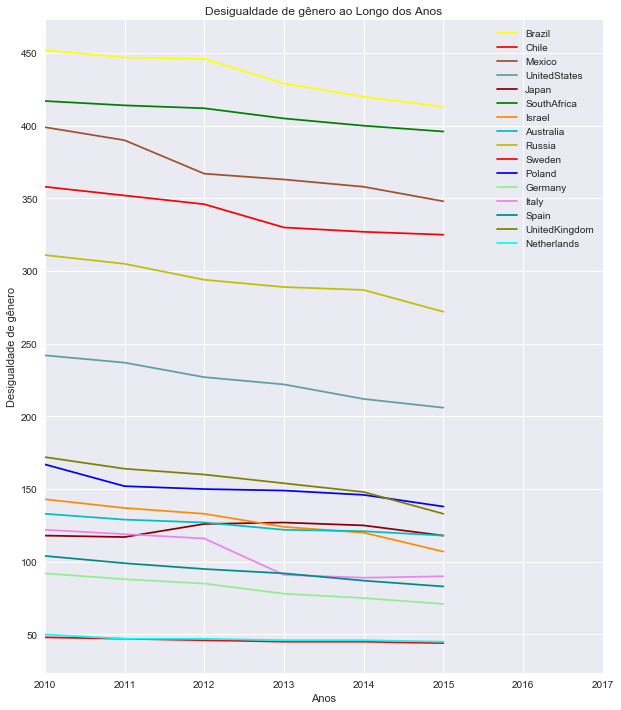

In [55]:
generate_chart_lin(tgbr, tgch,tgme,tgus,tgjp,tgsa,tgis,tgau,tgru,tgsw,tgpo,tgge,tgit,tgsp,tguk,tgne,
                           'year',"genderInequality",[2010,2017],'Anos', 'Desigualdade de gênero', 
                           ['Brazil','Chile','Mexico','UnitedStates','Japan','SouthAfrica',
                            'Israel','Australia','Russia','Sweden', 'Poland',
                            'Germany','Italy', 'Spain','UnitedKingdom', 'Netherlands'], 
                            'Desigualdade de gênero ao Longo dos Anos' )

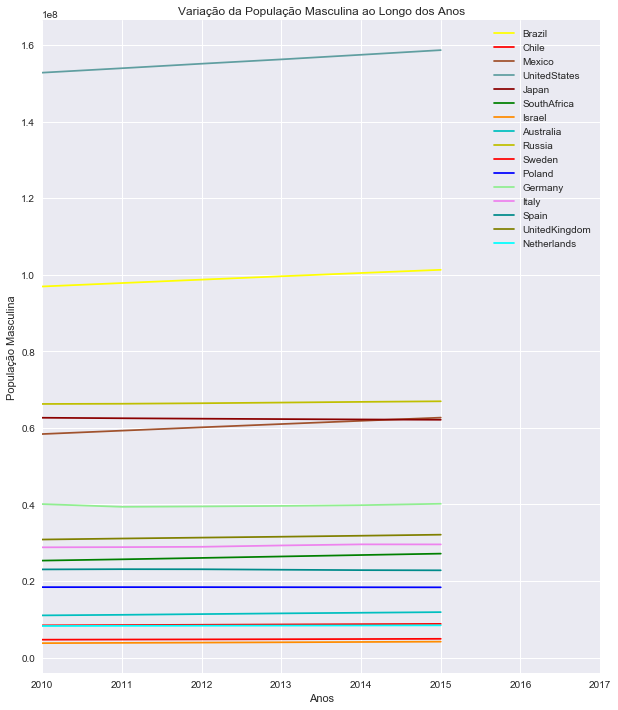

In [56]:
generate_chart_lin(tgbr, tgch,tgme,tgus,tgjp,tgsa,tgis,tgau,tgru,tgsw,tgpo,tgge,tgit,tgsp,tguk,tgne,
                           'year',"totalPopulationMale",[2010,2017],'Anos', 'População Masculina', 
                           ['Brazil','Chile','Mexico','UnitedStates','Japan','SouthAfrica',
                            'Israel','Australia','Russia','Sweden', 'Poland',
                            'Germany','Italy', 'Spain','UnitedKingdom', 'Netherlands'], 
                            'Variação da População Masculina ao Longo dos Anos' )

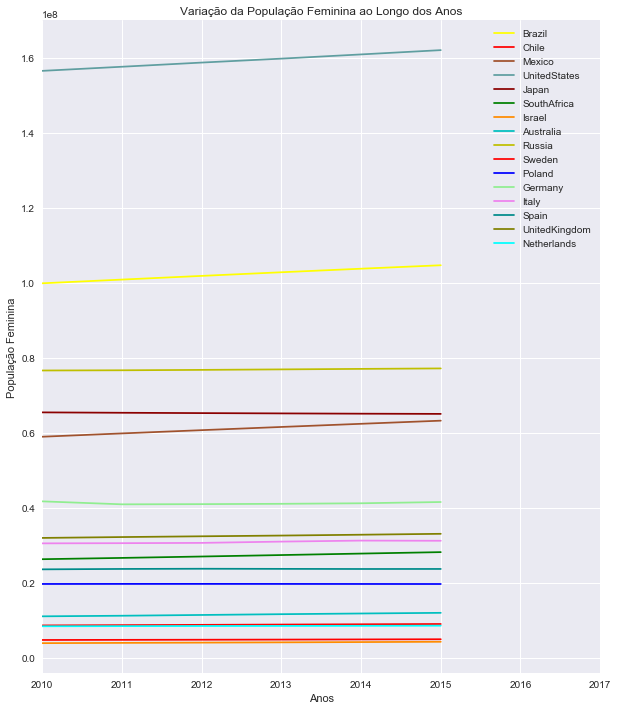

In [57]:
generate_chart_lin(tgbr, tgch,tgme,tgus,tgjp,tgsa,tgis,tgau,tgru,tgsw,tgpo,tgge,tgit,tgsp,tguk,tgne,
                           'year',"totalPopulationFemale",[2010,2017],'Anos', 'População Feminina', 
                           ['Brazil','Chile','Mexico','UnitedStates','Japan','SouthAfrica',
                            'Israel','Australia','Russia','Sweden', 'Poland',
                            'Germany','Italy', 'Spain','UnitedKingdom', 'Netherlands'], 
                            'Variação da População Feminina ao Longo dos Anos' )

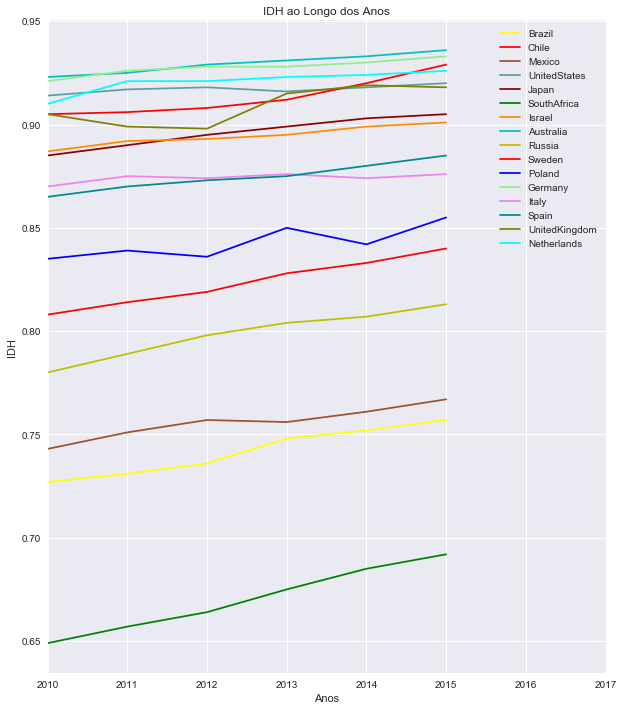

In [58]:
generate_chart_lin(tgbr, tgch,tgme,tgus,tgjp,tgsa,tgis,tgau,tgru,tgsw,tgpo,tgge,tgit,tgsp,tguk,tgne,
                           'year',"hdi",[2010,2017],'Anos', 'IDH', 
                           ['Brazil','Chile','Mexico','UnitedStates','Japan','SouthAfrica',
                            'Israel','Australia','Russia','Sweden', 'Poland',
                            'Germany','Italy', 'Spain','UnitedKingdom', 'Netherlands'], 
                            'IDH ao Longo dos Anos' )

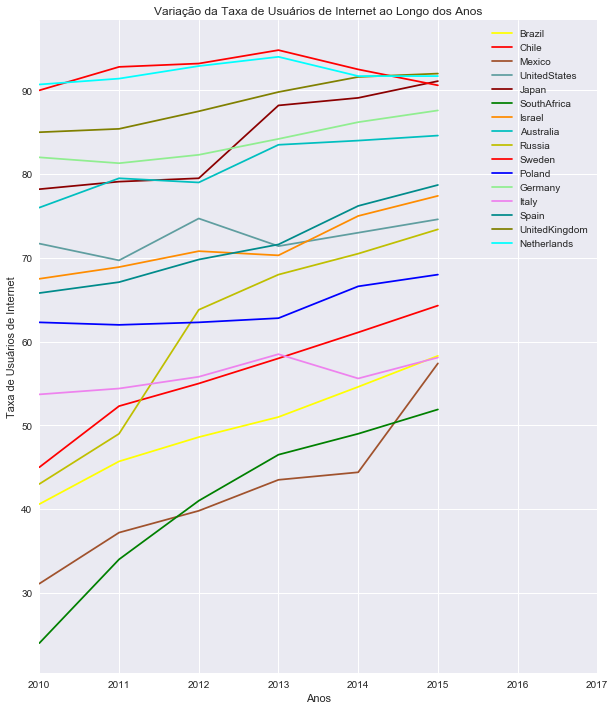

In [59]:
generate_chart_lin(tgbr, tgch,tgme,tgus,tgjp,tgsa,tgis,tgau,tgru,tgsw,tgpo,tgge,tgit,tgsp,tguk,tgne,
                           'year',"totalUsersInternet",[2010,2017],'Anos', 'Taxa de Usuários de Internet', 
                           ['Brazil','Chile','Mexico','UnitedStates','Japan','SouthAfrica',
                            'Israel','Australia','Russia','Sweden', 'Poland',
                            'Germany','Italy', 'Spain','UnitedKingdom', 'Netherlands'], 
                            'Variação da Taxa de Usuários de Internet ao Longo dos Anos' )

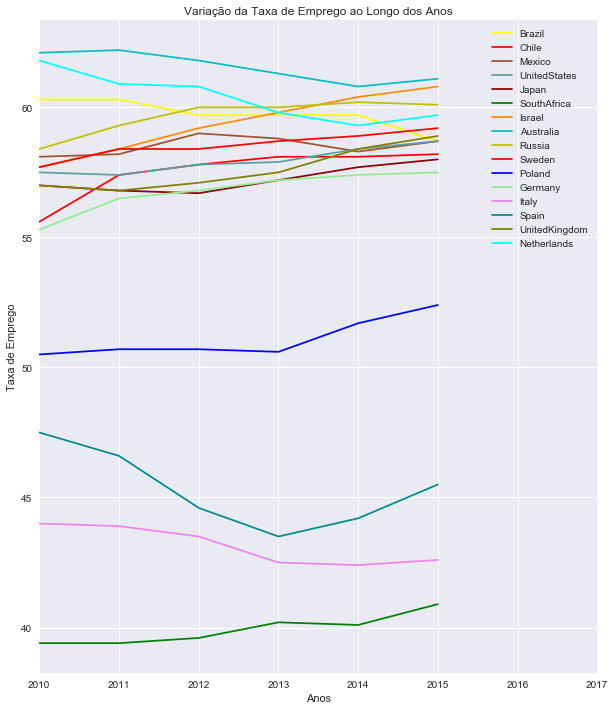

In [60]:
generate_chart_lin(tgbr, tgch,tgme,tgus,tgjp,tgsa,tgis,tgau,tgru,tgsw,tgpo,tgge,tgit,tgsp,tguk,tgne,
                           'year',"rateEmployment15andOlder",[2010,2017],'Anos', 'Taxa de Emprego', 
                           ['Brazil','Chile','Mexico','UnitedStates','Japan','SouthAfrica',
                            'Israel','Australia','Russia','Sweden', 'Poland',
                            'Germany','Italy', 'Spain','UnitedKingdom', 'Netherlands'], 
                            'Variação da Taxa de Emprego ao Longo dos Anos' )

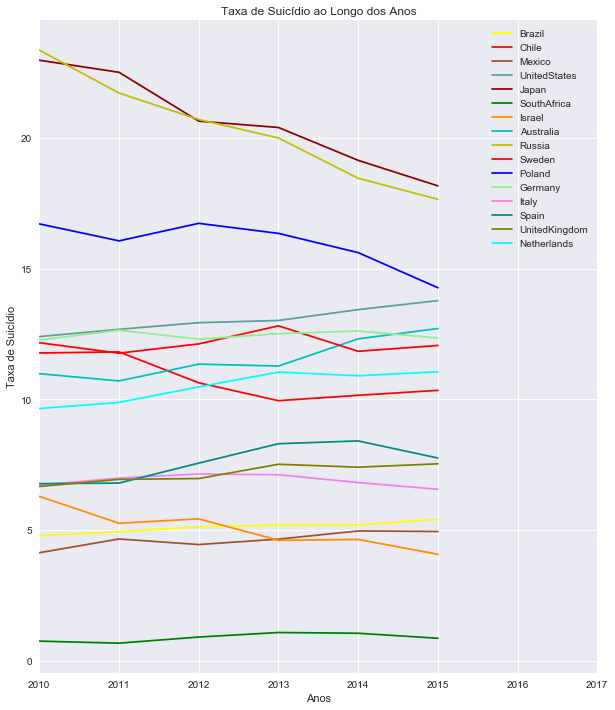

In [61]:
generate_chart_lin(tgbr, tgch,tgme,tgus,tgjp,tgsa,tgis,tgau,tgru,tgsw,tgpo,tgge,tgit,tgsp,tguk,tgne,
                           'year',"suicides_no",[2010,2017],'Anos', 'Taxa de Suicídio', 
                           ['Brazil','Chile','Mexico','UnitedStates','Japan','SouthAfrica',
                            'Israel','Australia','Russia','Sweden', 'Poland',
                            'Germany','Italy', 'Spain','UnitedKingdom', 'Netherlands'], 
                            'Taxa de Suicídio ao Longo dos Anos' )

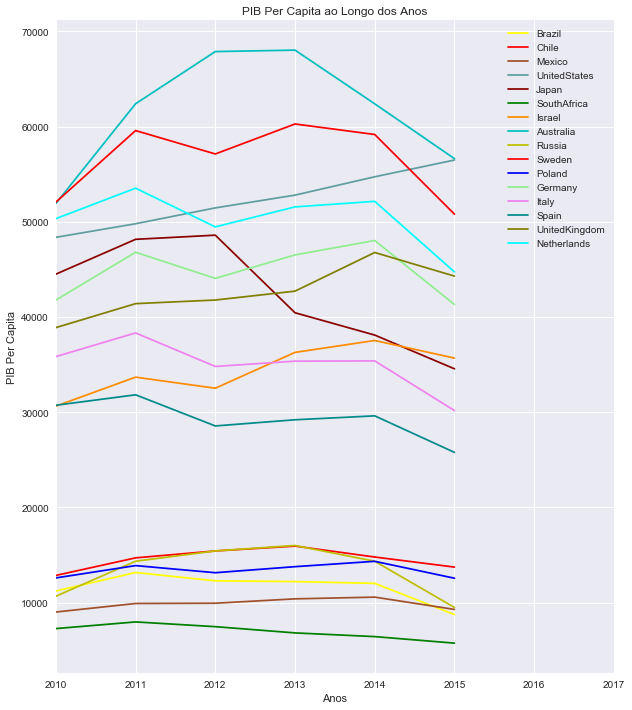

In [62]:
generate_chart_lin(tgbr, tgch,tgme,tgus,tgjp,tgsa,tgis,tgau,tgru,tgsw,tgpo,tgge,tgit,tgsp,tguk,tgne,
                           'year',"gdp-year",[2010,2017],'Anos', 'PIB Per Capita', 
                           ['Brazil','Chile','Mexico','UnitedStates','Japan','SouthAfrica',
                            'Israel','Australia','Russia','Sweden', 'Poland',
                            'Germany','Italy', 'Spain','UnitedKingdom', 'Netherlands'], 
                            'PIB Per Capita ao Longo dos Anos' )

In [63]:
#Agrupando por Continente

gamerica = america.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder", "continent"], as_index=False).sum()
gaao = asiaAfricaOceania.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder", "continent"], as_index=False).sum()
geurons = europe_northern_southern.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder", "continent"], as_index=False).sum()
geurowe = europe_western_eastern.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation","totalUsersInternet","rateEmployment15andOlder", "continent"], as_index=False).sum()

In [64]:
# unindo todos os paises com seus respectivos continentes:
allcountrys = pd.concat([geurons, gamerica,gaao, geurowe], sort= True)
allcountrys = allcountrys.sort_values(by=['country','year'])
allcountrys['suicides_no'] = list((allcountrys['suicides_no']/allcountrys['totalPopulation'])*100000)
allcountrys['gdp-year'] = list(allcountrys['gdp-year']/allcountrys['totalPopulation'])

In [65]:
def generate_3d_bouble_chart(df, x_column, y_column, z_column, text, color_column, title_color_column, title_chart, file_name):
    trace1 = go.Scatter3d(
        x=df[x_column],
        y=df[y_column],
        z=df[z_column],
        text=df[text],
        mode='markers',
        marker=dict(
            sizemode='diameter',
            sizeref=750,
            color = df[color_column],
            colorscale = 'Viridis',
            colorbar = dict(title = title_color_column),
            line=dict(color='rgb(140, 140, 170)')
        )
    )

    data=[trace1]

    layout=go.Layout(height=800, width=800, title=title_chart)

    fig=go.Figure(data=data, layout=layout)
    py.iplot(fig, filename=file_name)
   
    #Referência: https://plot.ly/python/3d-bubble-charts/

In [66]:
# Taxa de suicídio:
generate_3d_bouble_chart(allcountrys,'year','continent','totalPopulation',
                         'country','suicides/100kpop','Suicidio por cada<br>100 mil Habitantes',
                         'Relação:<br>Tamanho da População X Taxa de Suicídio ao Longo do Tempo', 'analise_taxa')
# Desigualdade de gênero:
generate_3d_bouble_chart(allcountrys,'year','continent','totalPopulation',
                         'country','genderInequality','Desigualdade<br>de genero',
                         'Relação:<br>Tamanho da População X Desigualdade de genero ao Longo do Tempo', 'analise_genero_eq')
# PIB Per Capita:
generate_3d_bouble_chart(allcountrys,'year','continent','totalPopulation',
                         'country','gdp-year','PIB<br>Per Capita',
                         'Relação:<br>Tamanho da População X PIB Per Capita ao Longo do Tempo', 'analise_gdp')
# IDH
generate_3d_bouble_chart(allcountrys,'year','continent','totalPopulation',
                         'country','hdi','IDH',
                         'Relação:<br>Tamanho da População X Índice de Desenvolvimento Humano ao Longo do Tempo', 'analise_idh')
# Taxa de Usuários com Internet
generate_3d_bouble_chart(allcountrys,'year','continent','totalPopulation',
                         'country','totalUsersInternet','Taxa de Usuários com Internet',
                         'Relação:<br>Tamanho da População X Taxa de Usuários com Internet ao Longo do Tempo', 'analise_int')
# Taxa de Emprego
generate_3d_bouble_chart(allcountrys,'year','continent','totalPopulation',
                         'country','rateEmployment15andOlder','Taxa de Emprego',
                         'Relação:<br>Tamanho da População X Taxa de Emprego ao Longo do Tempo', 'analise_emp')
# Taxa de Suicidio x Taxa de Emprego
generate_3d_bouble_chart(allcountrys,'year','continent','suicides_no',
                         'country','rateEmployment15andOlder','Taxa de Emprego',
                         'Relação:<br>Tamanho de Suicídio X Taxa de Emprego ao Longo do Tempo', 'analise_suicide_emp')

In [67]:
#Agrupando por sub região

south_america_group = south_america.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
eastern_europe_group = eastern_europe.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
northern_europe_group = northern_europe.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
southern_europe_group = southern_europe.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
western_europe_group = western_europe.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
asia_group = asia.groupby(["year","country","totalPopulationFemale","totalPopulationMale","gdp-year","gdp-per-capita","hdi"], as_index=False).sum()

In [68]:
def axis_x_center(length=1):
    start = -(length//2) if length%2 == 0 else -((length//2))
    end = (length//2) if length%2 == 0 else ((length//2)+1)
    
    return [x for x in range(start, end)]

In [69]:
#Função para gerar gráfico de taxa de suicídio por gênero.
# Os comentários abaixo podem ser aplicados paras as demais funções semelhantes.
def generate_chart_suicide_gen(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y) # label do eixo y
    plt.xlabel(axis_x) # label do eixo x
    plt.title(title) # titulo do gráfico
    plt.rcParams["figure.figsize"] = (10,8)
    ax = plt.subplot() # Necessário para plotar o tipo de gráfico que será utilizado.
    
    country_sex = list(df["sex"].unique())  # Pega os valores unicos da coluna do df.
    year_df = list(df["year"].unique())  # Pega os valores unicos da coluna do df.
    country_year = np.asarray(year_df) # Converte em um array do numpy.
    
    list_num = axis_x_center(len(country_sex))  # Centraliza os labels dos paises. - # Centraliza os labels do eixo x.
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3)))  # alterar as larguras dos limites no eixo x.
    plt.xticks(country_year) #  #seta os labels do eixo x
    
    for index in range(len(country_sex)):
        if country_sex[index] == "female":
            country_list = list((df["suicides_no"][df["sex"] == country_sex[index]]/df["totalPopulationFemale"][df["sex"] == country_sex[index]])*100000)
            # Linha anterior: Monta a lista que será passada no gráfico com os dados que se quer para o gráfico. Irá variar para cada tipo de dado que quer mostrar no gráfico.
            country_list = np.asarray(country_list) # Converte em um array do numpy.
        elif country_sex[index] == "male":
            country_list = list((df["suicides_no"][df["sex"] == country_sex[index]]/df["totalPopulationMale"][df["sex"] == country_sex[index]])*100000)
            # Linha anterior: Monta a lista que será passada no gráfico com os dados que se quer para o gráfico. Irá variar para cada tipo de dado que quer mostrar no gráfico.
            country_list = np.asarray(country_list) # Converte em um array do numpy.
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_sex[index], color=list_colors[index])
        # Parâmetros da linha anterior: label eixo x (ex: anos), (eixo y), largura, alinhamento, as barras, lista de cores.
        ax.legend(loc="upper left") # legendas do grafico.


    plt.show()

In [70]:
#Função para gerar gráfico de taxa de suicídio por idade.
def generate_chart_suicide_age(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (14,12)
    ax = plt.subplot()
    
    country_age = list(df["age"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_age)) # Centraliza os labels do eixo x
    plt.xlim(country_year[0]+(wd*(list_num[0]-6)), country_year[-1]+(wd*(list_num[-1]+3))) # alterar as larguras dos limites no eixo x.
    plt.xticks(country_year) #seta os labels do eixo x
    
    for index in range(len(country_age)):
        country_list = list(df["suicides/100kpop"][df["age"] == country_age[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_age[index], color=list_colors[index])
       # label eixo x (ex: anos), (eixo y), largura, alinhamento, las barras, lista de cores.
        ax.legend(loc="upper left") # legendas do grafico.
    plt.show()

In [71]:
#Função para gerar gráfico de taxa de suicídio total por país.
def generate_chart_suicide_total(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (14,12)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name)) 
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list((df["suicides_no"][df["country"] == country_name[index]]/df["totalPopulation"][df["country"] == country_name[index]])*100000)
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper right")


    plt.show()

In [72]:
#Função para gerar gráfico de taxa de idh total por país.
def generate_chart_hdi_total(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.ylim(0.6, 1)
    plt.rcParams["figure.figsize"] = (14,12)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_hdi = list(df["hdi"][df["country"] == country_name[index]])
        country_hdi = np.asarray(country_hdi)
        ax.bar(country_year+(wd*list_num[index]), country_hdi, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show() 

In [73]:
#Função para gerar gráfico de Desigualdade de Gênero por país.
def generate_chart_gender_inequality(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (14,12)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list((df["genderInequality"][df["country"] == country_name[index]]))
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper right")


    plt.show()

In [74]:
#Função para gerar gráfico do PIB por país.
def generate_chart_gdp_year(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (14,12)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["gdp-year"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [75]:
#Função para gerar gráfico de população total por país.
def generate_chart_total_pop(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (14,12)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["totalPopulation"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [76]:
#Função para gerar gráfico de taxa de PIB per capita por país.
def generate_chart_gdp_pc(df, axis_y, axis_x, title, list_colors,wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (14,12)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name)) 
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3))) 
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list((df["gdp-year"][df["country"] == country_name[index]]/df["totalPopulation"][df["country"] == country_name[index]]))
        country_list = np.asarray(country_list)  # converter uma lista num array numpy.
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [77]:
def generate_chart_rate_population_age(df, axis_y, axis_x, title, population_sex, list_colors,wd = 0.15):
    list_colors = list_colors
    population_sex = population_sex
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (15,10)
    ax = plt.subplot()
    
    country_age = list(df["age"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_age)) 
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3))) 
    plt.xticks(country_year)
    
    for index in range(len(country_age)):
        country_list = list((df["population"][df["age"] == country_age[index]]) / (df[population_sex][df["age"] == country_age[index]])*100)
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_age[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [78]:
def generate_chart_rate_population_gen(df, axis_y, axis_x, title, list_colors, limy1= 45, limy2= 54, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y) 
    plt.xlabel(axis_x) 
    plt.title(title)
    plt.ylim(limy1,limy2)
    plt.rcParams["figure.figsize"] = (10,8)
    ax = plt.subplot() 
    
    country_sex = list(df["sex"].unique()) 
    year_df = list(df["year"].unique()) 
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_sex))  
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3))) 
    plt.xticks(country_year) 
    
    for index in range(len(country_sex)):
        if country_sex[index] == "female":
            country_list = list((df["totalPopulationFemale"][df["sex"] == country_sex[index]]/df["totalPopulation"][df["sex"] == country_sex[index]])*100)
            country_list = np.asarray(country_list) 
        elif country_sex[index] == "male":
            country_list = list((df["totalPopulationMale"][df["sex"] == country_sex[index]]/df["totalPopulation"][df["sex"] == country_sex[index]])*100)
            country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_sex[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [79]:
def generate_chart_growth_population_gen(df, axis_y, axis_x, title, list_colors, limy1= 45, limy2= 54, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y) 
    plt.xlabel(axis_x) 
    plt.title(title)
    plt.ylim(limy1,limy2)
    plt.rcParams["figure.figsize"] = (10,8)
    ax = plt.subplot() 
    
    country_sex = list(df["sex"].unique()) 
    year_df = list(df["year"].unique()) 
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_sex))  
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3))) 
    plt.xticks(country_year) 
    
    for index in range(len(country_sex)):
        if country_sex[index] == "female":
            country_list = list((df["growthPopulation"][df["sex"] == country_sex[index]]))
            country_list = np.asarray(country_list) 
        elif country_sex[index] == "male":
            country_list = list((df["growthPopulation"][df["sex"] == country_sex[index]]))
            country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_sex[index], color=list_colors[index])
        ax.legend(loc="upper left")

In [80]:
#Função para gerar gráfico de taxa de usuários de internet por país.
def generate_chart_users_internet(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (14,12)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-5)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["totalUsersInternet"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [81]:
#Função para gerar gráfico de taxa de Empregados por país.
def generate_chart_employment(df, axis_y, axis_x, title, list_colors,  ylim1=50, ylim2=60, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.ylim(ylim1,ylim2)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-5)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["rateEmployment15andOlder"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [82]:
def generate_growth_pop_age_lin(df, col_y, col_f, col_m, x_limit, x_label, y_label, legend, title):
    plt.plot(df[col_y],df[col_f], color='red' )
    plt.plot (df[col_y],df[col_m], color='green' )
    plt.xlim(x_limit)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(legend)
    plt.title(title)
    plt.show()

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



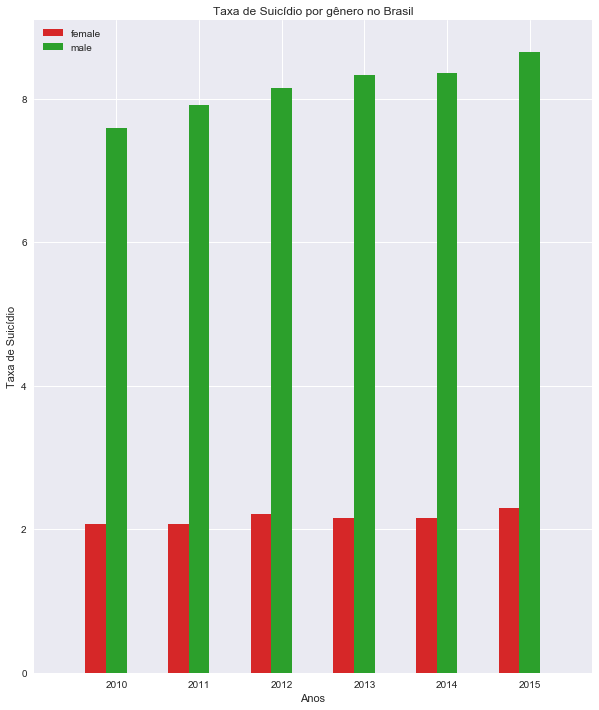

In [83]:
generate_chart_suicide_gen(gbr, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero no Brasil",male_female_colors, 0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



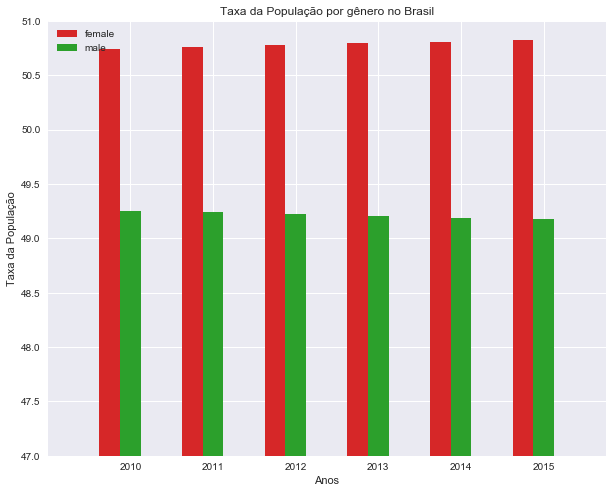

In [84]:
generate_chart_rate_population_gen(gbr, "Taxa da População", "Anos", "Taxa da População por gênero no Brasil",male_female_colors,47,51,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



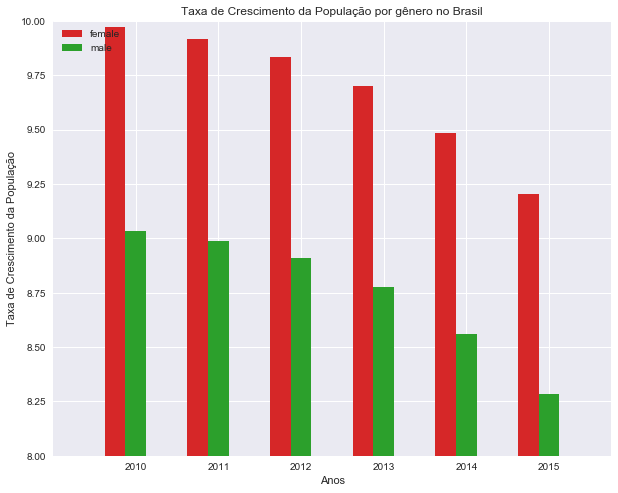

In [85]:
generate_chart_growth_population_gen(gbr, "Taxa de Crescimento da População", "Anos", "Taxa de Crescimento da População por gênero no Brasil",male_female_colors,8,10,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



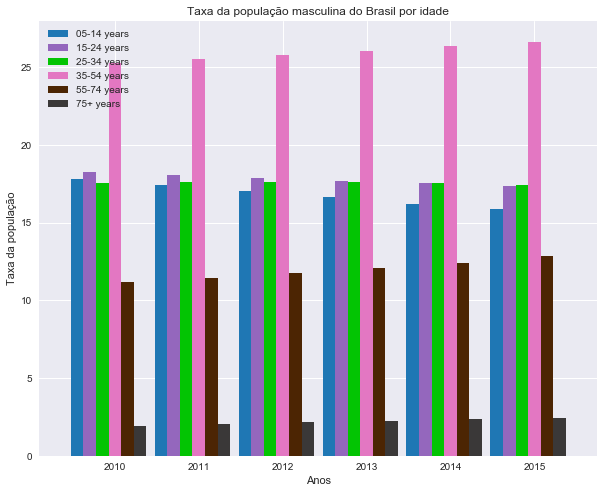

In [86]:
generate_chart_rate_population_age(brazil_male, "Taxa da população", "Anos", "Taxa da população masculina do Brasil por idade", "totalPopulationMale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



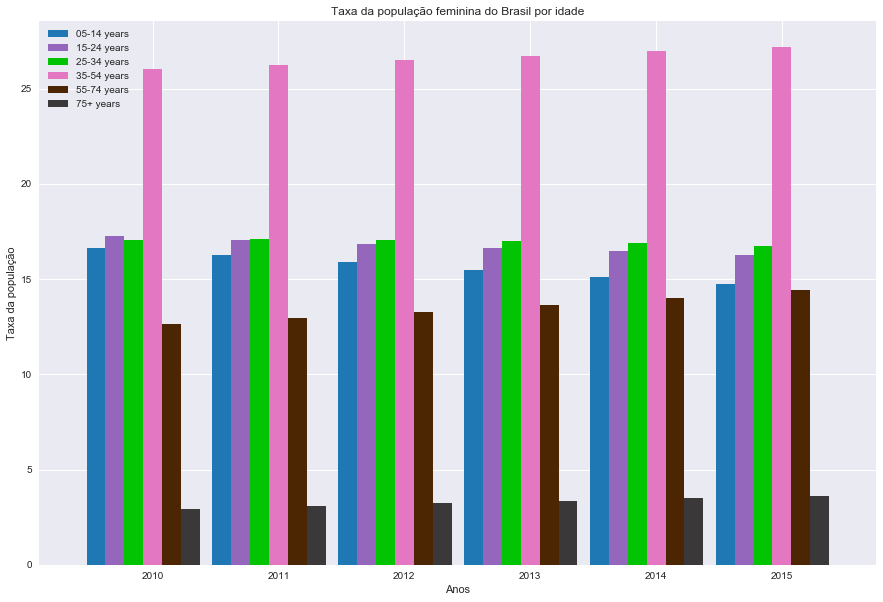

In [87]:
generate_chart_rate_population_age(brazil_female, "Taxa da população", "Anos", "Taxa da população feminina do Brasil por idade", "totalPopulationFemale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



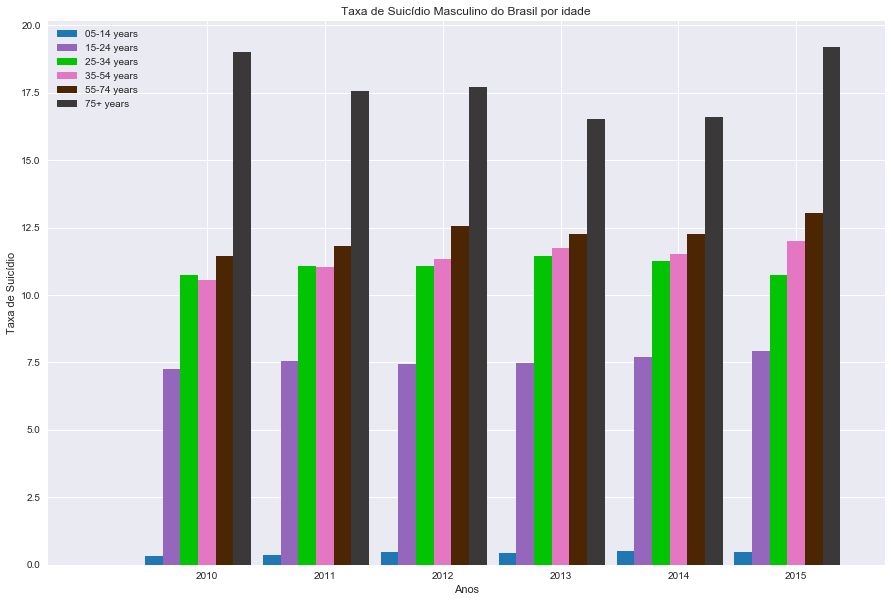

In [88]:
generate_chart_suicide_age(brazil_male, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Masculino do Brasil por idade", age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



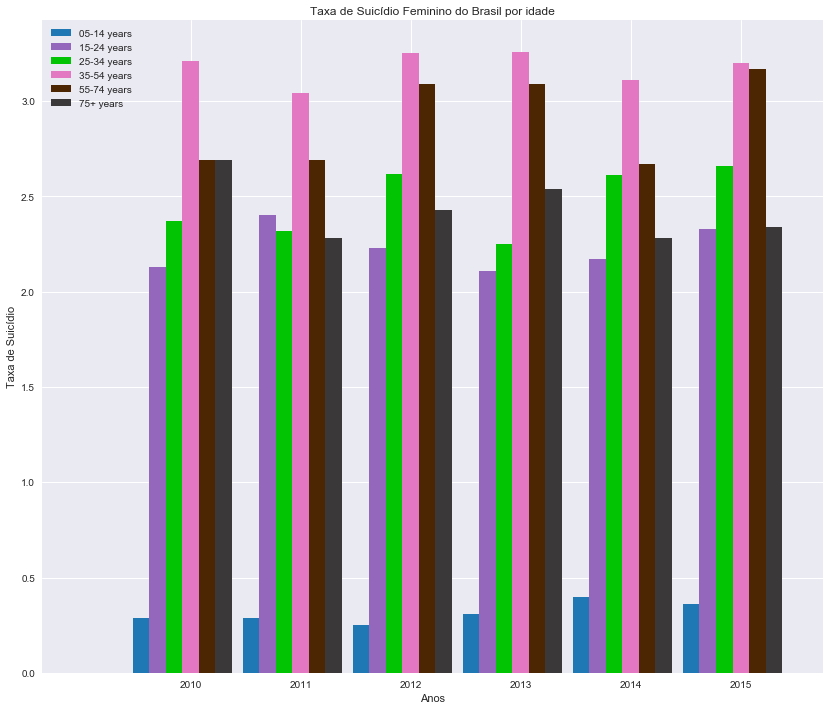

In [89]:
generate_chart_suicide_age(brazil_female, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Feminino do Brasil por idade", age_colors, 0.15)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



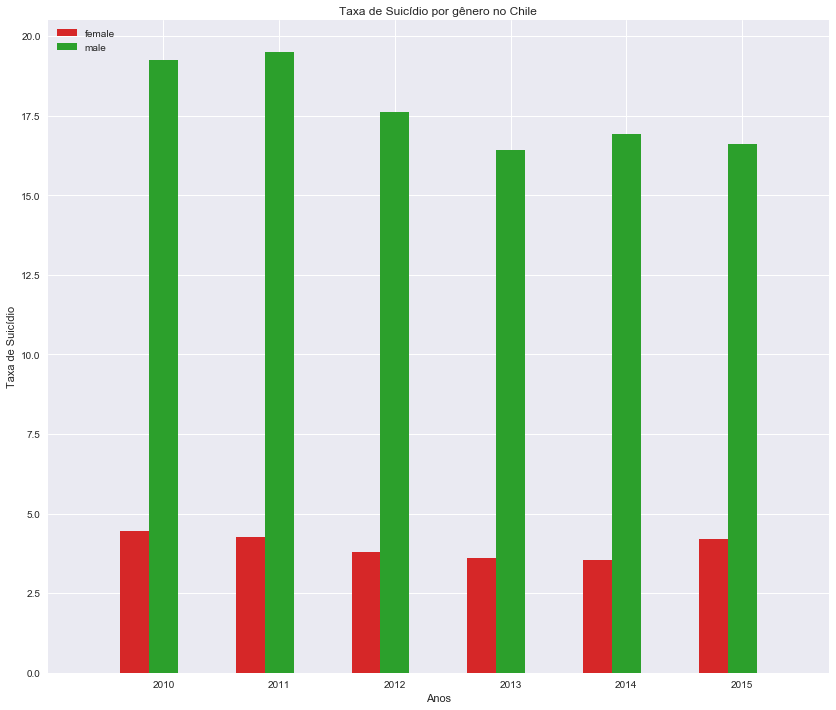

In [90]:
generate_chart_suicide_gen(gch, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero no Chile",male_female_colors, 0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



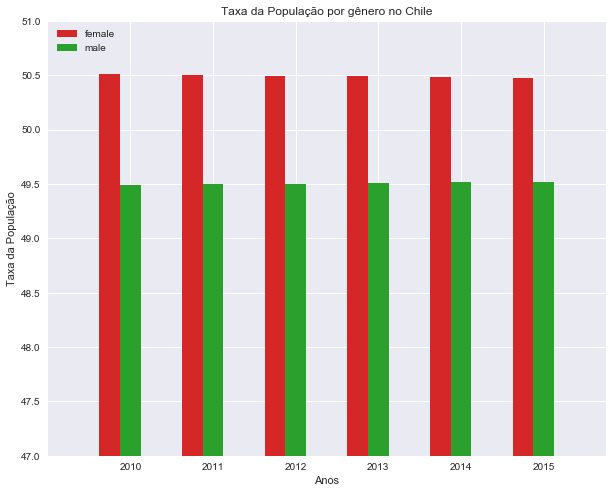

In [91]:
generate_chart_rate_population_gen(gch, "Taxa da População", "Anos", "Taxa da População por gênero no Chile",male_female_colors,47,51,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



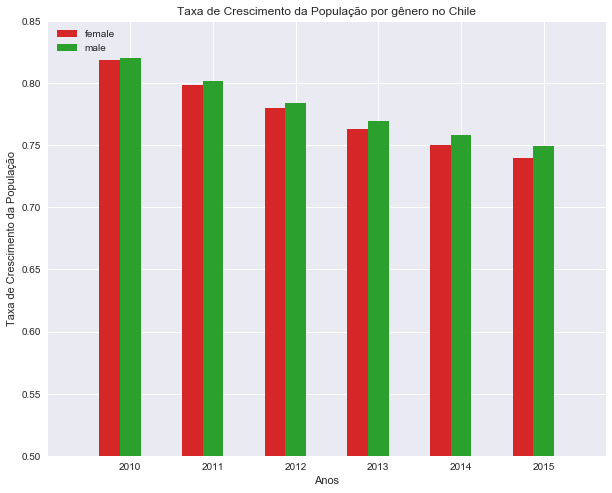

In [92]:
generate_chart_growth_population_gen(gch, "Taxa de Crescimento da População", "Anos", "Taxa de Crescimento da População por gênero no Chile",male_female_colors,0.5,0.85,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



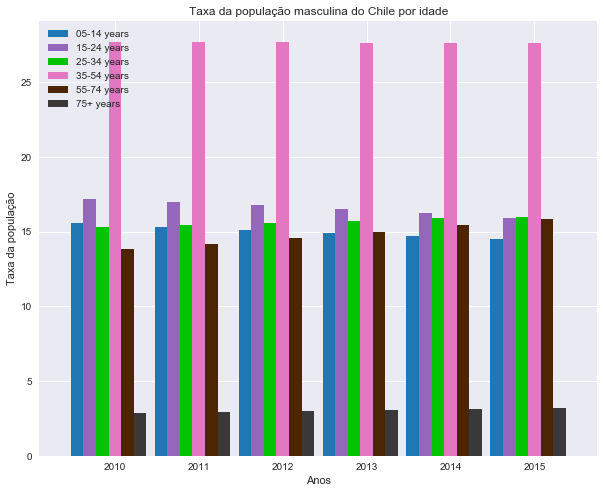

In [93]:
generate_chart_rate_population_age(chile_male, "Taxa da população", "Anos", "Taxa da população masculina do Chile por idade", "totalPopulationMale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



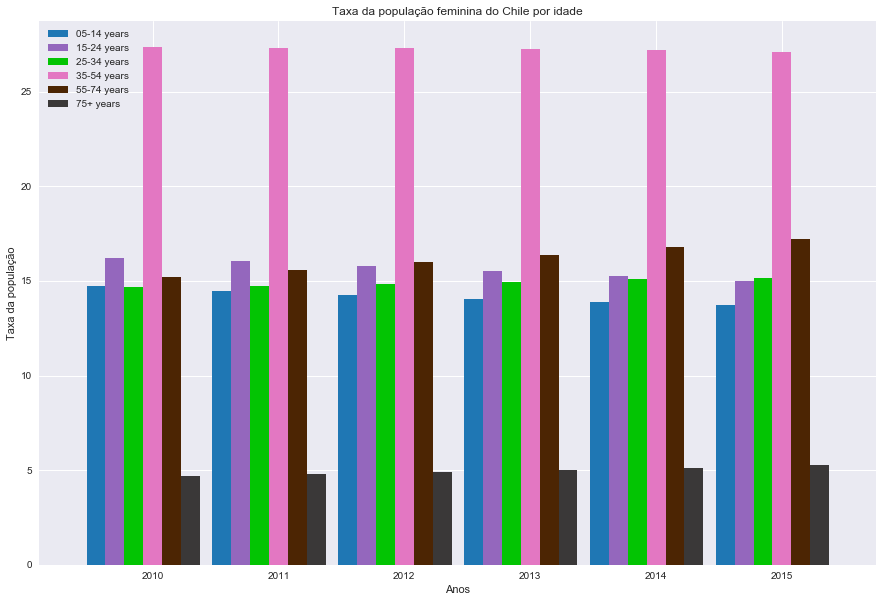

In [94]:
generate_chart_rate_population_age(chile_female, "Taxa da população", "Anos", "Taxa da população feminina do Chile por idade", "totalPopulationFemale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



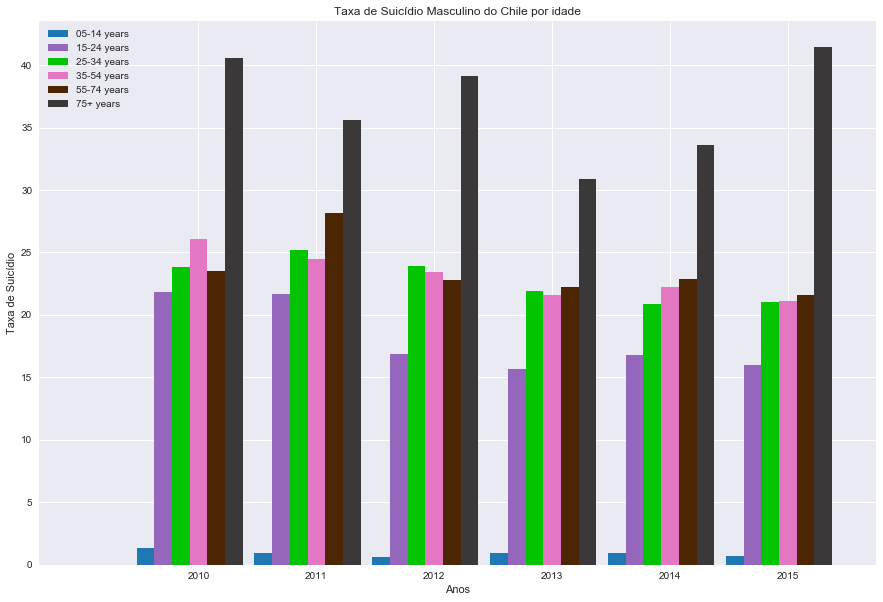

In [95]:
generate_chart_suicide_age(chile_male, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Masculino do Chile por idade", age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



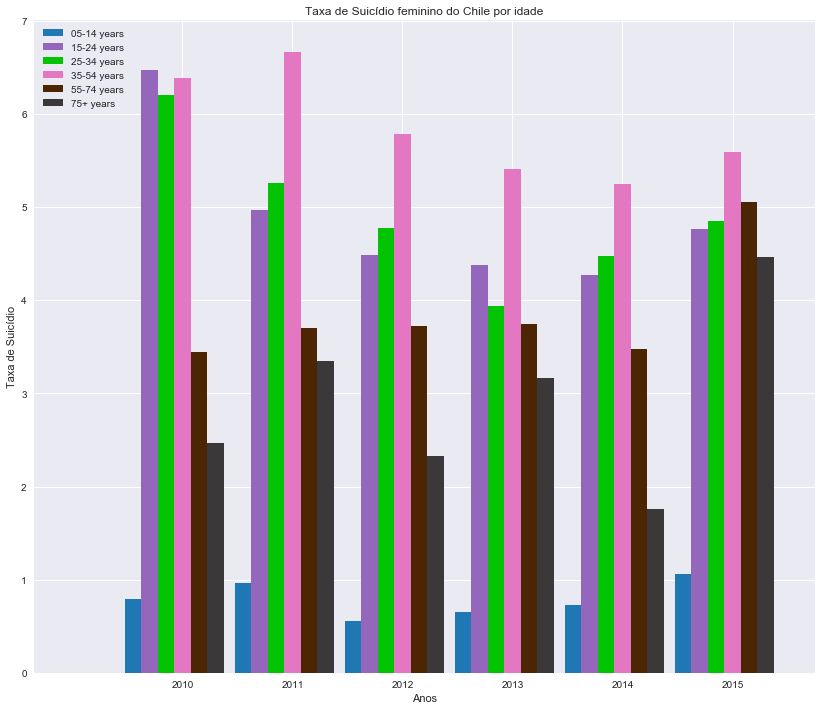

In [96]:
generate_chart_suicide_age(chile_female, "Taxa de Suicídio", "Anos", "Taxa de Suicídio feminino do Chile por idade", age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



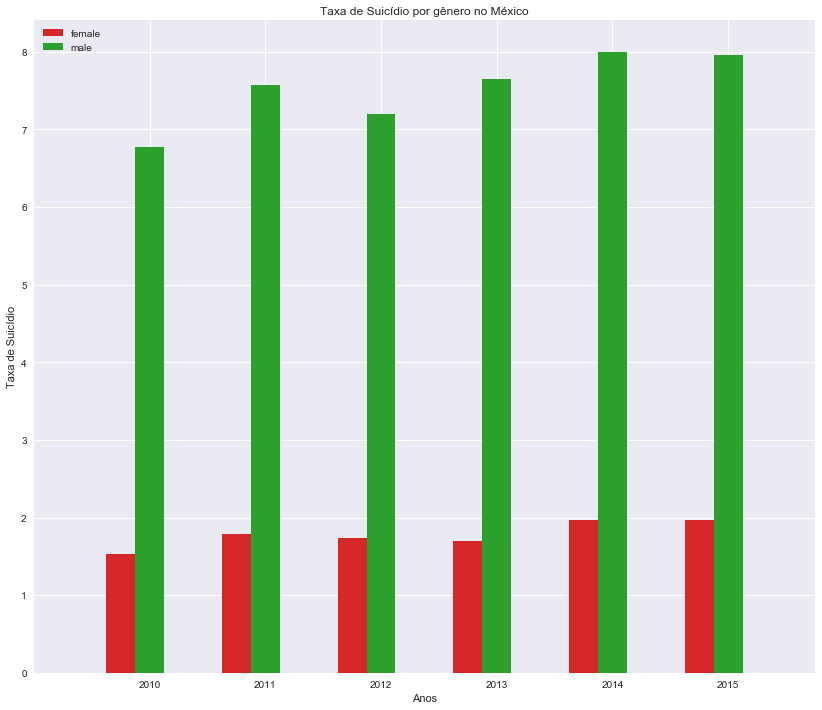

In [97]:
generate_chart_suicide_gen(gme, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero no México",male_female_colors, 0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



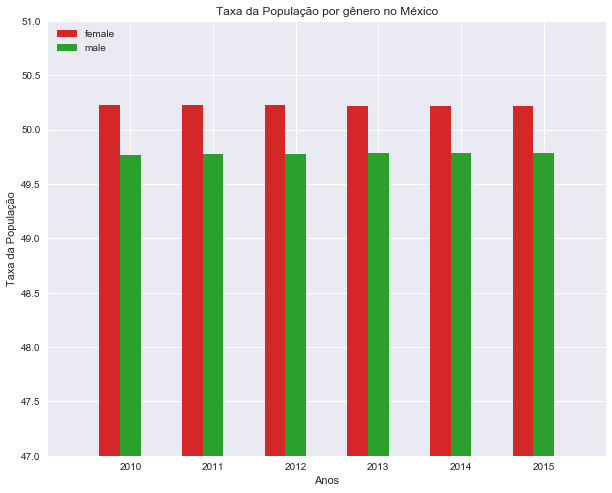

In [98]:
generate_chart_rate_population_gen(gme, "Taxa da População", "Anos", "Taxa da População por gênero no México",male_female_colors,47,51,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



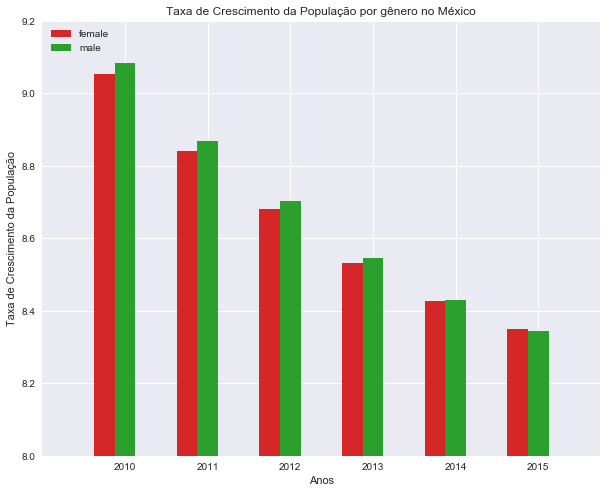

In [99]:
generate_chart_growth_population_gen(gme, "Taxa de Crescimento da População", "Anos", "Taxa de Crescimento da População por gênero no México",male_female_colors,8,9.2,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



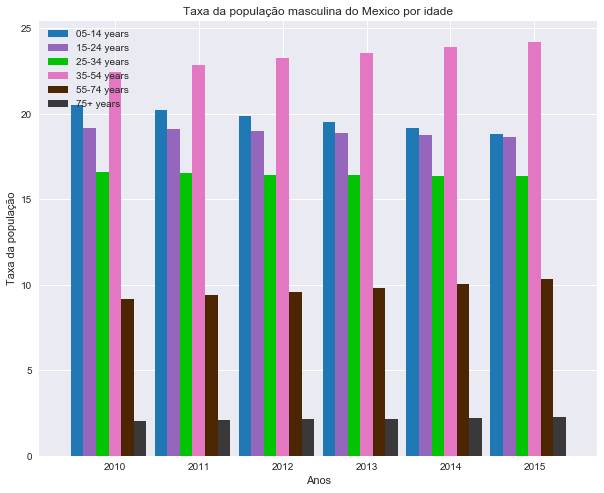

In [100]:
generate_chart_rate_population_age(mexico_male, "Taxa da população", "Anos", "Taxa da população masculina do Mexico por idade", "totalPopulationMale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



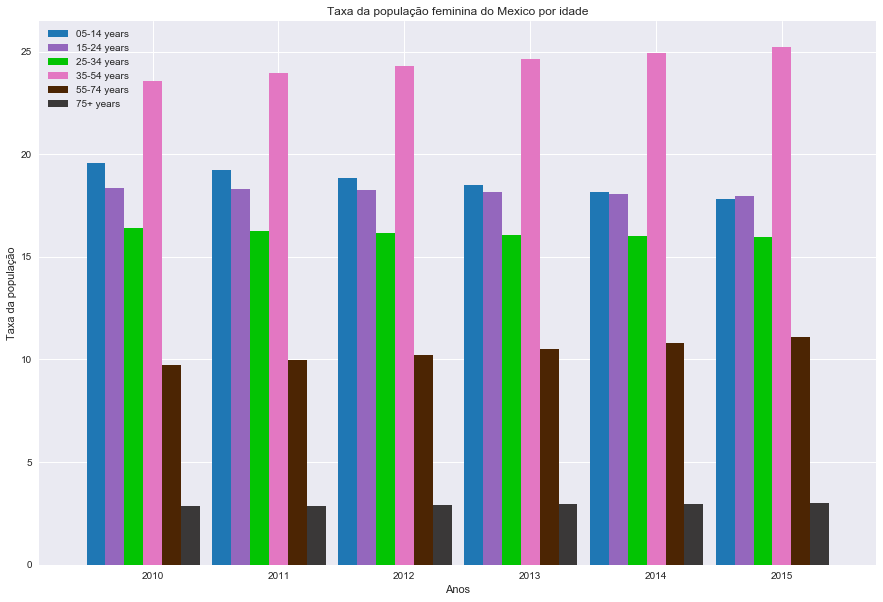

In [101]:
generate_chart_rate_population_age(mexico_female, "Taxa da população", "Anos", "Taxa da população feminina do Mexico por idade", "totalPopulationFemale",age_colors)


C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



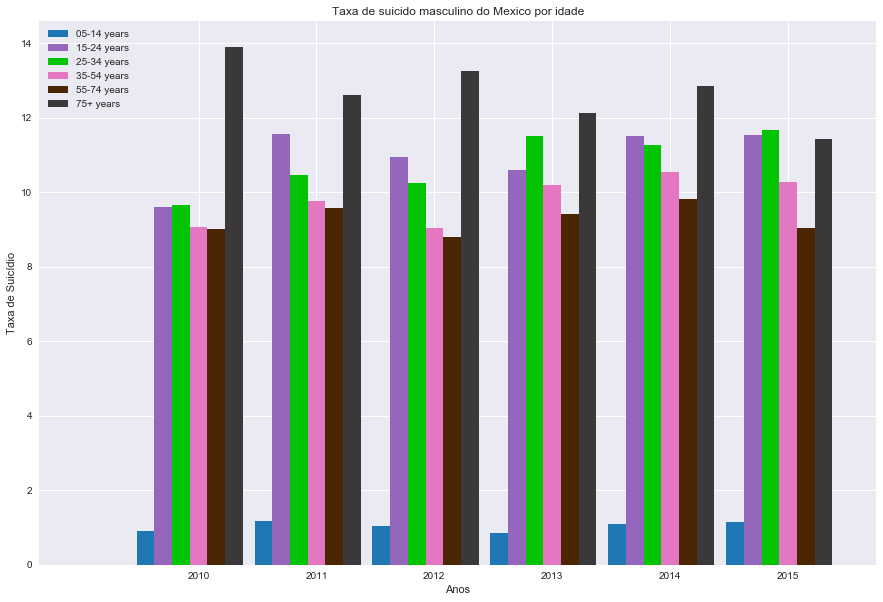

In [102]:
generate_chart_suicide_age(mexico_male, "Taxa de Suicídio", "Anos", "Taxa de suicido masculino do Mexico por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



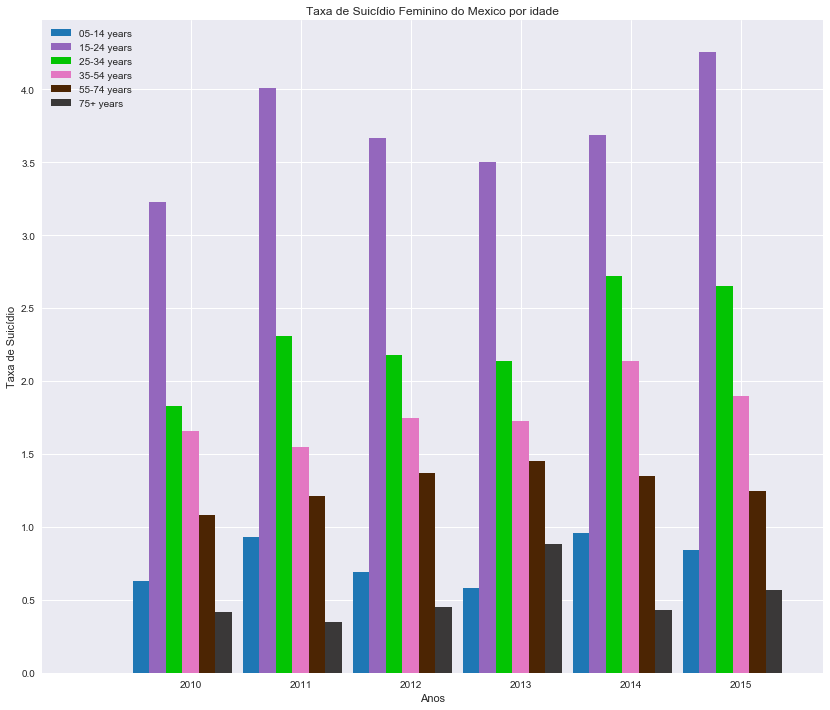

In [103]:
generate_chart_suicide_age(mexico_female, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Feminino do Mexico por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



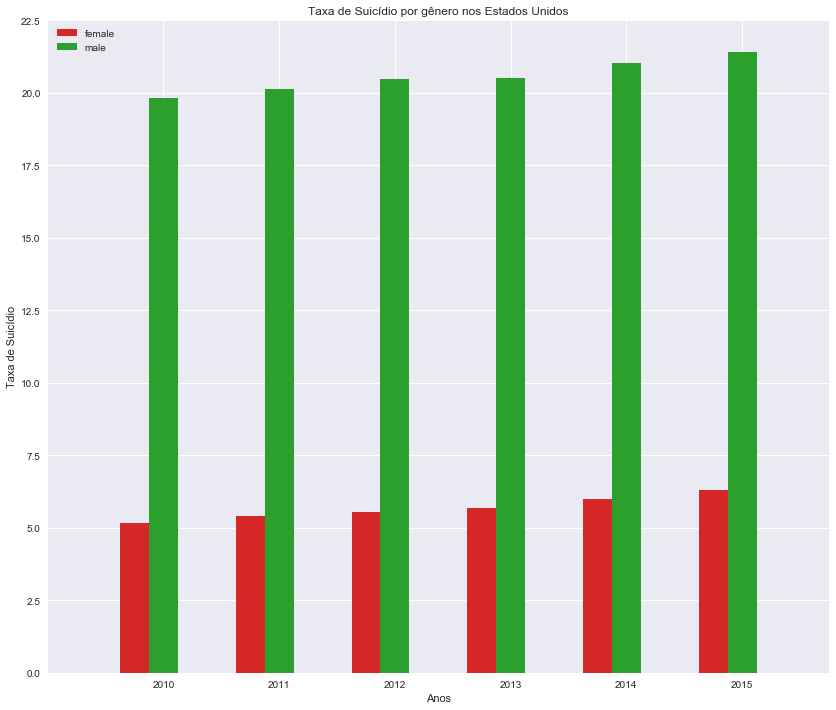

In [104]:
generate_chart_suicide_gen(gus, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero nos Estados Unidos",male_female_colors, 0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



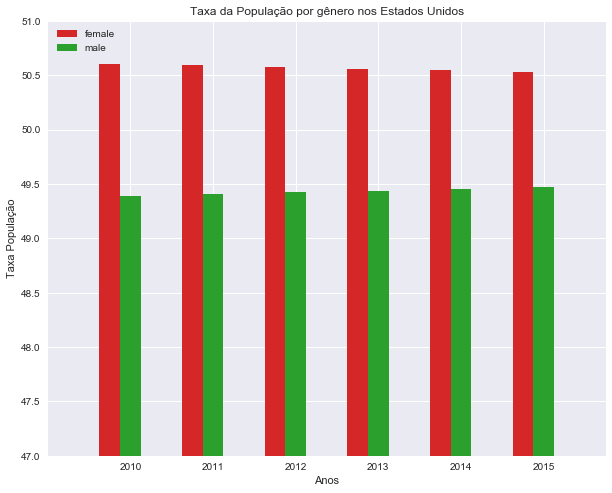

In [105]:
generate_chart_rate_population_gen(gus, "Taxa População", "Anos", "Taxa da População por gênero nos Estados Unidos",male_female_colors,47,51,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



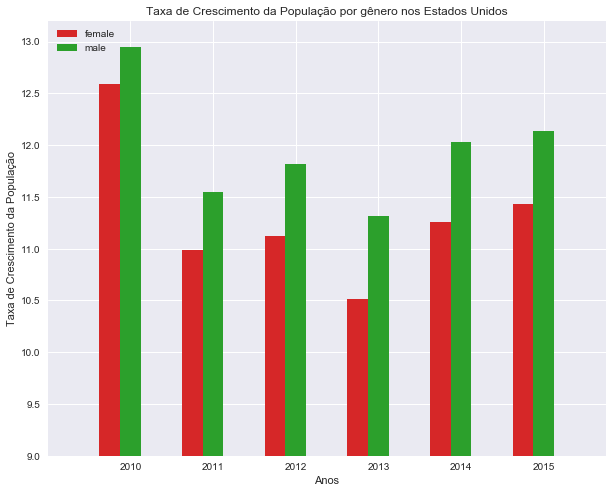

In [237]:
generate_chart_growth_population_gen(gus, "Taxa de Crescimento da População", "Anos", "Taxa de Crescimento da População por gênero nos Estados Unidos",male_female_colors,9,13.2,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



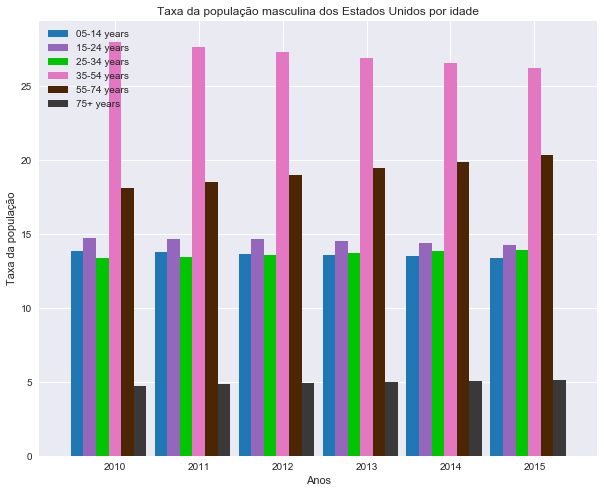

In [107]:
generate_chart_rate_population_age(unitedStates_male, "Taxa da população", "Anos", "Taxa da população masculina dos Estados Unidos por idade", "totalPopulationMale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



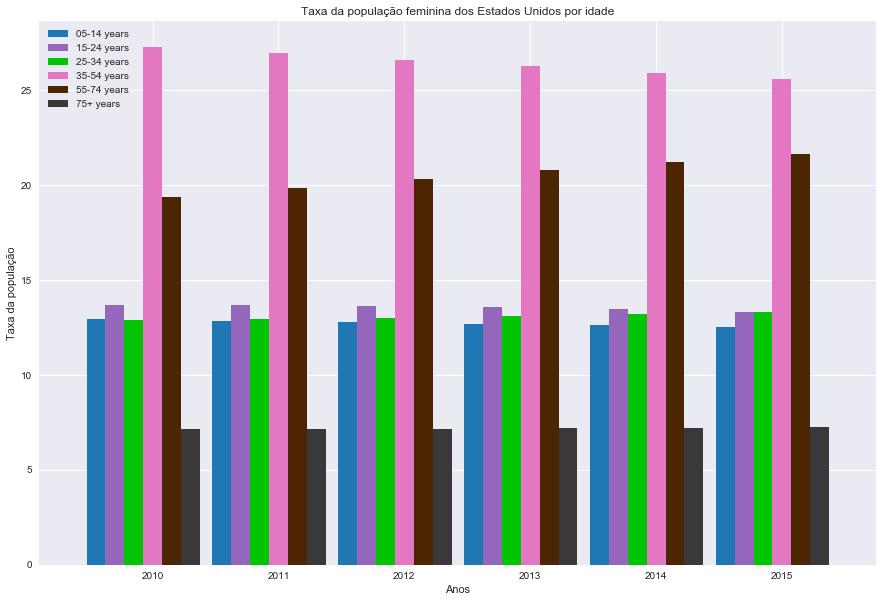

In [108]:
generate_chart_rate_population_age(unitedStates_female, "Taxa da população", "Anos", "Taxa da população feminina dos Estados Unidos por idade", "totalPopulationFemale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



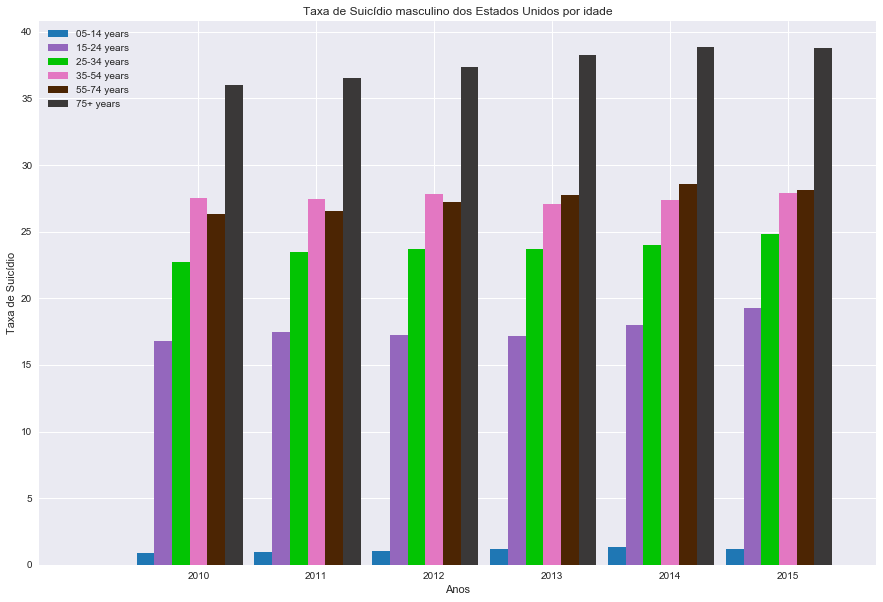

In [109]:
generate_chart_suicide_age(unitedStates_male, "Taxa de Suicídio", "Anos", "Taxa de Suicídio masculino dos Estados Unidos por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



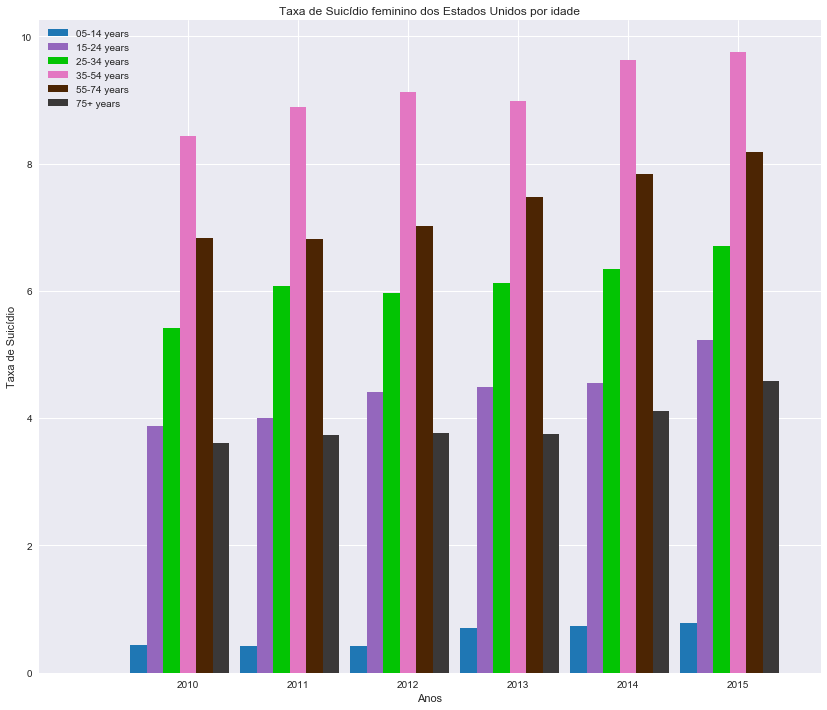

In [110]:
generate_chart_suicide_age(unitedStates_female, "Taxa de Suicídio", "Anos", "Taxa de Suicídio feminino dos Estados Unidos por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



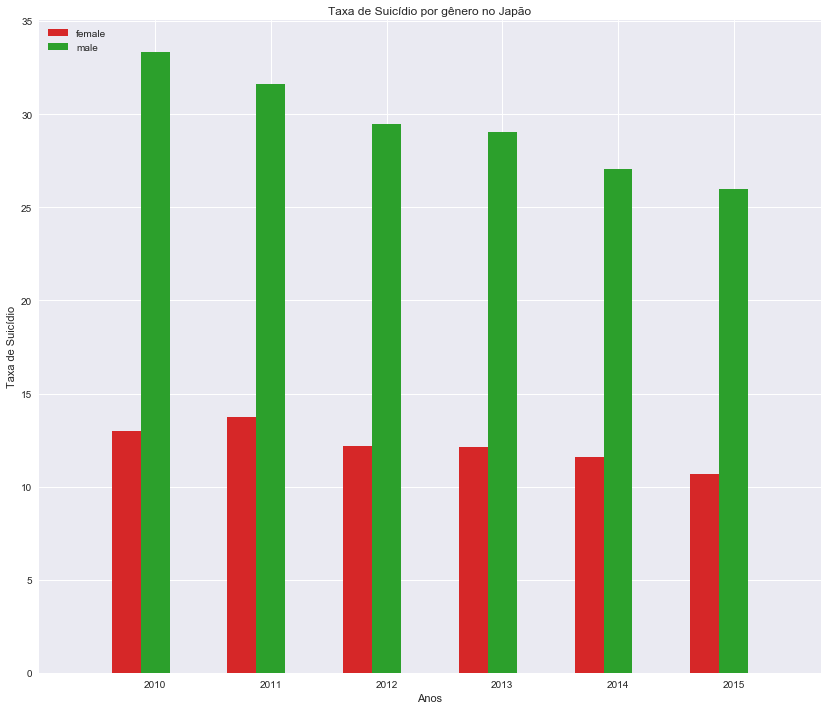

In [111]:
generate_chart_suicide_gen(gjp, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero no Japão",male_female_colors, 0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



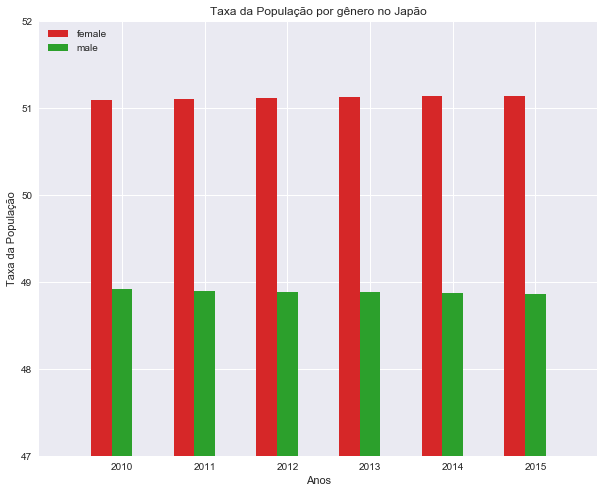

In [112]:
generate_chart_rate_population_gen(gjp, "Taxa da População", "Anos", "Taxa da População por gênero no Japão",male_female_colors,47,52,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



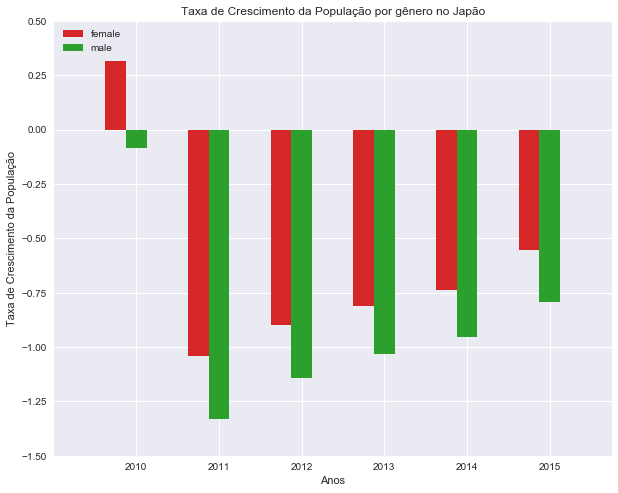

In [245]:
generate_chart_growth_population_gen(gjp, "Taxa de Crescimento da População", "Anos", "Taxa de Crescimento da População por gênero no Japão",male_female_colors,-1.5,0.5,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



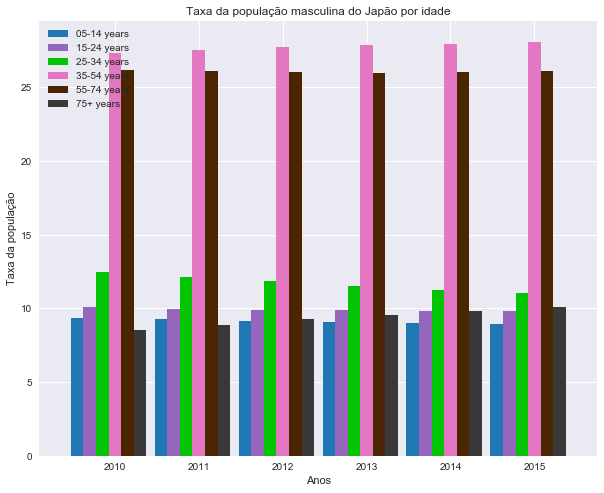

In [113]:
generate_chart_rate_population_age(japan_male, "Taxa da população", "Anos", "Taxa da população masculina do Japão por idade", "totalPopulationMale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



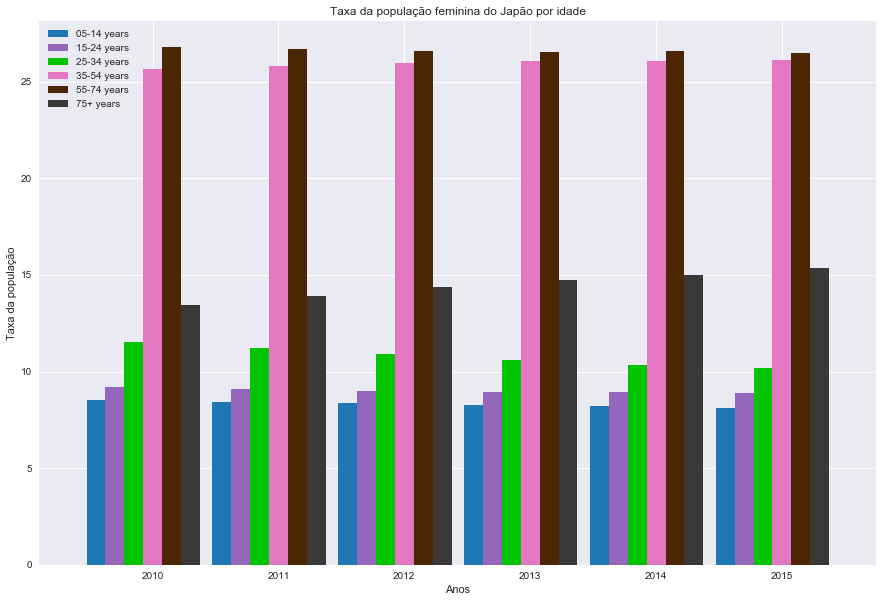

In [114]:
generate_chart_rate_population_age(japan_female, "Taxa da população", "Anos", "Taxa da população feminina do Japão por idade", "totalPopulationFemale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



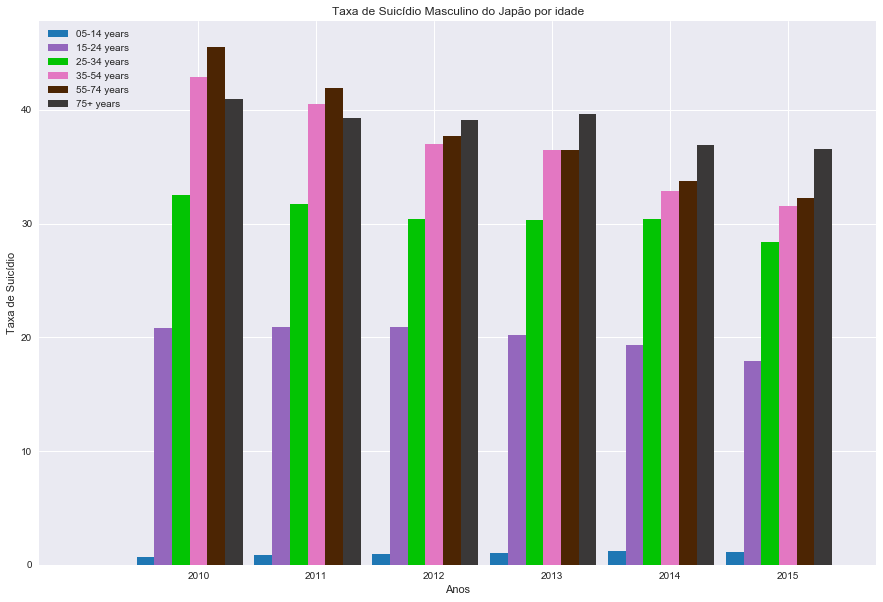

In [115]:
generate_chart_suicide_age(japan_male, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Masculino do Japão por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



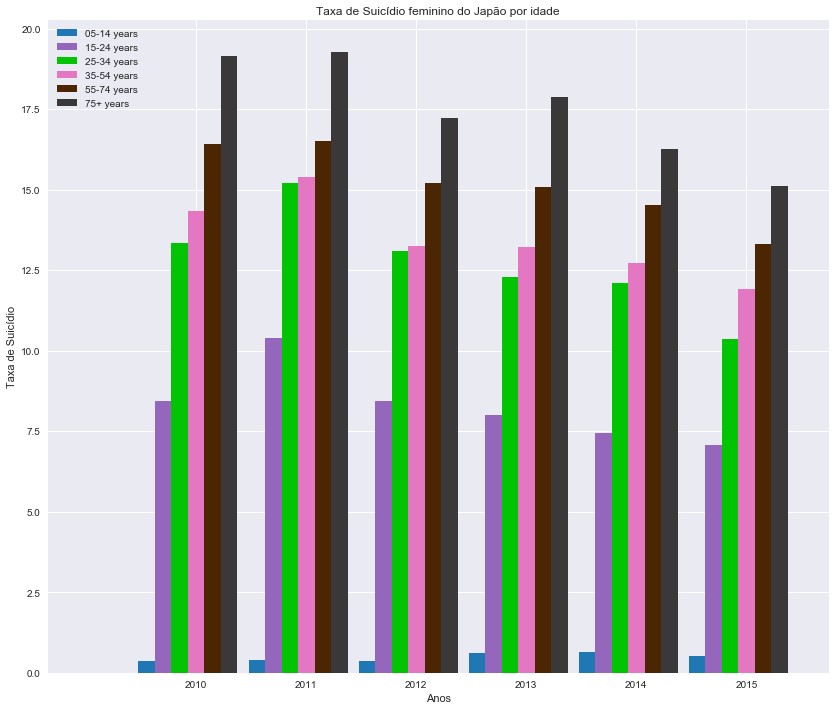

In [116]:
generate_chart_suicide_age(japan_female, "Taxa de Suicídio", "Anos", "Taxa de Suicídio feminino do Japão por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



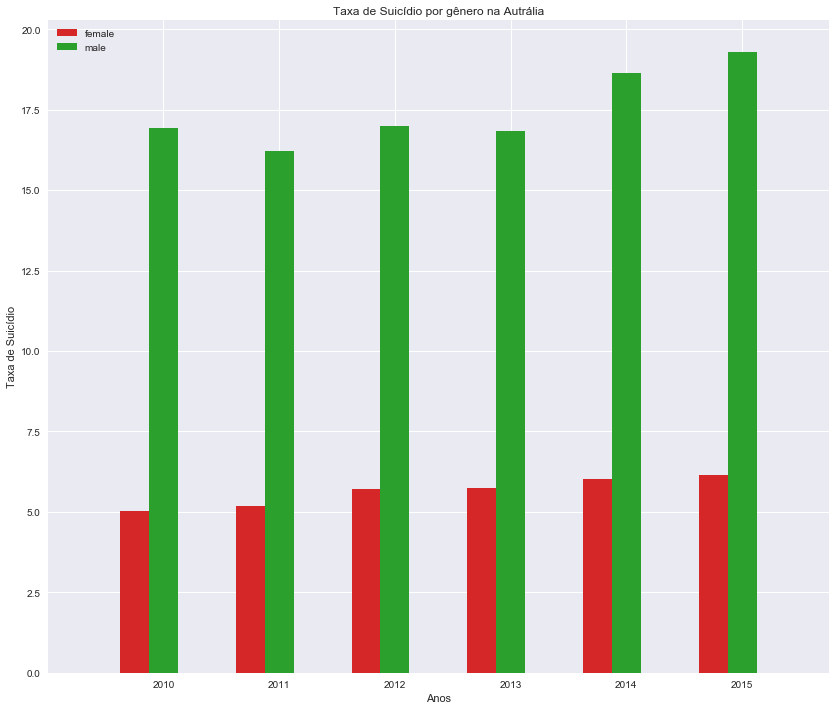

In [117]:
generate_chart_suicide_gen(gau, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Autrália",male_female_colors, 0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



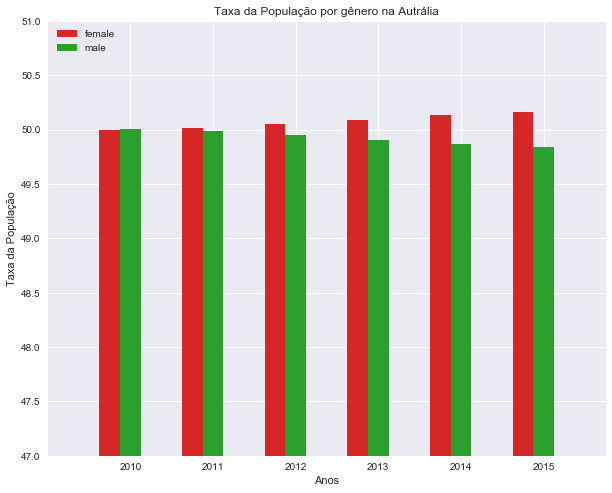

In [118]:
generate_chart_rate_population_gen(gau, "Taxa da População", "Anos", "Taxa da População por gênero na Autrália",male_female_colors,47,51,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



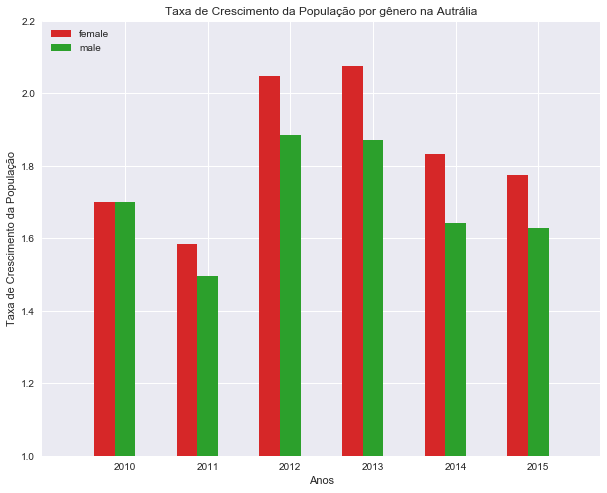

In [252]:
generate_chart_growth_population_gen(gau, "Taxa de Crescimento da População", "Anos", "Taxa de Crescimento da População por gênero na Autrália",male_female_colors,1,2.2,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



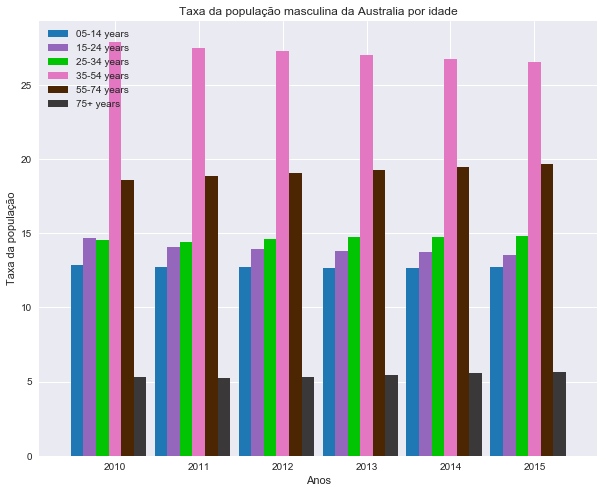

In [119]:
generate_chart_rate_population_age(australia_male, "Taxa da população", "Anos", "Taxa da população masculina da Australia por idade", "totalPopulationMale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



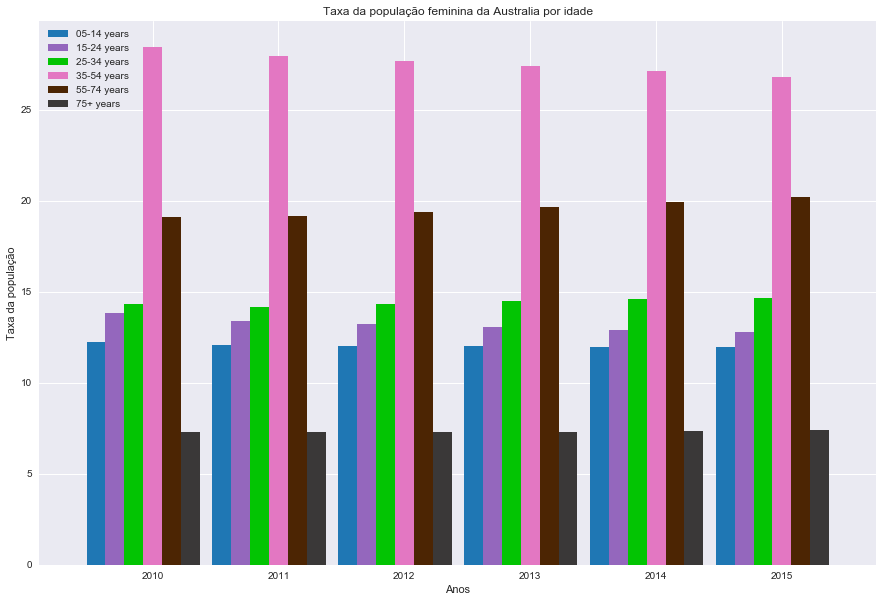

In [120]:
generate_chart_rate_population_age(australia_female, "Taxa da população", "Anos", "Taxa da população feminina da Australia por idade", "totalPopulationFemale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



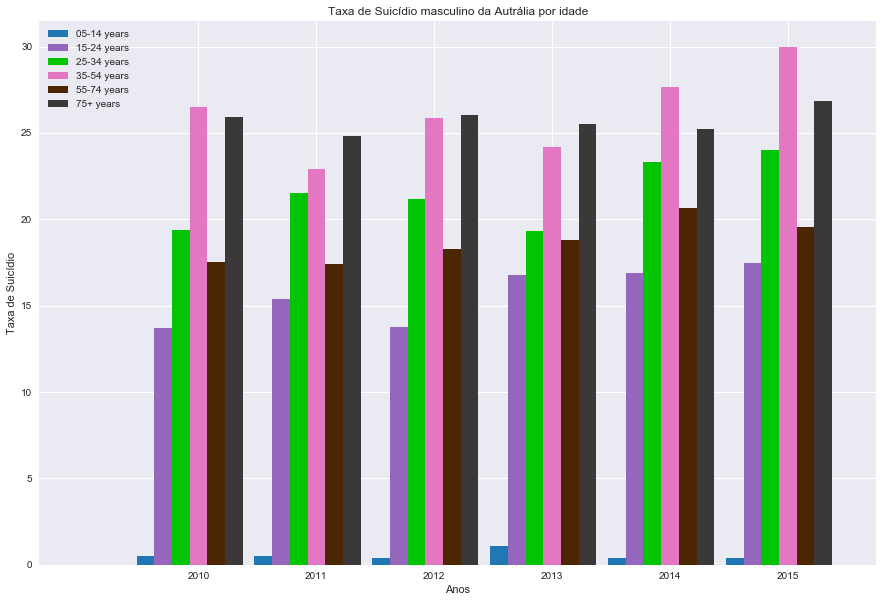

In [121]:
generate_chart_suicide_age(australia_male, "Taxa de Suicídio", "Anos", "Taxa de Suicídio masculino da Autrália por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



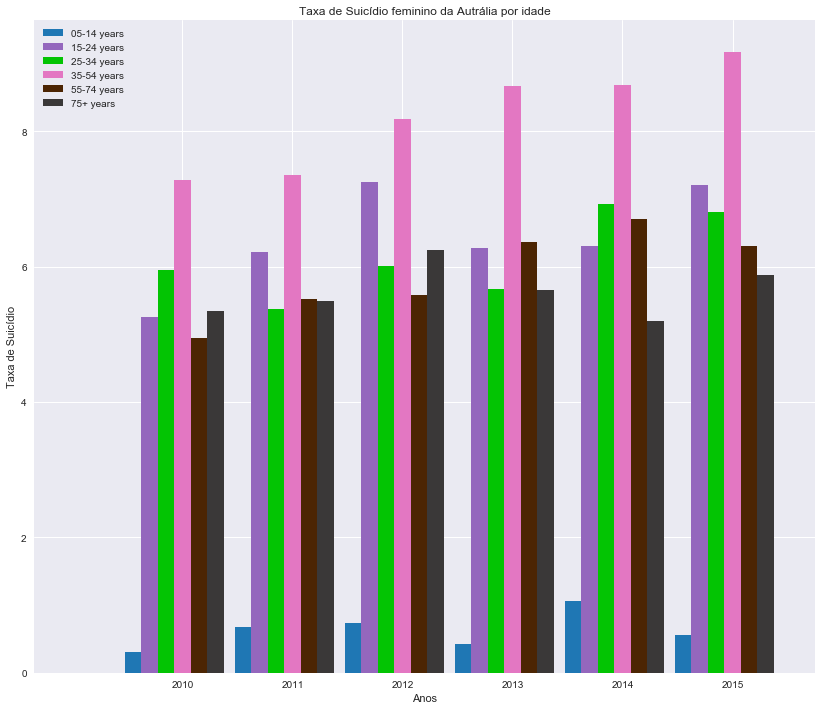

In [122]:
generate_chart_suicide_age(australia_female, "Taxa de Suicídio", "Anos", "Taxa de Suicídio feminino da Autrália por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



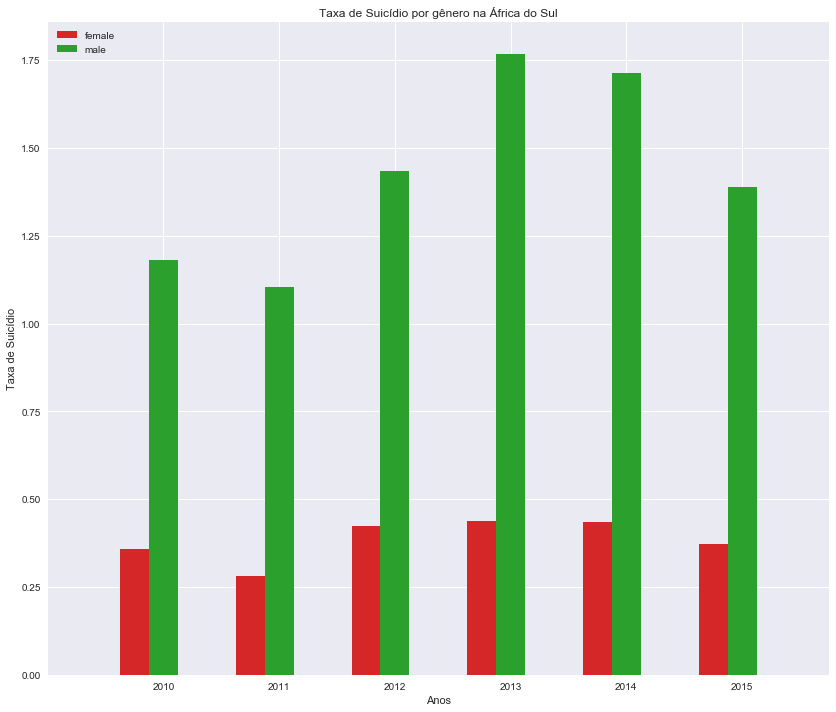

In [123]:
generate_chart_suicide_gen(gsa, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na África do Sul",male_female_colors, 0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



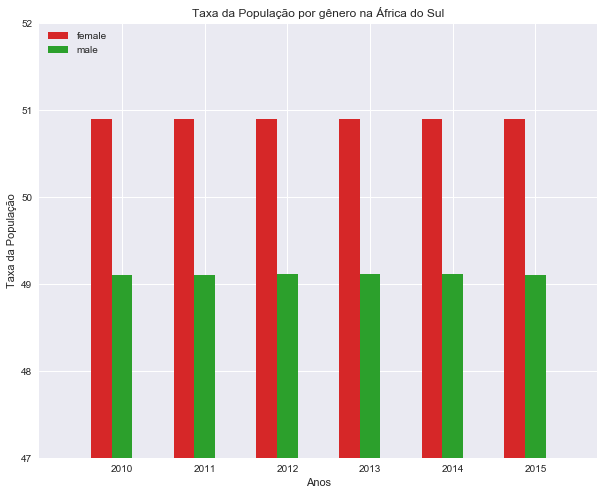

In [124]:
generate_chart_rate_population_gen(gsa, "Taxa da População", "Anos", "Taxa da População por gênero na África do Sul",male_female_colors,47,52,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



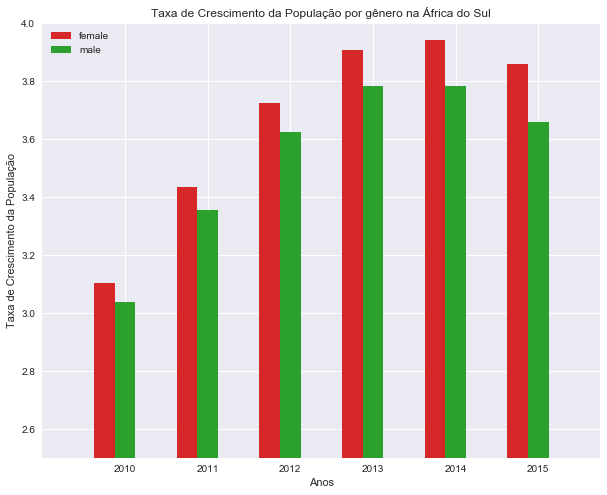

In [257]:
generate_chart_growth_population_gen(gsa, "Taxa de Crescimento da População", "Anos", "Taxa de Crescimento da População por gênero na África do Sul",male_female_colors,2.5,4,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



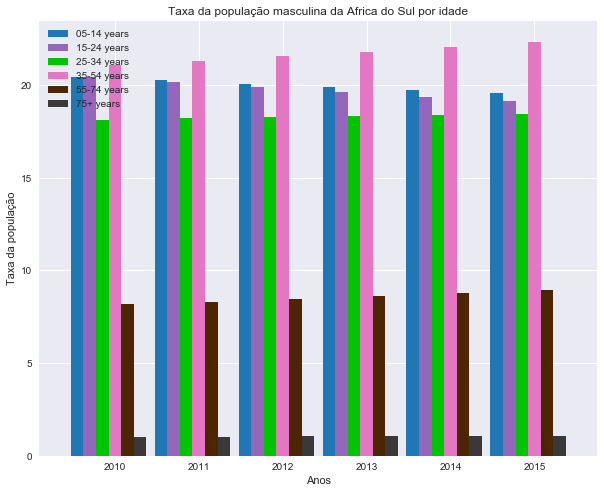

In [125]:
generate_chart_rate_population_age(southAfrica_male, "Taxa da população", "Anos", "Taxa da população masculina da Africa do Sul por idade", "totalPopulationMale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



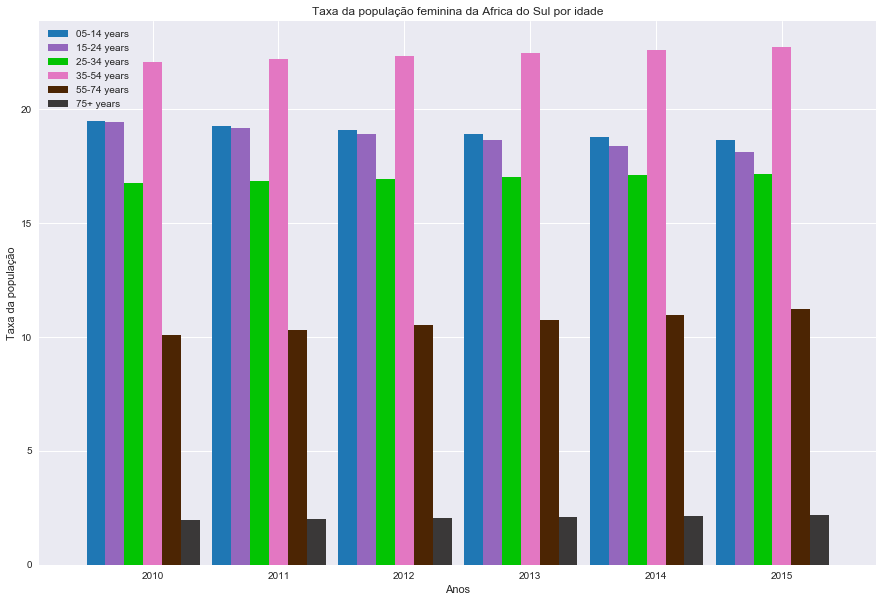

In [126]:
generate_chart_rate_population_age(southAfrica_female, "Taxa da população", "Anos", "Taxa da população feminina da Africa do Sul por idade", "totalPopulationFemale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



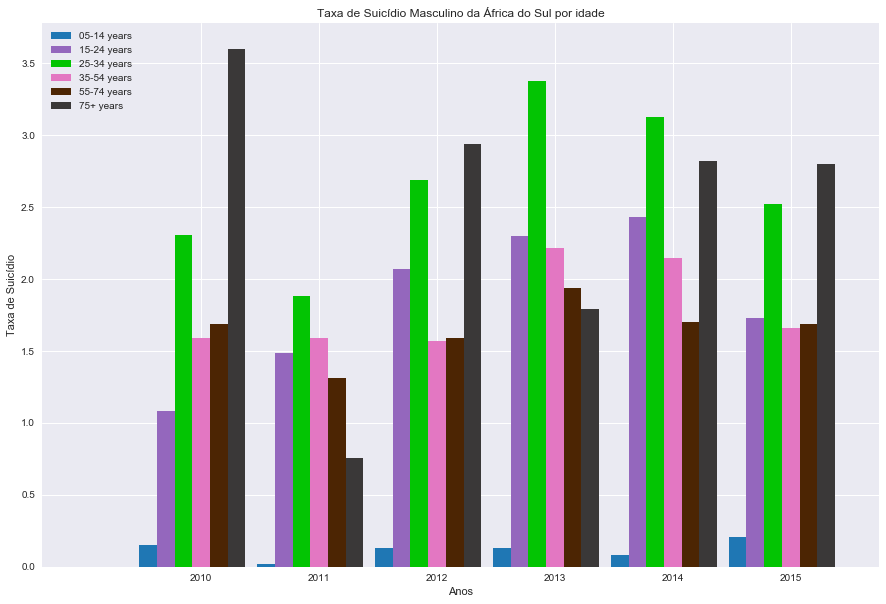

In [127]:
generate_chart_suicide_age(southAfrica_male, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Masculino da África do Sul por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



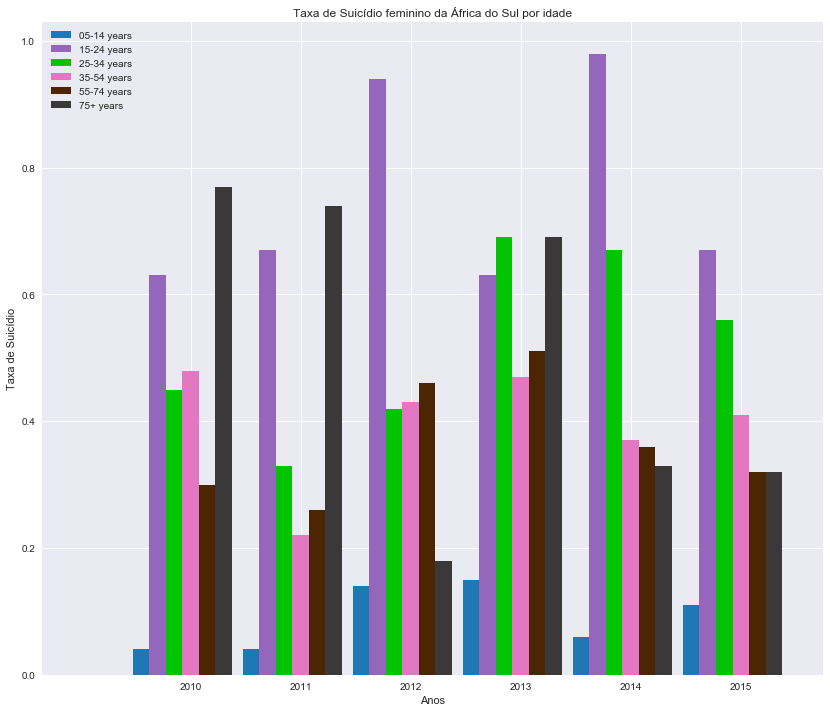

In [128]:
generate_chart_suicide_age(southAfrica_female, "Taxa de Suicídio", "Anos", "Taxa de Suicídio feminino da África do Sul por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



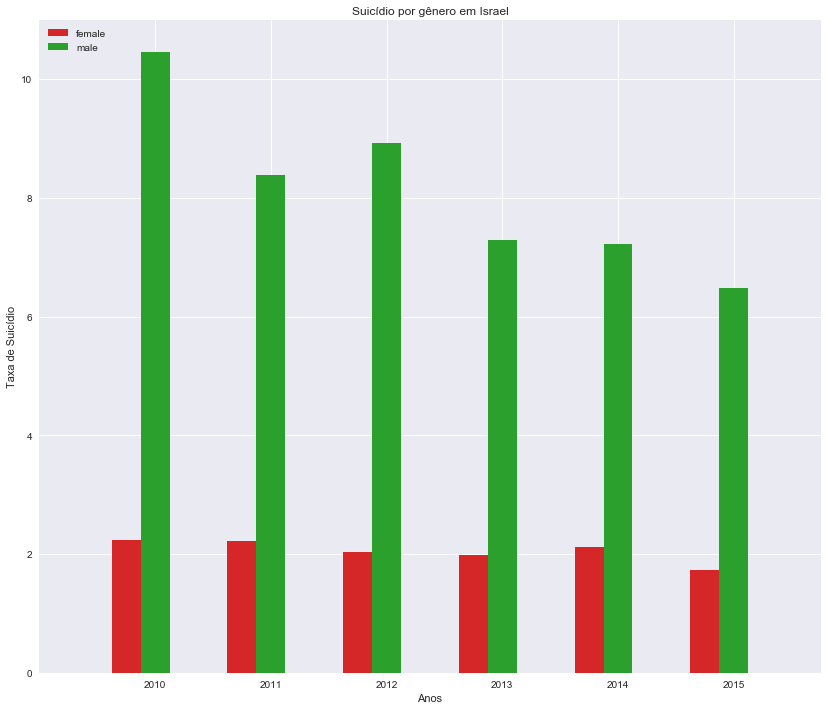

In [129]:
generate_chart_suicide_gen(gis, "Taxa de Suicídio", "Anos", "Suicídio por gênero em Israel",male_female_colors, 0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



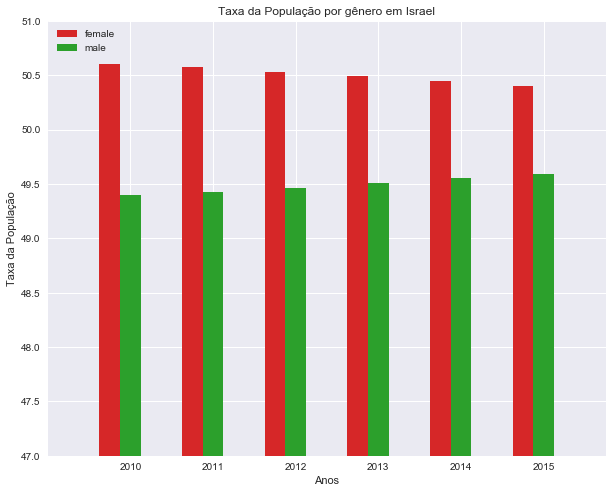

In [130]:
generate_chart_rate_population_gen(gis, "Taxa da População", "Anos", "Taxa da População por gênero em Israel",male_female_colors,47,51,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



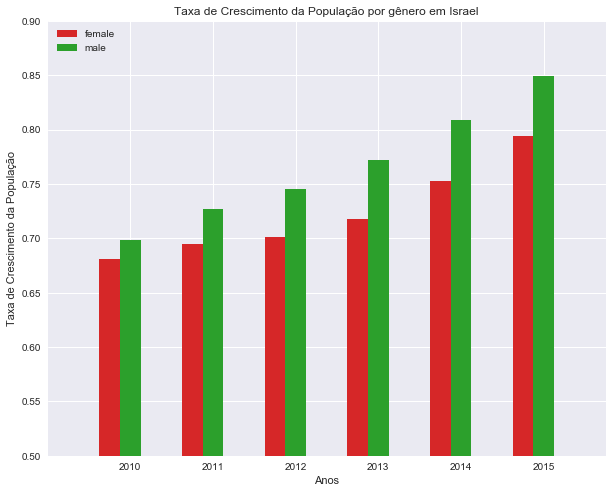

In [263]:
generate_chart_growth_population_gen(gis, "Taxa de Crescimento da População", "Anos", "Taxa de Crescimento da População por gênero em Israel",male_female_colors,0.5,0.9,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



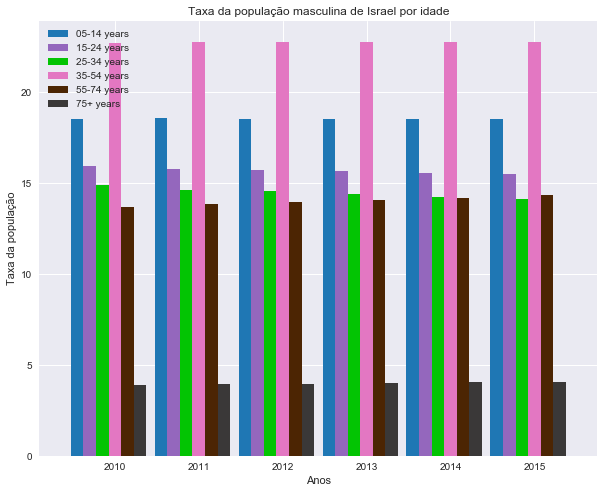

In [131]:
generate_chart_rate_population_age(israel_male, "Taxa da população", "Anos", "Taxa da população masculina de Israel por idade", "totalPopulationMale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



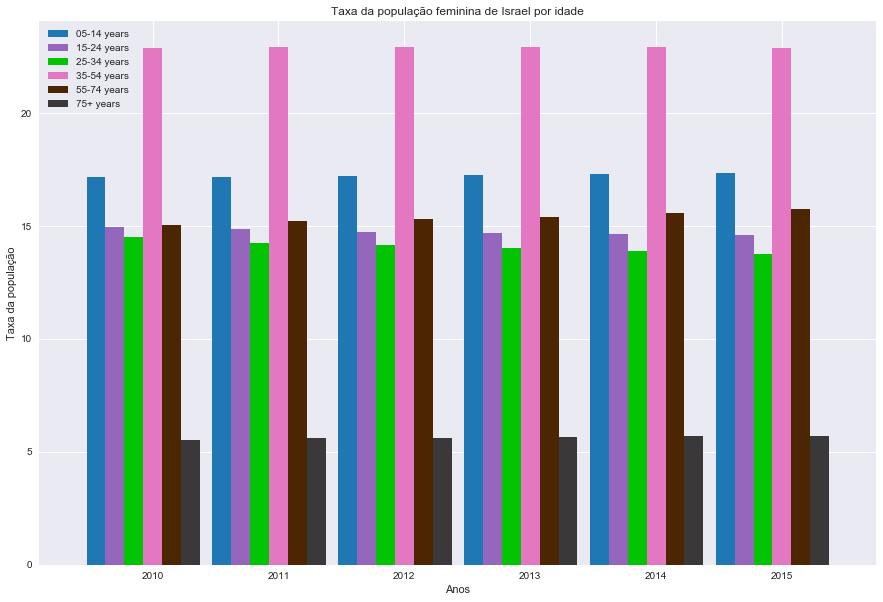

In [132]:
generate_chart_rate_population_age(israel_female, "Taxa da população", "Anos", "Taxa da população feminina de Israel por idade", "totalPopulationFemale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



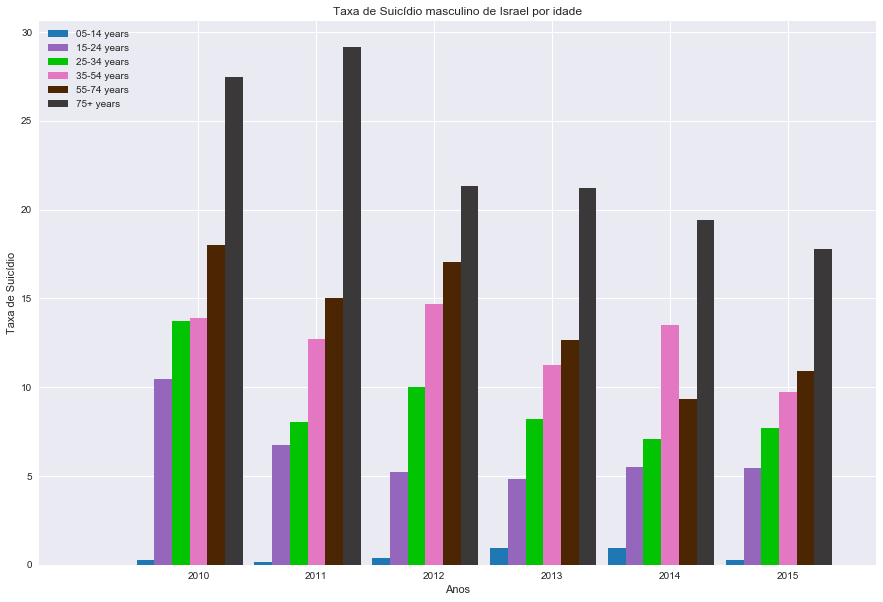

In [133]:
generate_chart_suicide_age(israel_male, "Taxa de Suicídio", "Anos", "Taxa de Suicídio masculino de Israel por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



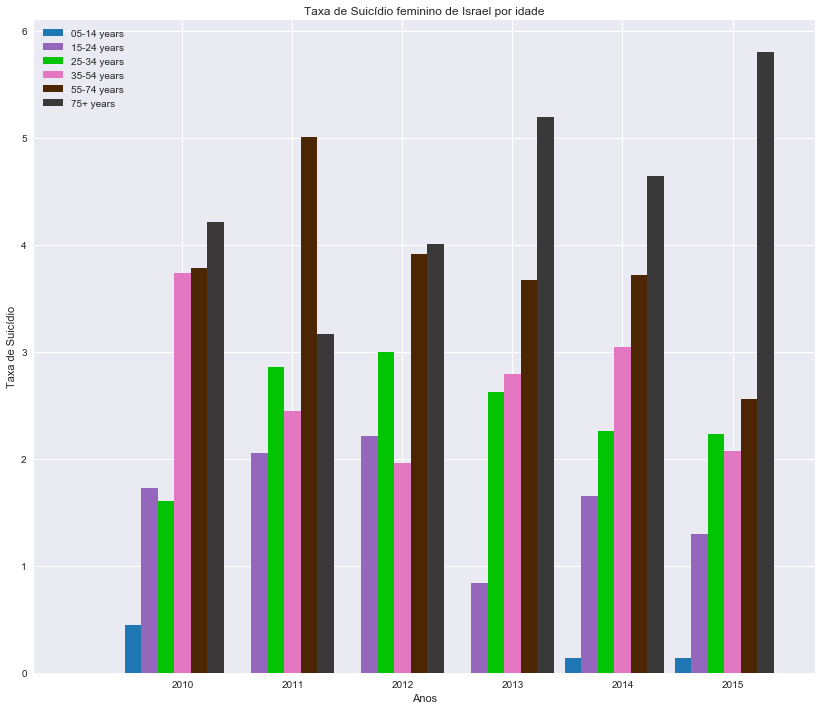

In [134]:
generate_chart_suicide_age(israel_female, "Taxa de Suicídio", "Anos", "Taxa de Suicídio feminino de Israel por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



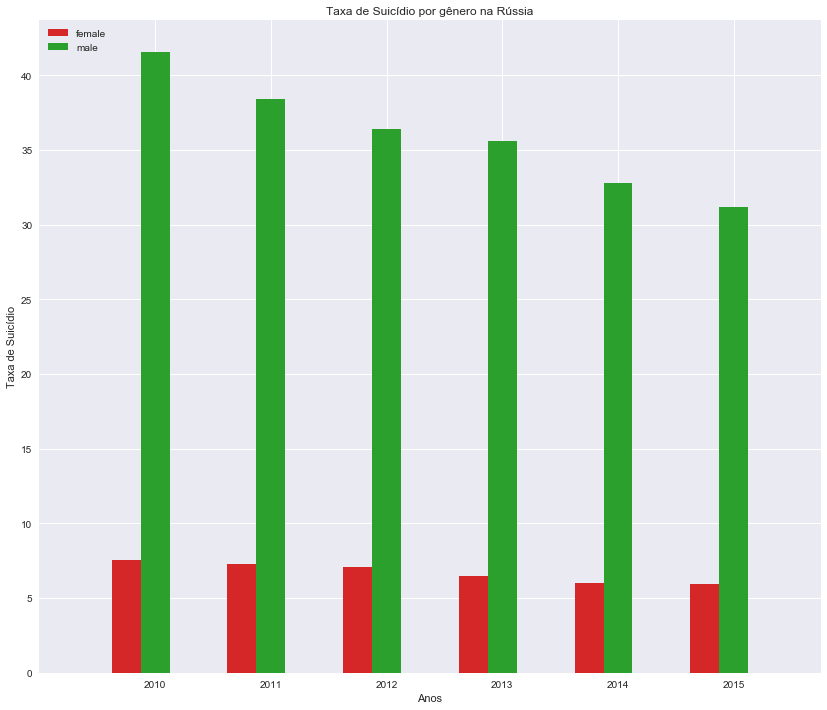

In [135]:
generate_chart_suicide_gen(gru, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Rússia",male_female_colors, 0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



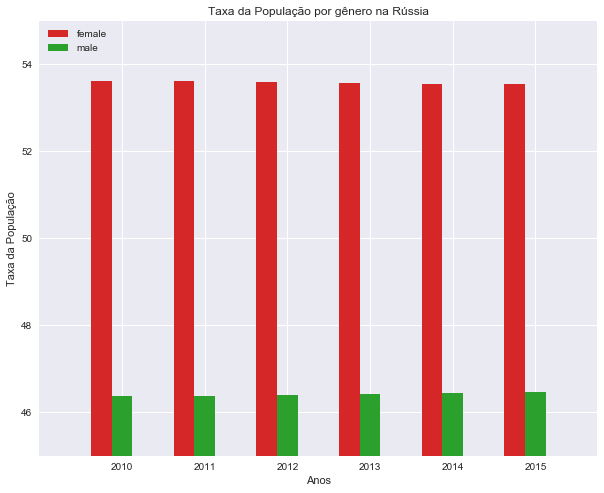

In [136]:
generate_chart_rate_population_gen(gru, "Taxa da População", "Anos", "Taxa da População por gênero na Rússia",male_female_colors,45,55,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



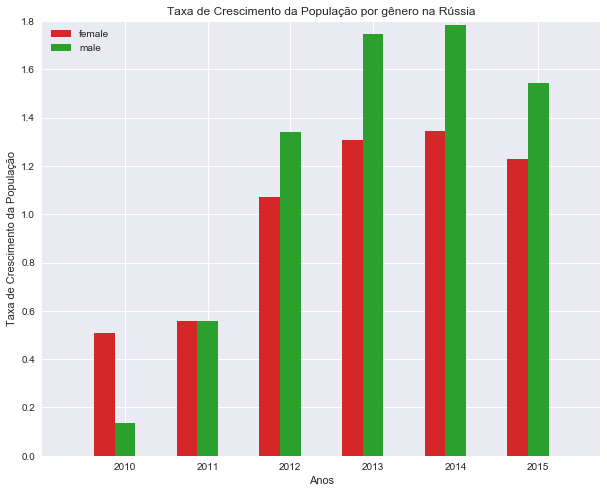

In [267]:
generate_chart_growth_population_gen(gru, "Taxa de Crescimento da População", "Anos", "Taxa de Crescimento da População por gênero na Rússia",male_female_colors,0,1.8,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



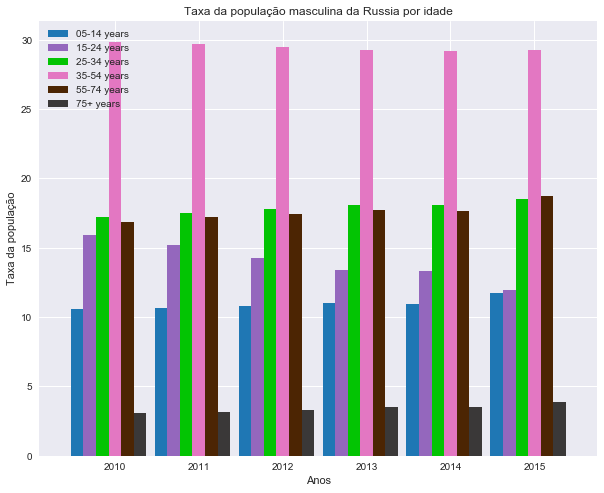

In [137]:
generate_chart_rate_population_age(russia_male, "Taxa da população", "Anos", "Taxa da população masculina da Russia por idade", "totalPopulationMale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



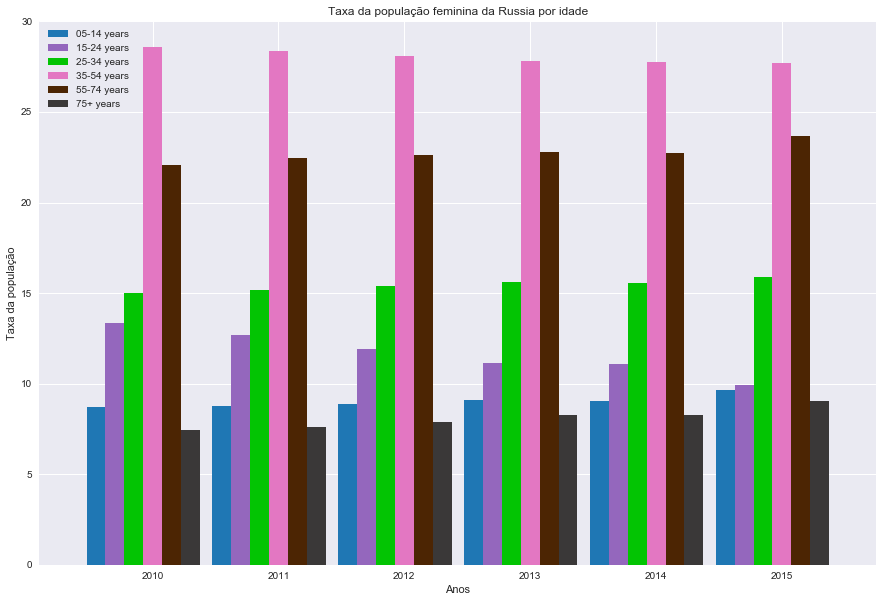

In [138]:
generate_chart_rate_population_age(russia_female, "Taxa da população", "Anos", "Taxa da população feminina da Russia por idade", "totalPopulationFemale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



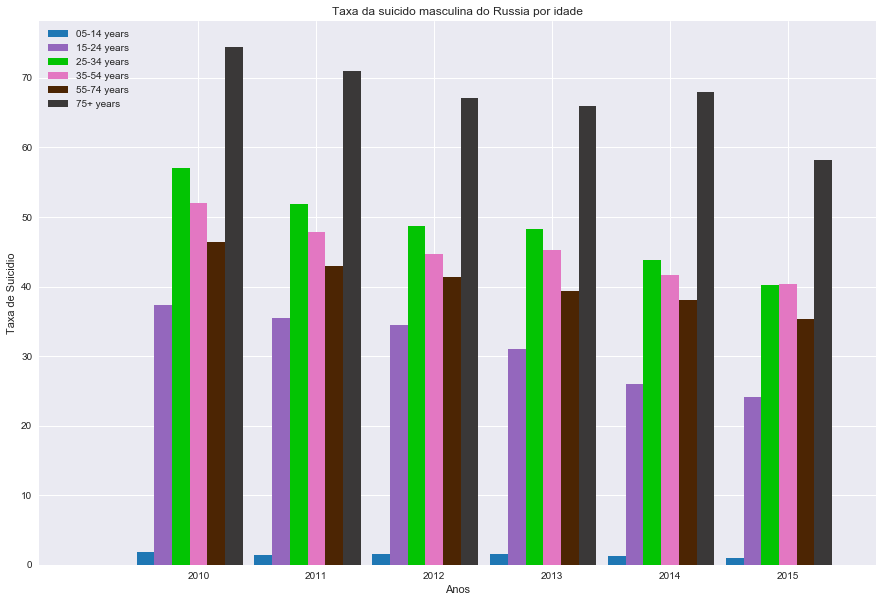

In [139]:
generate_chart_suicide_age(russia_male, "Taxa de Suicidio", "Anos", "Taxa da suicido masculina do Russia por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



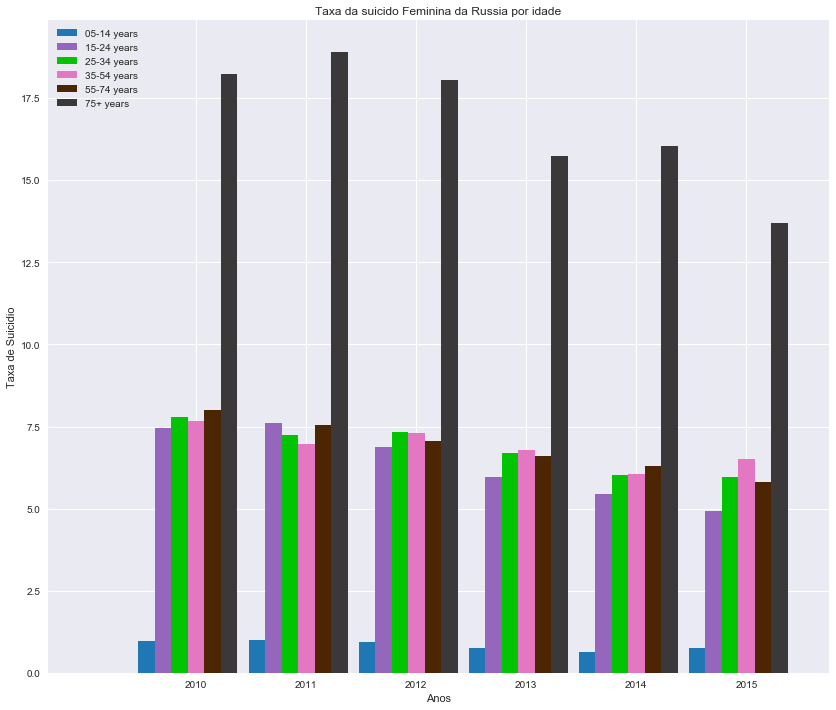

In [140]:
generate_chart_suicide_age(russia_female, "Taxa de Suicidio", "Anos", "Taxa da suicido Feminina da Russia por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



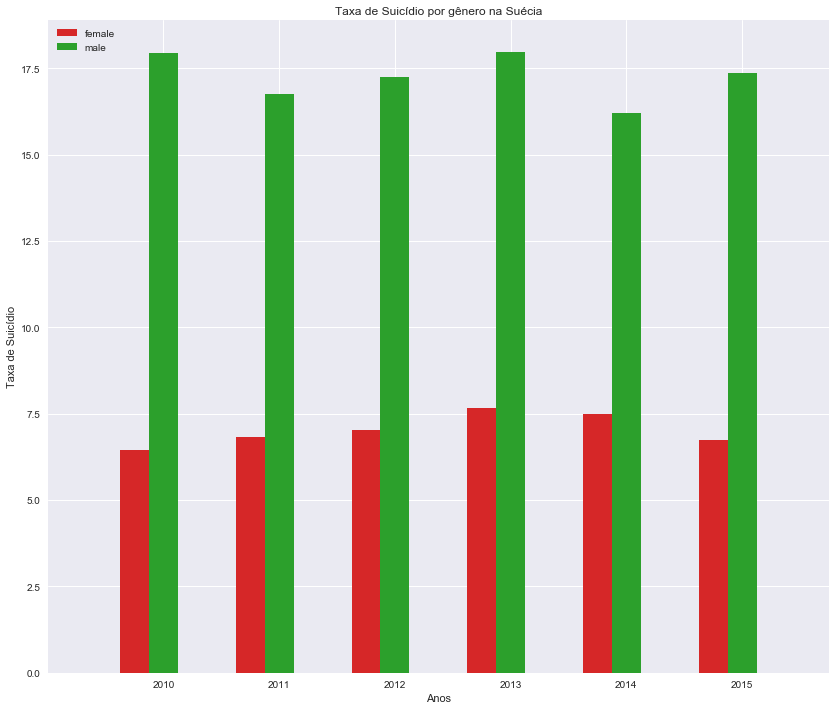

In [141]:
generate_chart_suicide_gen(gsw, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Suécia",male_female_colors, 0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



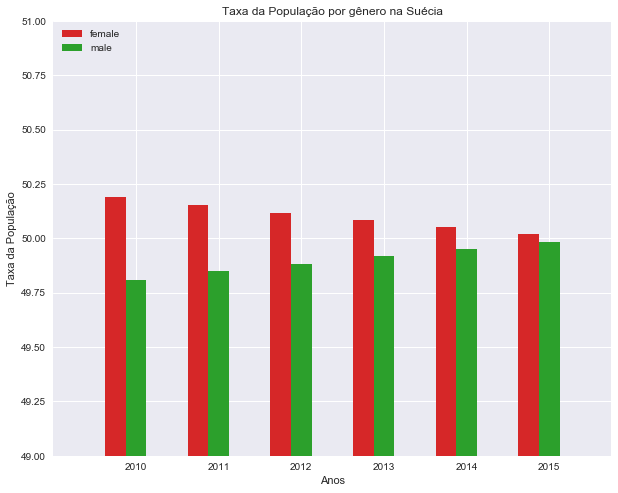

In [142]:
generate_chart_rate_population_gen(gsw, "Taxa da População", "Anos", "Taxa da População por gênero na Suécia",male_female_colors,49,51,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



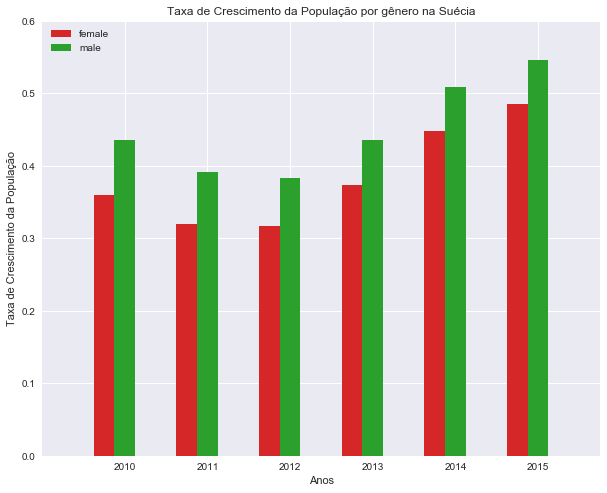

In [269]:
generate_chart_growth_population_gen(gsw, "Taxa de Crescimento da População", "Anos", "Taxa de Crescimento da População por gênero na Suécia",male_female_colors,0,0.6,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



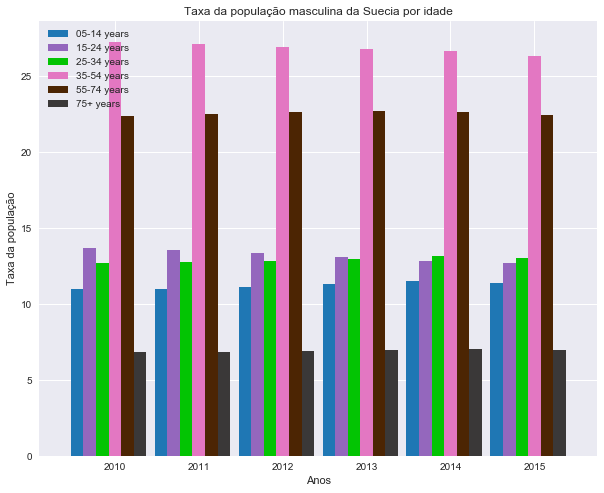

In [143]:
generate_chart_rate_population_age(sweden_male, "Taxa da população", "Anos", "Taxa da população masculina da Suecia por idade", "totalPopulationMale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



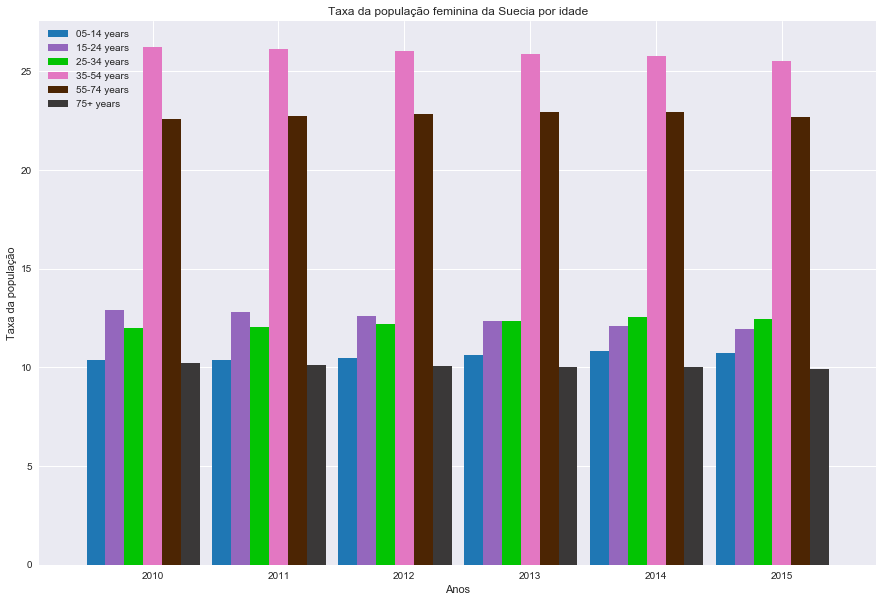

In [144]:
generate_chart_rate_population_age(sweden_female, "Taxa da população", "Anos", "Taxa da população feminina da Suecia por idade", "totalPopulationFemale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



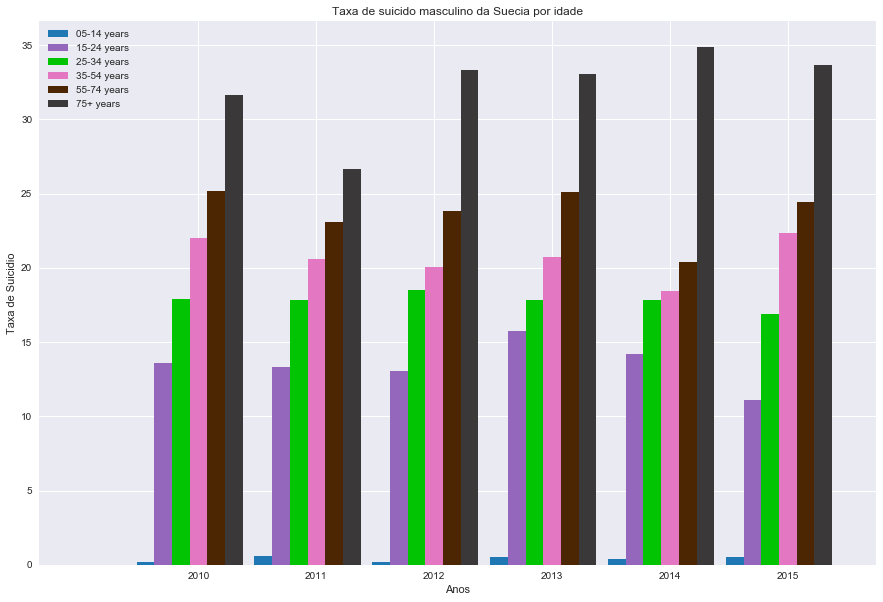

In [145]:
generate_chart_suicide_age(sweden_male, "Taxa de Suicidio", "Anos", "Taxa de suicido masculino da Suecia por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



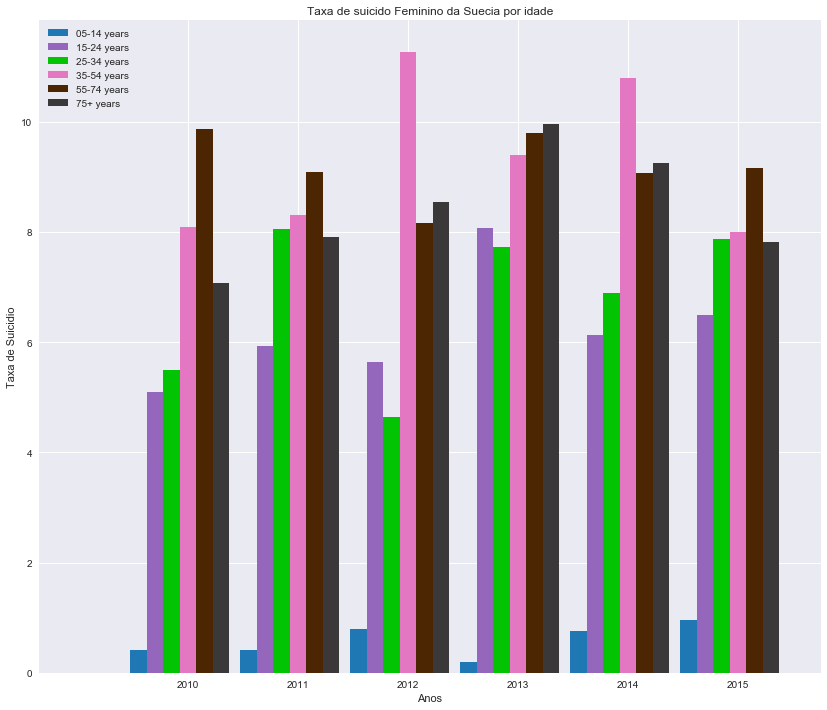

In [146]:
generate_chart_suicide_age(sweden_female, "Taxa de Suicidio", "Anos", "Taxa de suicido Feminino da Suecia por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



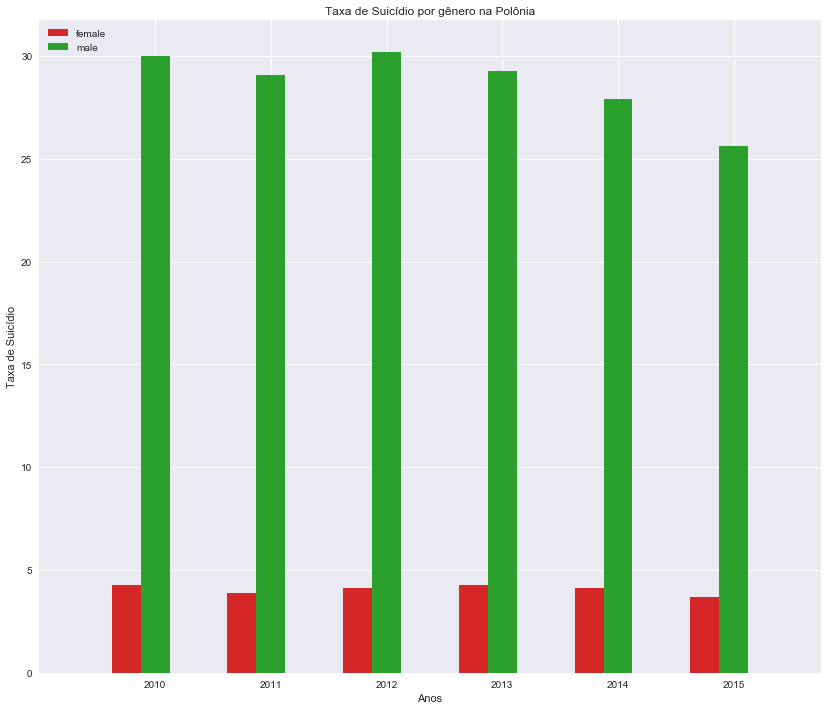

In [147]:
generate_chart_suicide_gen(gpo, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Polônia",male_female_colors, 0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



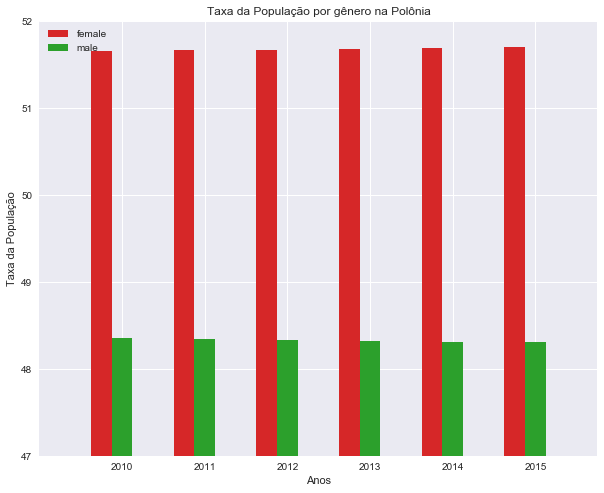

In [148]:
generate_chart_rate_population_gen(gpo, "Taxa da População", "Anos", "Taxa da População por gênero na Polônia",male_female_colors,47,52,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



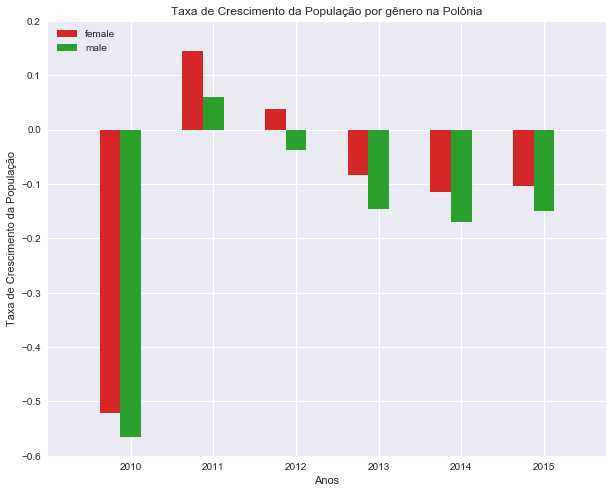

In [272]:
generate_chart_growth_population_gen(gpo, "Taxa de Crescimento da População", "Anos", "Taxa de Crescimento da População por gênero na Polônia",male_female_colors,-0.6,0.2,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



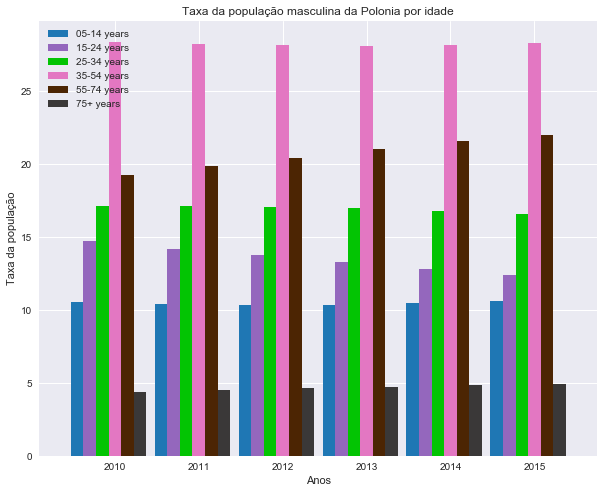

In [149]:
generate_chart_rate_population_age(poland_male, "Taxa da população", "Anos", "Taxa da população masculina da Polonia por idade", "totalPopulationMale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



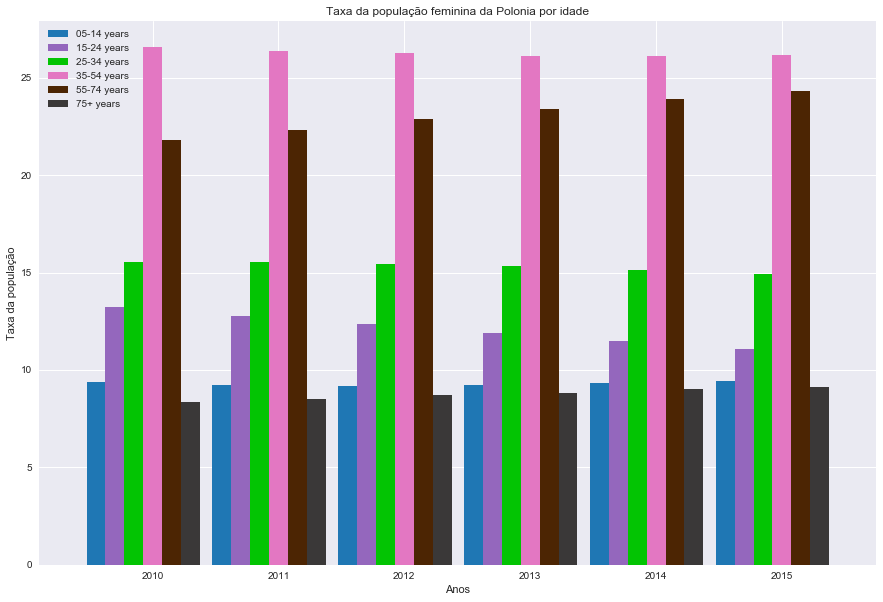

In [150]:
generate_chart_rate_population_age(poland_female, "Taxa da população", "Anos", "Taxa da população feminina da Polonia por idade", "totalPopulationFemale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



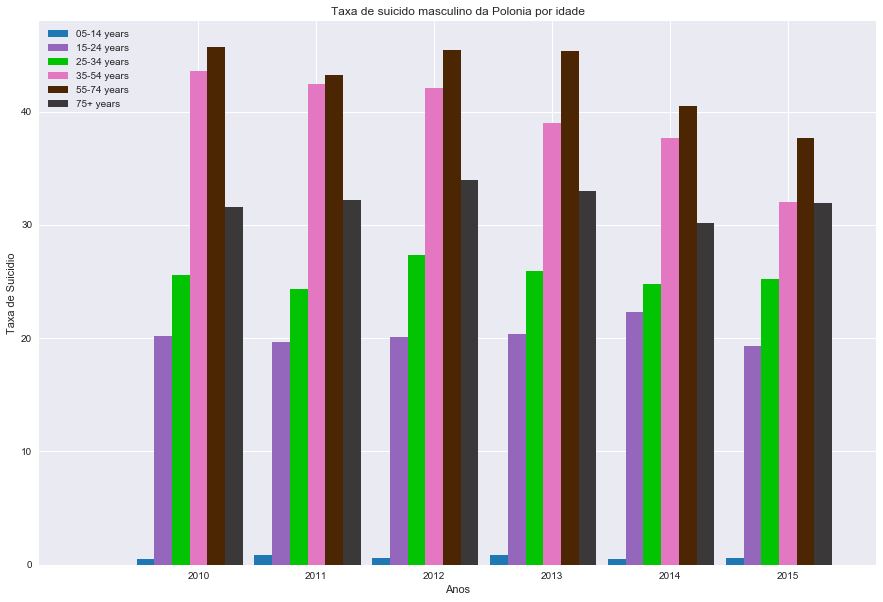

In [151]:
generate_chart_suicide_age(poland_male, "Taxa de Suicidio", "Anos", "Taxa de suicido masculino da Polonia por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



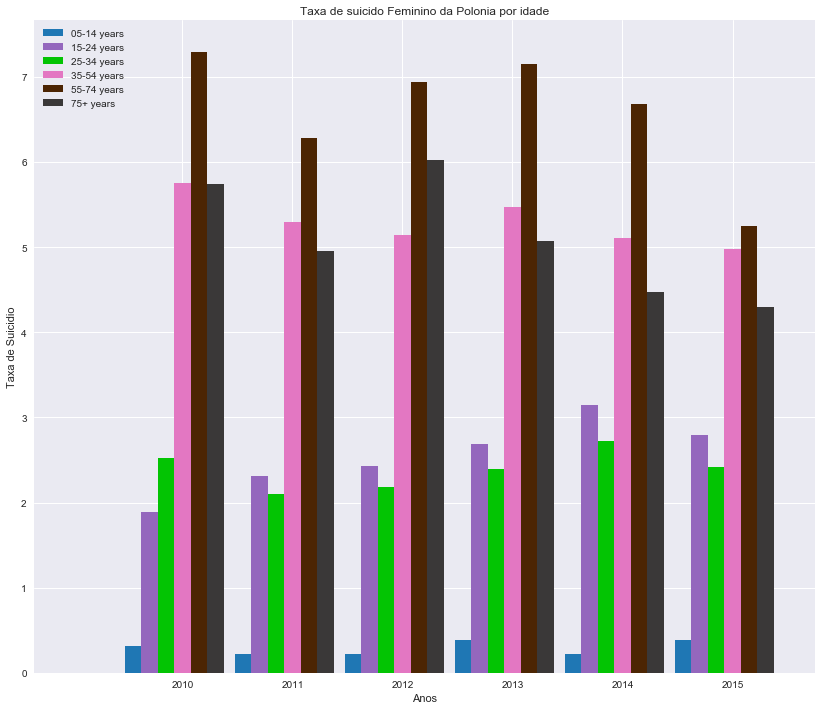

In [152]:
generate_chart_suicide_age(poland_female, "Taxa de Suicidio", "Anos", "Taxa de suicido Feminino da Polonia por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



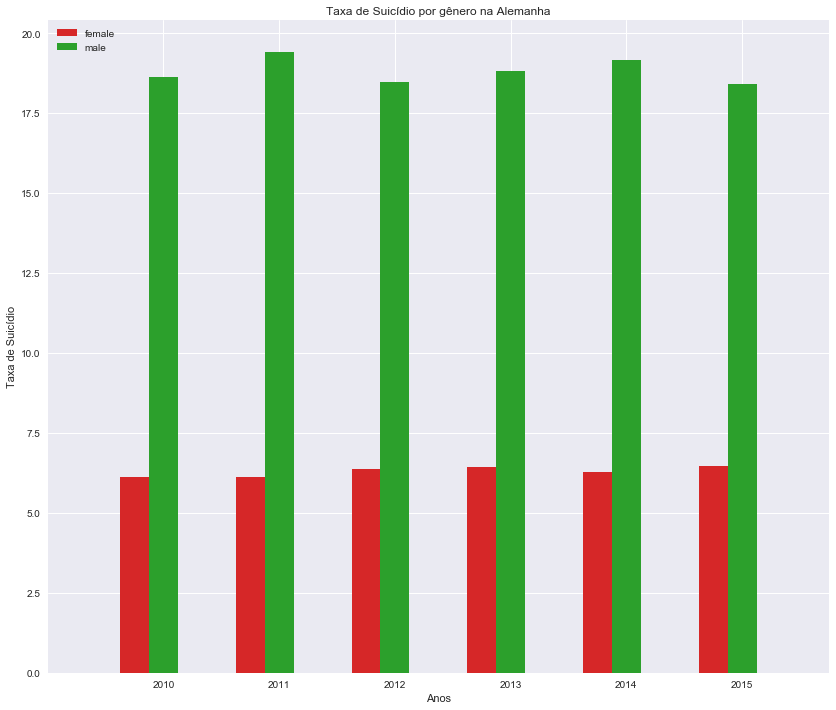

In [153]:
generate_chart_suicide_gen(gge, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Alemanha",male_female_colors, 0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



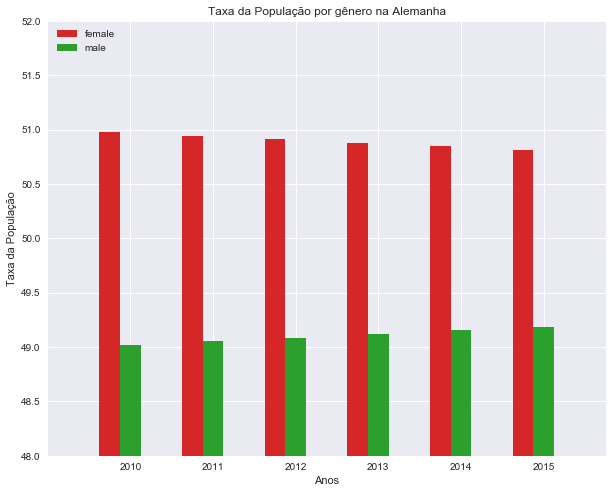

In [154]:
generate_chart_rate_population_gen(gge, "Taxa da População", "Anos", "Taxa da População por gênero na Alemanha",male_female_colors,48,52,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



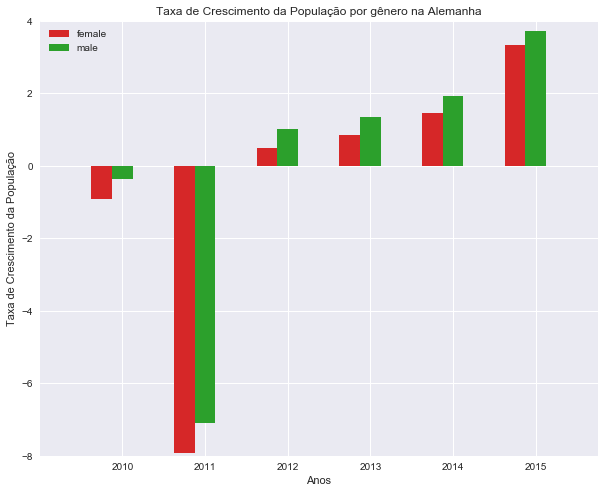

In [280]:
generate_chart_growth_population_gen(gge, "Taxa de Crescimento da População", "Anos", "Taxa de Crescimento da População por gênero na Alemanha",male_female_colors,-8,4,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



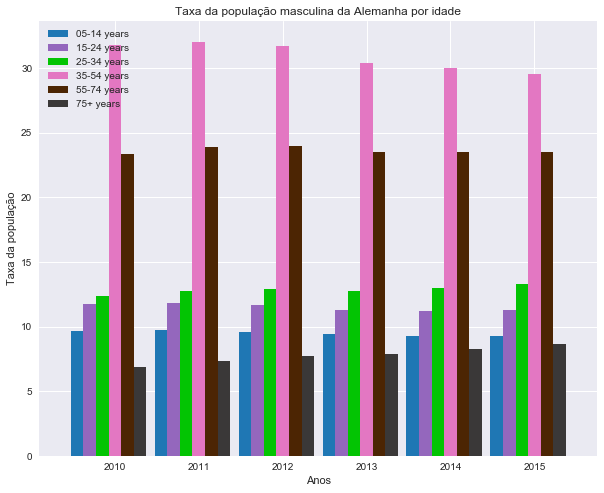

In [155]:
generate_chart_rate_population_age(germany_male, "Taxa da população", "Anos", "Taxa da população masculina da Alemanha por idade", "totalPopulationMale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



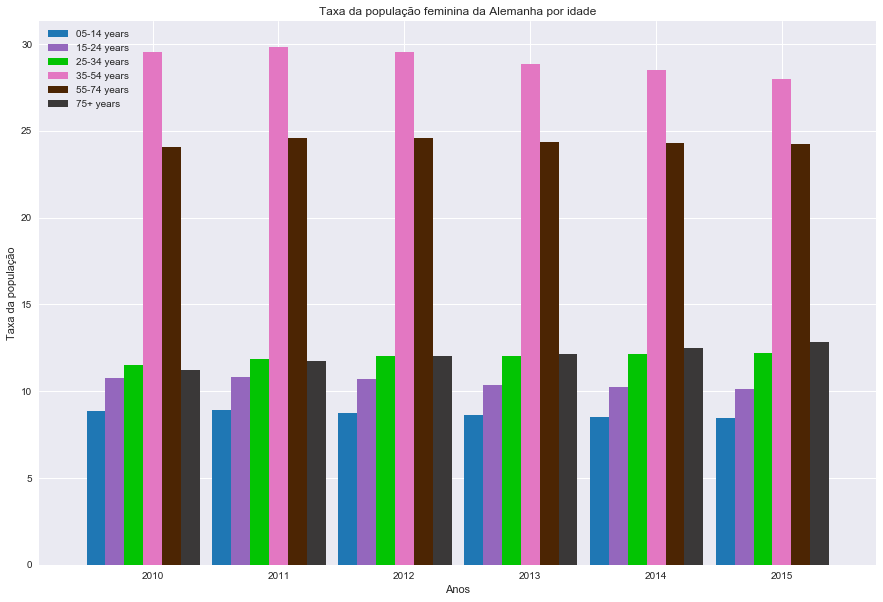

In [156]:
generate_chart_rate_population_age(germany_female, "Taxa da população", "Anos", "Taxa da população feminina da Alemanha por idade", "totalPopulationFemale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



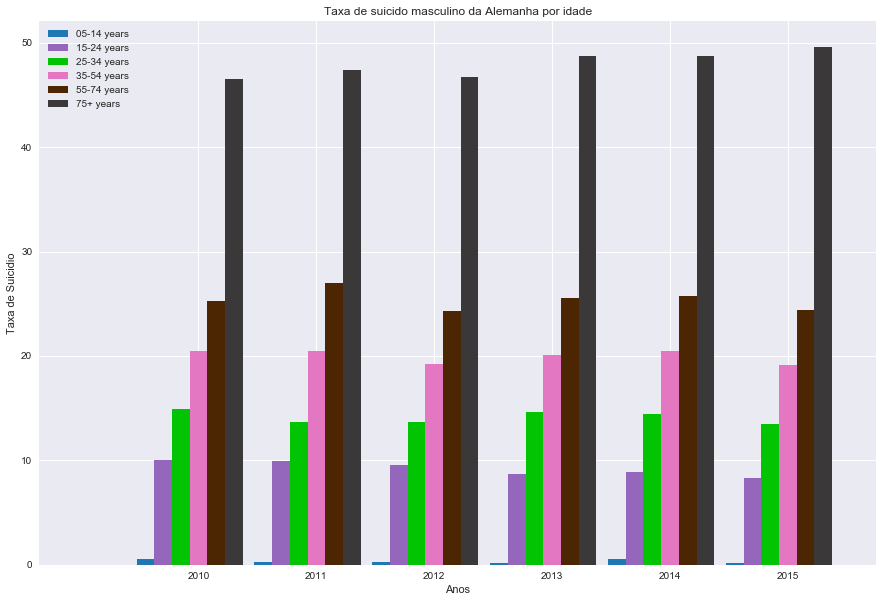

In [157]:
generate_chart_suicide_age(germany_male, "Taxa de Suicidio", "Anos", "Taxa de suicido masculino da Alemanha por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



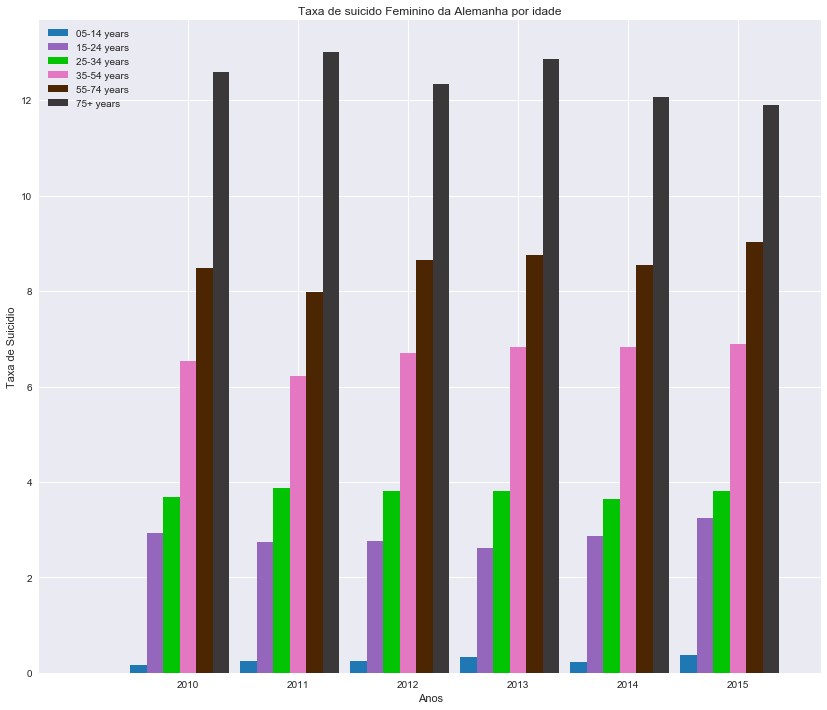

In [158]:
generate_chart_suicide_age(germany_female, "Taxa de Suicidio", "Anos", "Taxa de suicido Feminino da Alemanha por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



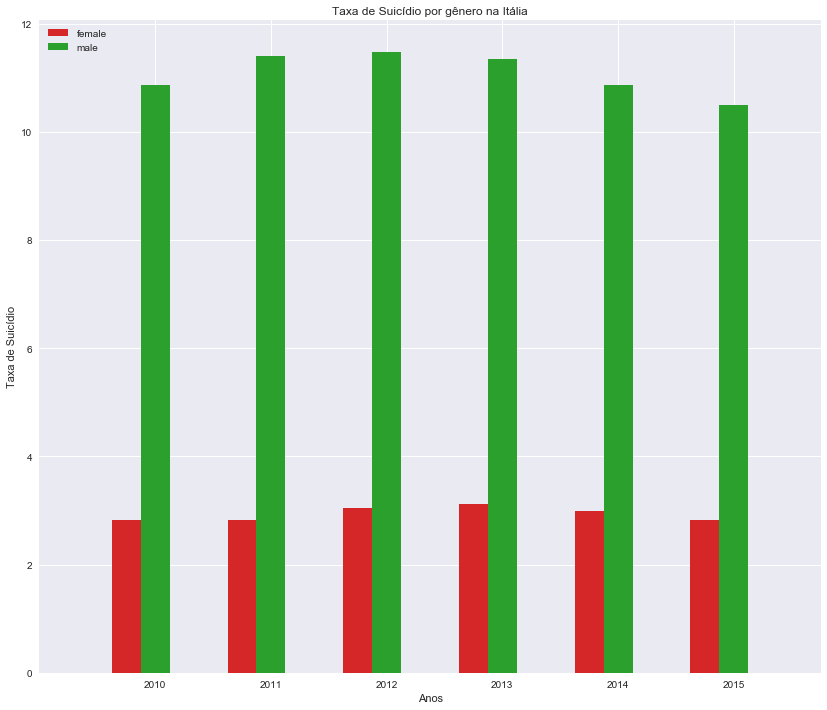

In [159]:
generate_chart_suicide_gen(git, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Itália",male_female_colors, 0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



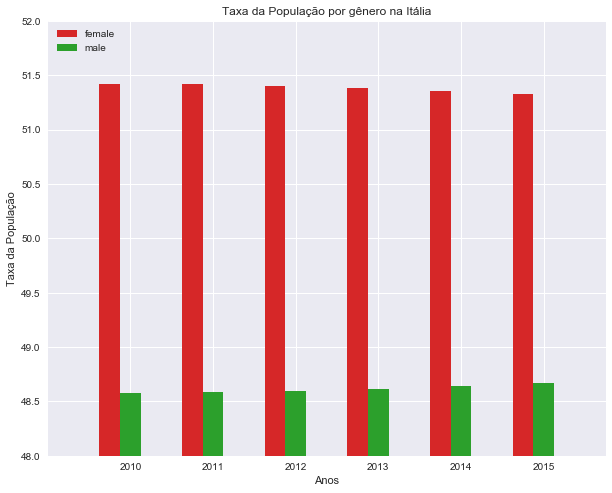

In [160]:
generate_chart_rate_population_gen(git, "Taxa da População", "Anos", "Taxa da População por gênero na Itália",male_female_colors,48,52,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



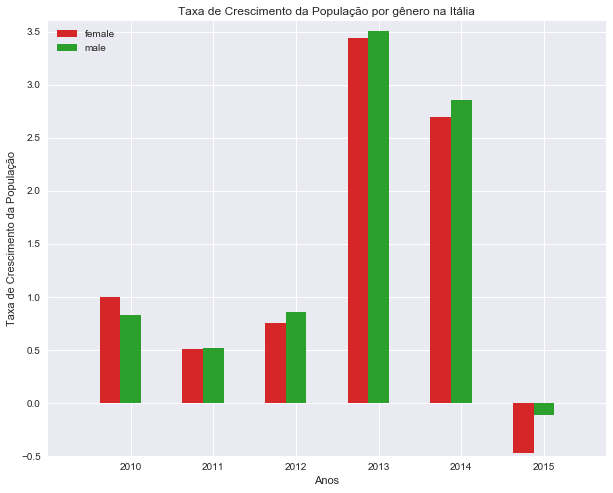

In [283]:
generate_chart_growth_population_gen(git, "Taxa de Crescimento da População", "Anos", "Taxa de Crescimento da População por gênero na Itália",male_female_colors,-0.5,3.6,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



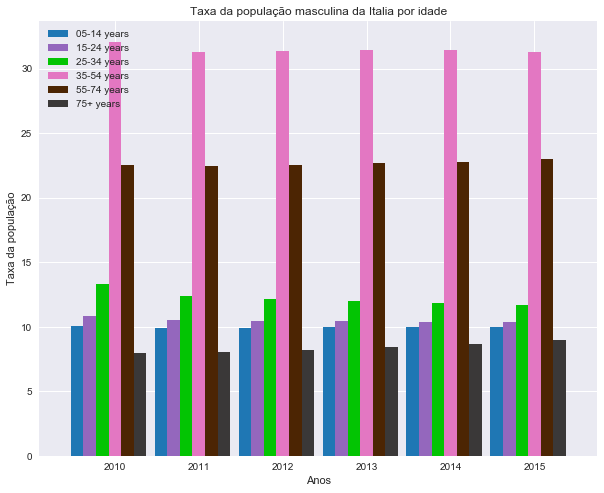

In [161]:
generate_chart_rate_population_age(italy_male, "Taxa da população", "Anos", "Taxa da população masculina da Italia por idade", "totalPopulationMale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



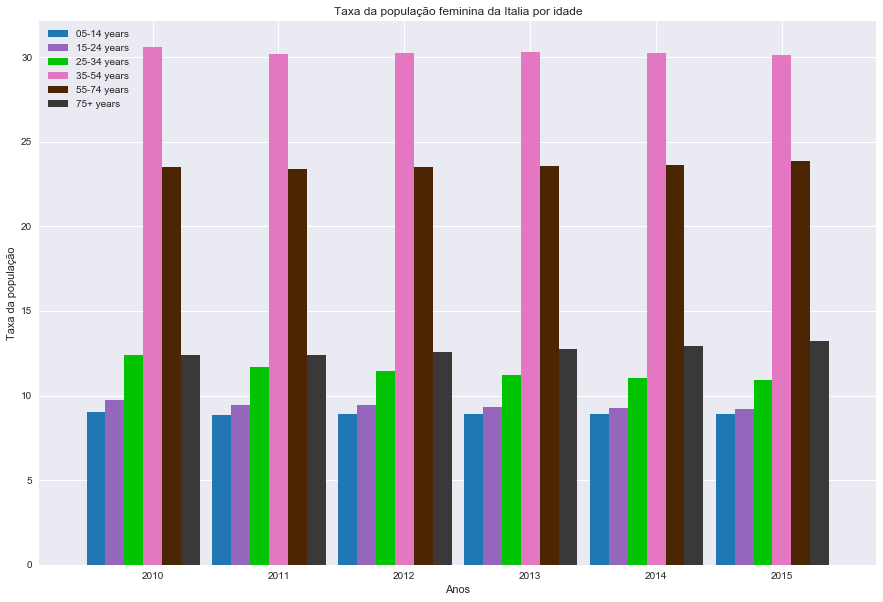

In [162]:
generate_chart_rate_population_age(italy_female, "Taxa da população", "Anos", "Taxa da população feminina da Italia por idade", "totalPopulationFemale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



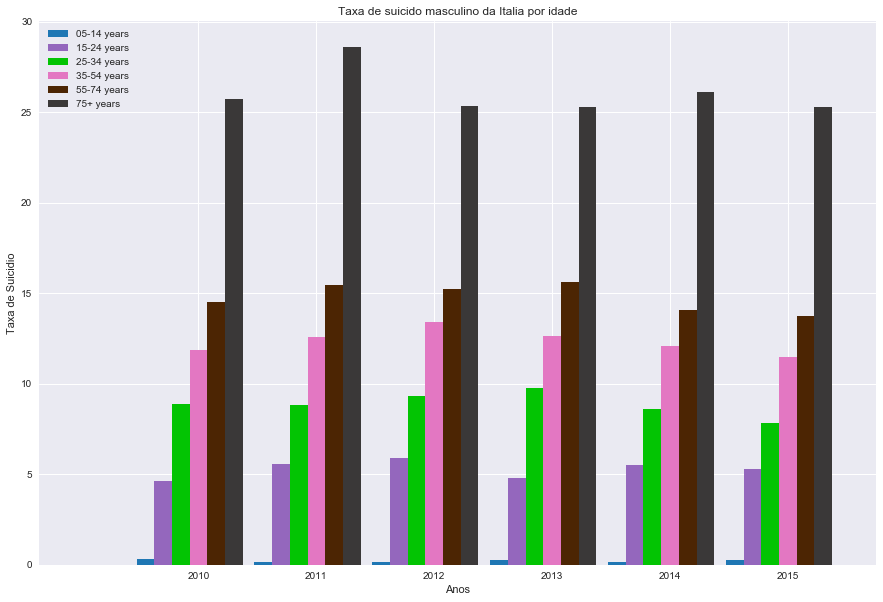

In [163]:
generate_chart_suicide_age(italy_male, "Taxa de Suicidio", "Anos", "Taxa de suicido masculino da Italia por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



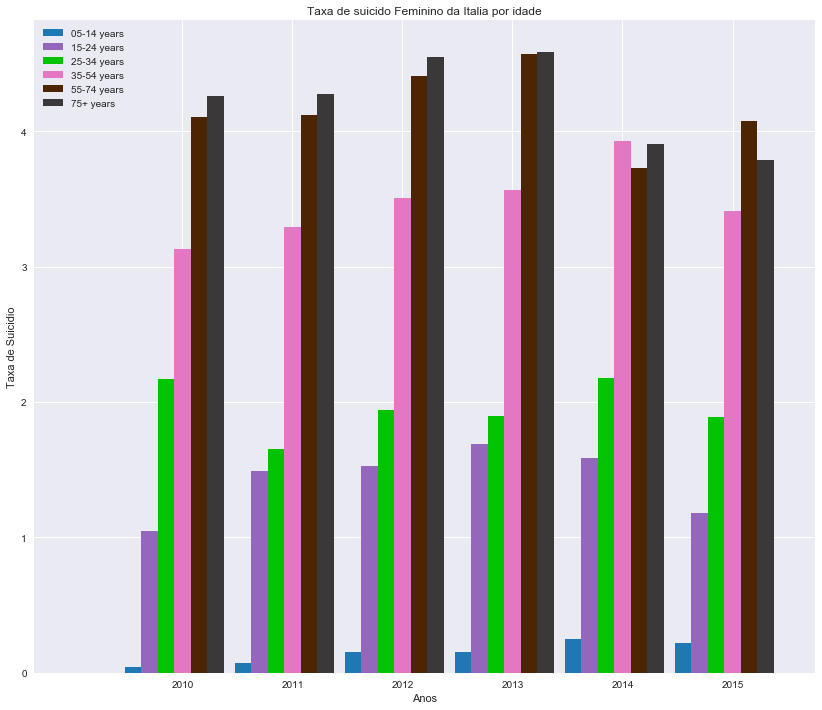

In [164]:
generate_chart_suicide_age(italy_female, "Taxa de Suicidio", "Anos", "Taxa de suicido Feminino da Italia por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



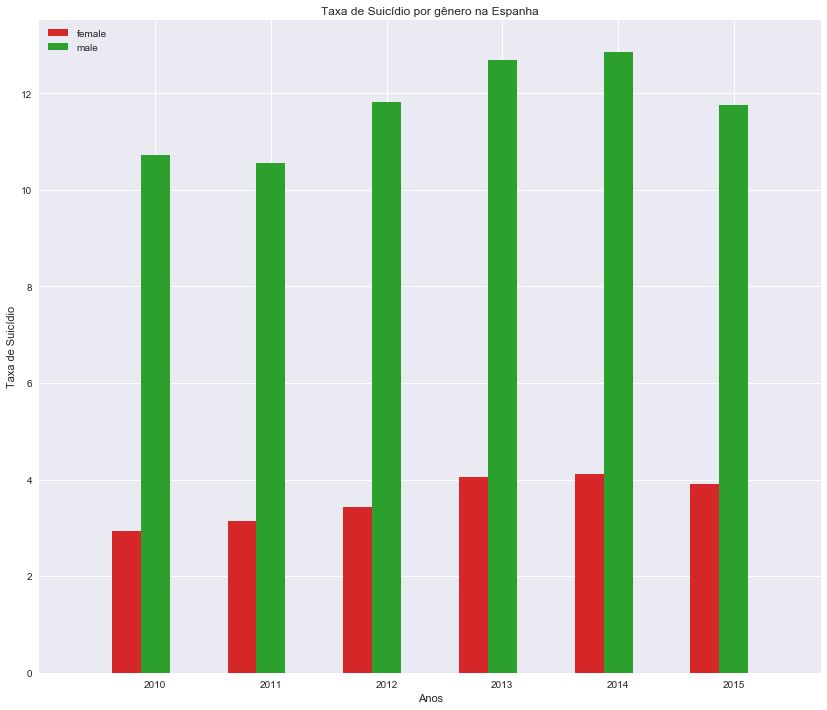

In [165]:
generate_chart_suicide_gen(gsp, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Espanha",male_female_colors, 0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



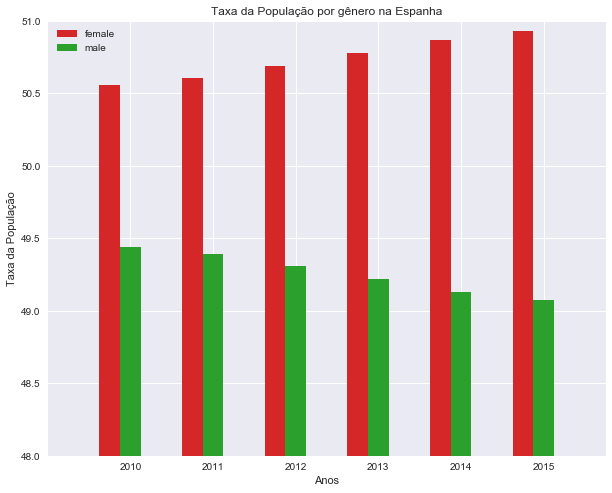

In [166]:
generate_chart_rate_population_gen(gsp, "Taxa da População", "Anos", "Taxa da População por gênero na Espanha",male_female_colors,48,51,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



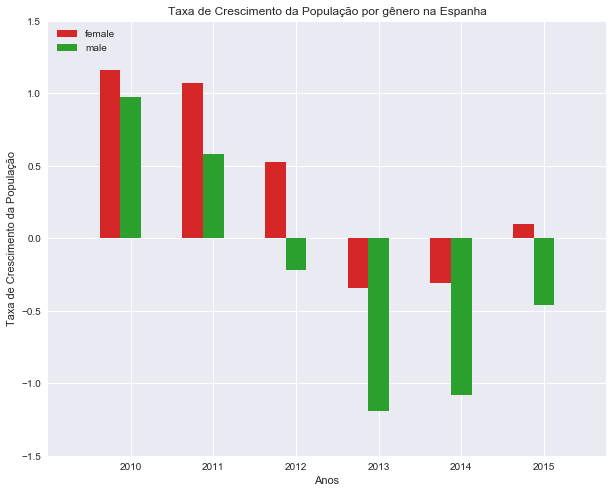

In [288]:
generate_chart_growth_population_gen(gsp, "Taxa de Crescimento da População", "Anos", "Taxa de Crescimento da População por gênero na Espanha",male_female_colors,-1.5,1.5,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



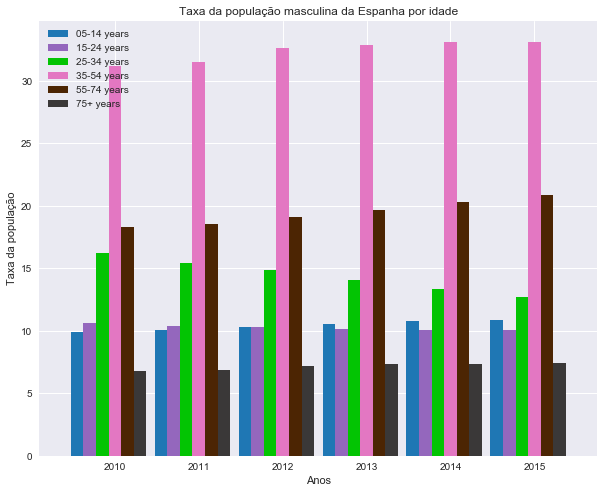

In [167]:
generate_chart_rate_population_age(spain_male, "Taxa da população", "Anos", "Taxa da população masculina da Espanha por idade", "totalPopulationMale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



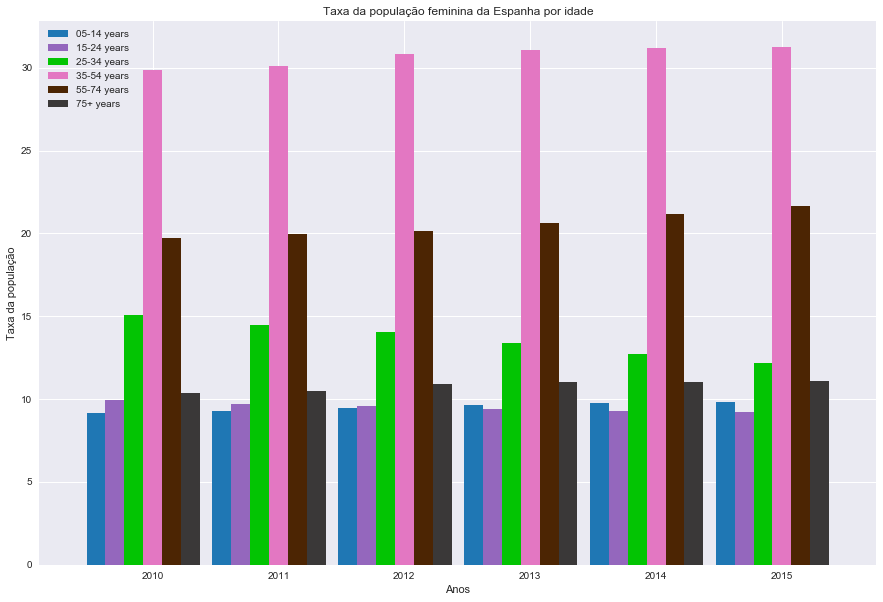

In [168]:
generate_chart_rate_population_age(spain_female, "Taxa da população", "Anos", "Taxa da população feminina da Espanha por idade", "totalPopulationFemale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



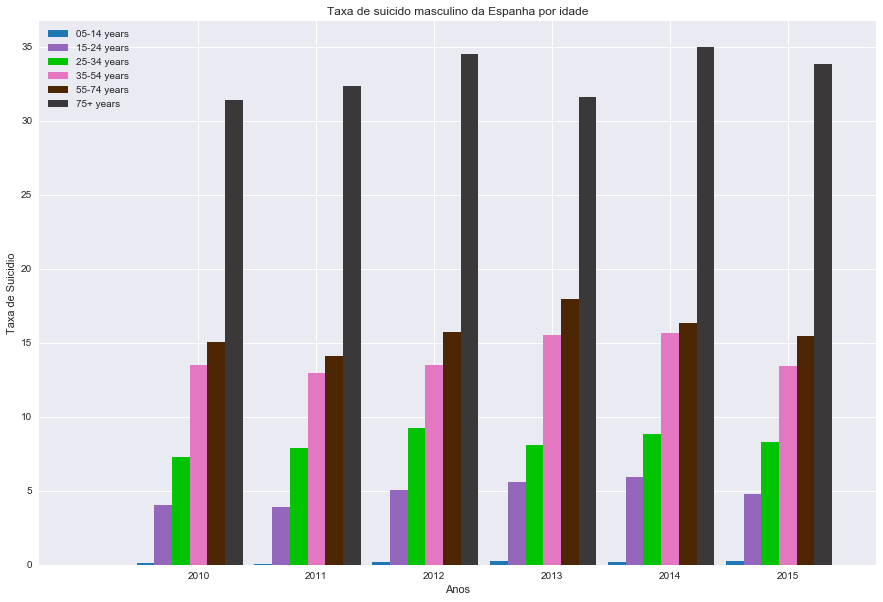

In [169]:
generate_chart_suicide_age(spain_male, "Taxa de Suicidio", "Anos", "Taxa de suicido masculino da Espanha por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



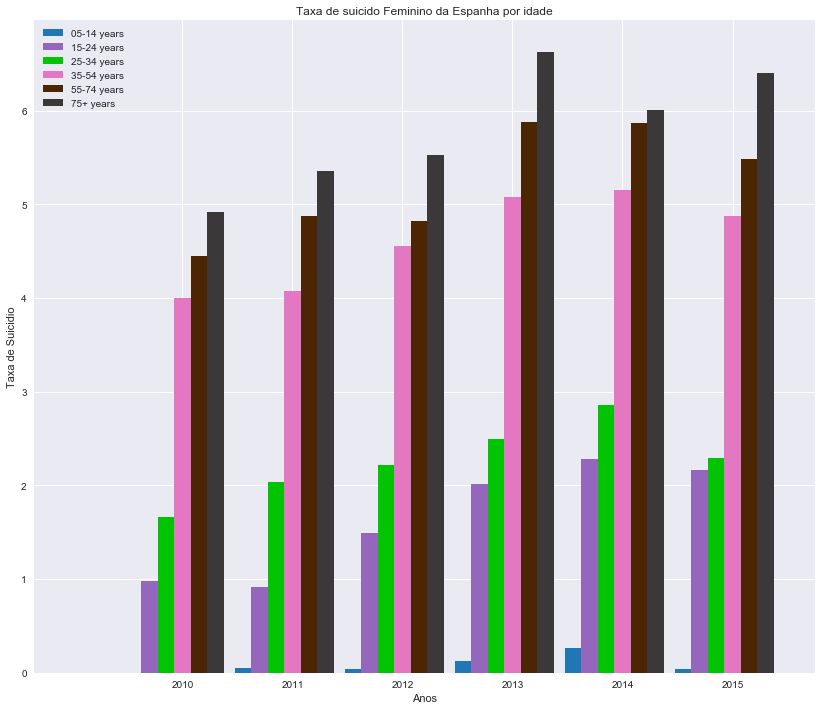

In [170]:
generate_chart_suicide_age(spain_female, "Taxa de Suicidio", "Anos", "Taxa de suicido Feminino da Espanha por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



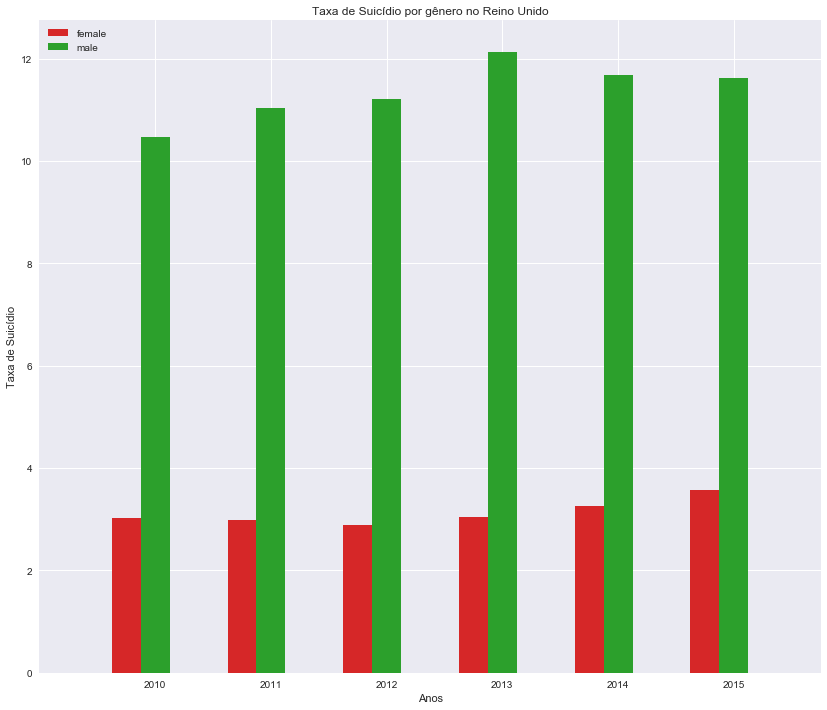

In [171]:
generate_chart_suicide_gen(guk, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero no Reino Unido",male_female_colors, 0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



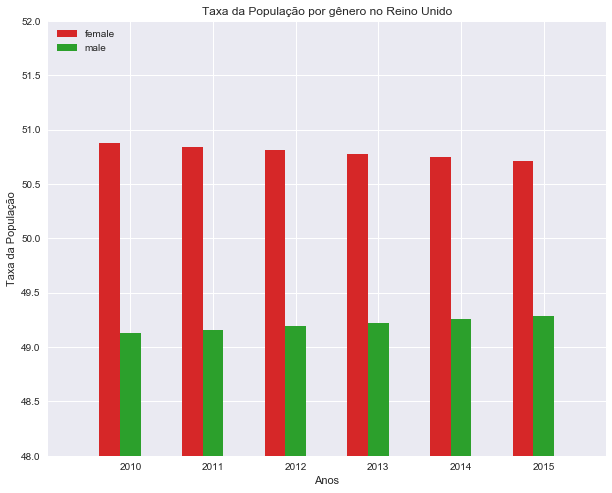

In [172]:
generate_chart_rate_population_gen(guk, "Taxa da População", "Anos", "Taxa da População por gênero no Reino Unido",male_female_colors,48,52,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



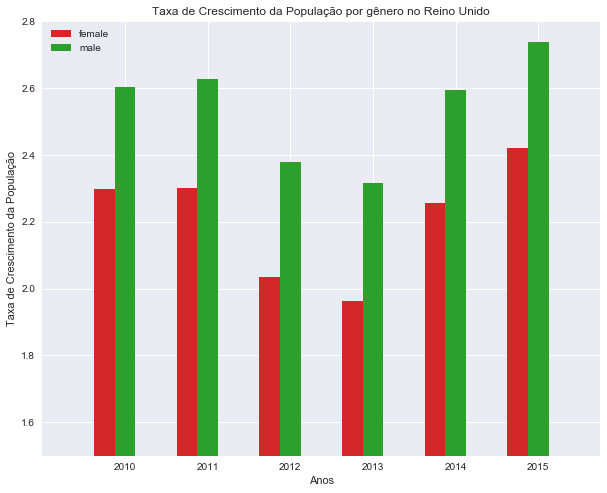

In [292]:
generate_chart_growth_population_gen(guk, "Taxa de Crescimento da População", "Anos", "Taxa de Crescimento da População por gênero no Reino Unido",male_female_colors,1.5,2.8,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



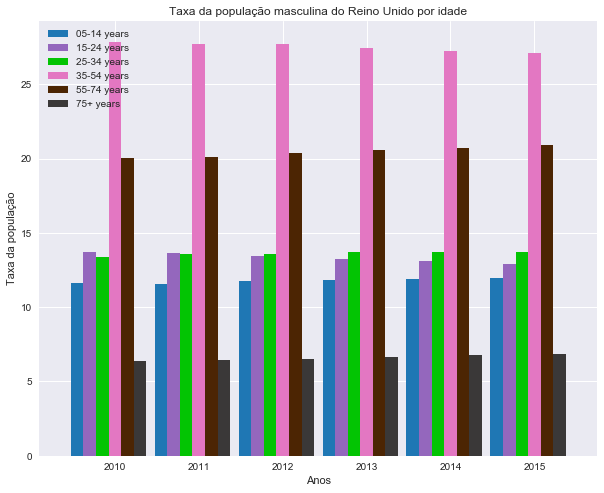

In [173]:
generate_chart_rate_population_age(unitedKingdom_male, "Taxa da população", "Anos", "Taxa da população masculina do Reino Unido por idade", "totalPopulationMale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



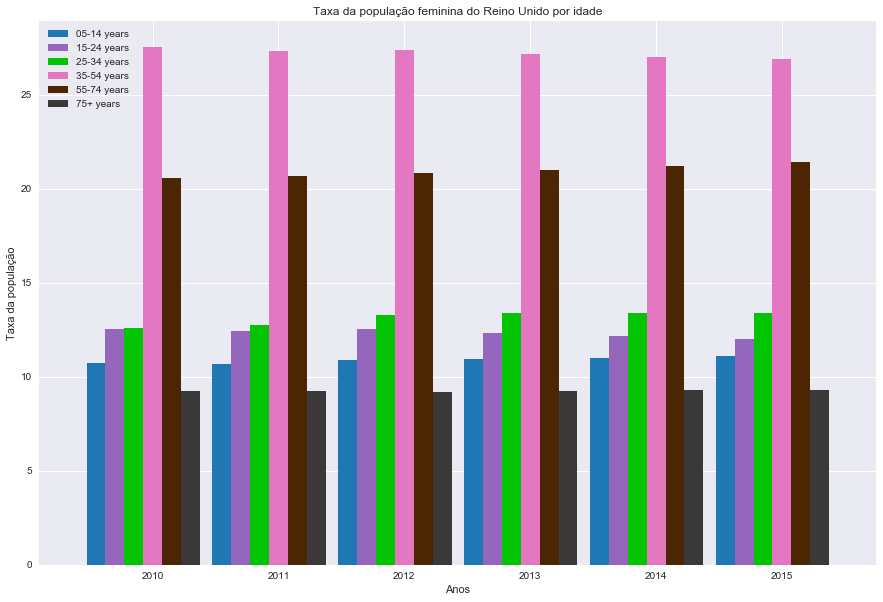

In [174]:
generate_chart_rate_population_age(unitedKingdom_female, "Taxa da população", "Anos", "Taxa da população feminina do Reino Unido por idade", "totalPopulationFemale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



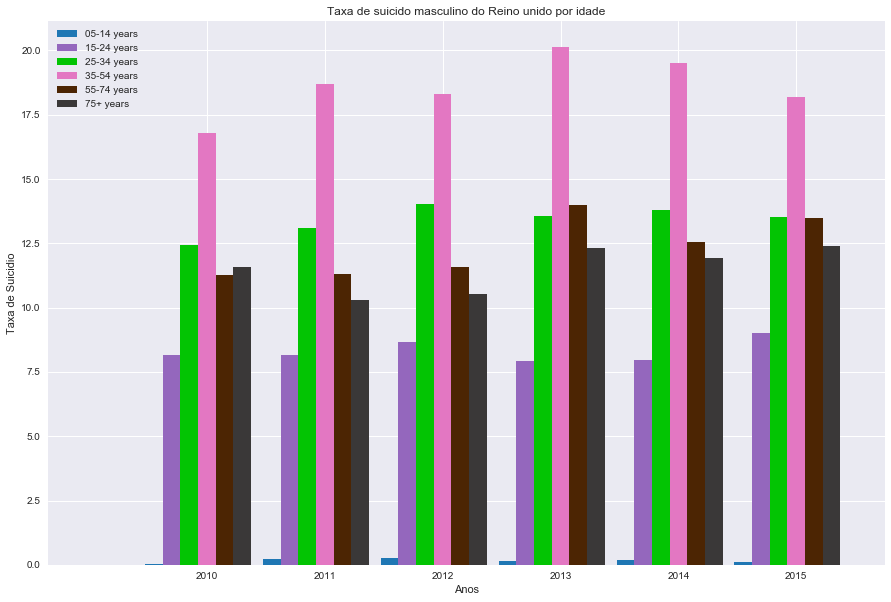

In [175]:
generate_chart_suicide_age(unitedKingdom_male, "Taxa de Suicidio", "Anos", "Taxa de suicido masculino do Reino unido por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



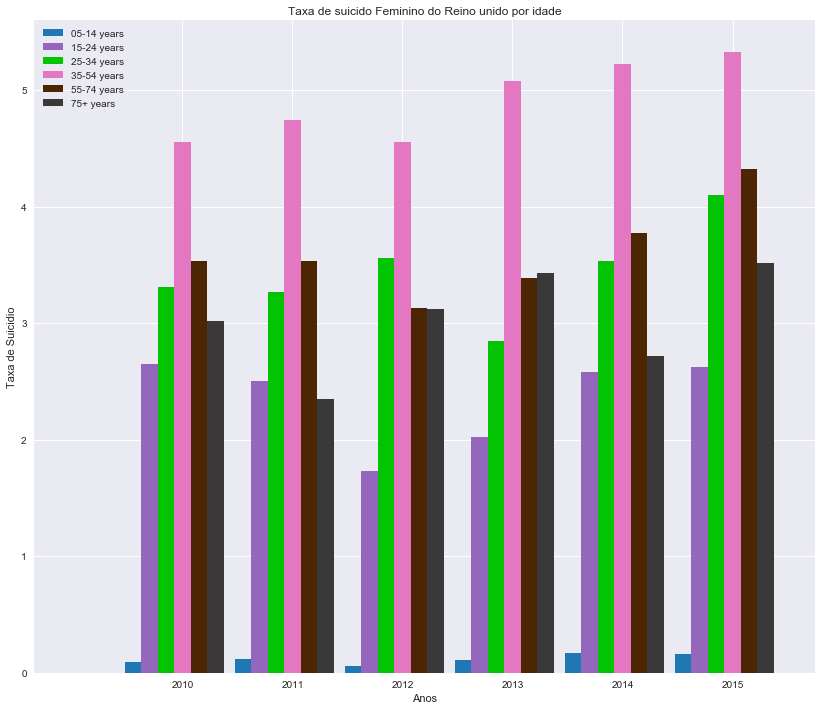

In [176]:
generate_chart_suicide_age(unitedKingdom_female, "Taxa de Suicidio", "Anos", "Taxa de suicido Feminino do Reino unido por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



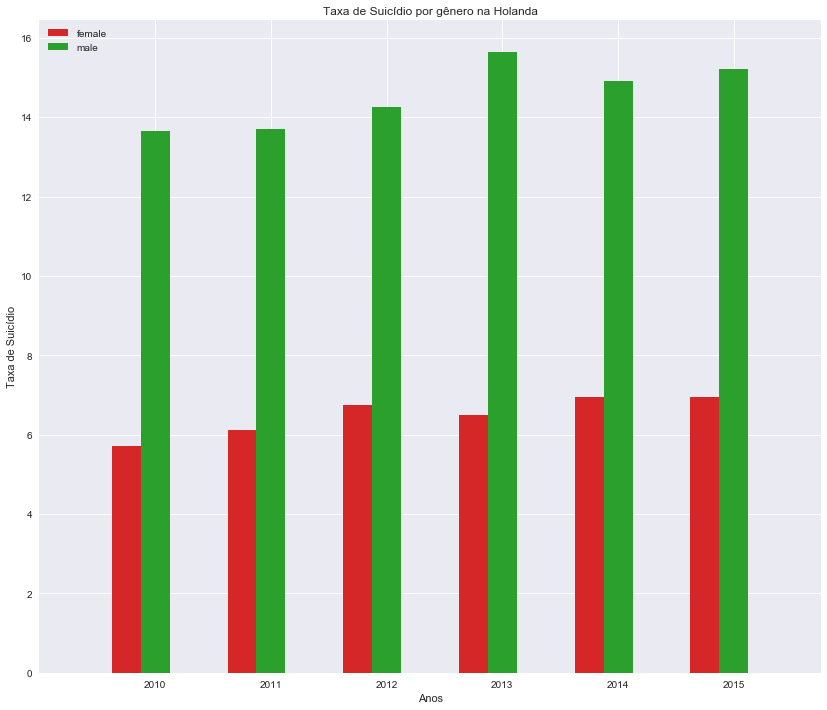

In [177]:
generate_chart_suicide_gen(gne, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Holanda",male_female_colors, 0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



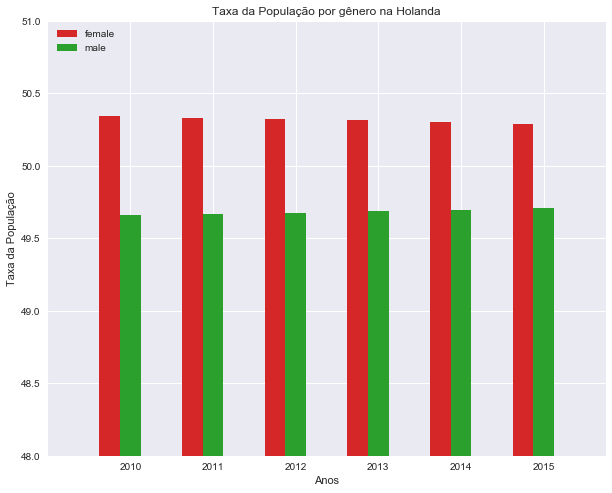

In [178]:
generate_chart_rate_population_gen(gne, "Taxa da População", "Anos", "Taxa da População por gênero na Holanda",male_female_colors,48,51,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



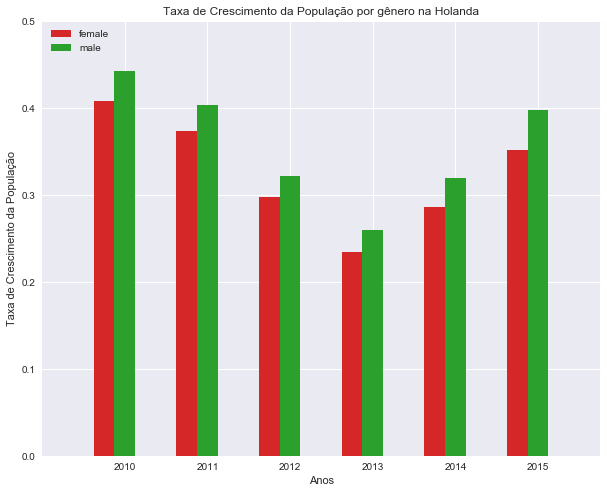

In [295]:
generate_chart_growth_population_gen(gne, "Taxa de Crescimento da População", "Anos", "Taxa de Crescimento da População por gênero na Holanda",male_female_colors,0,0.5,0.25)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



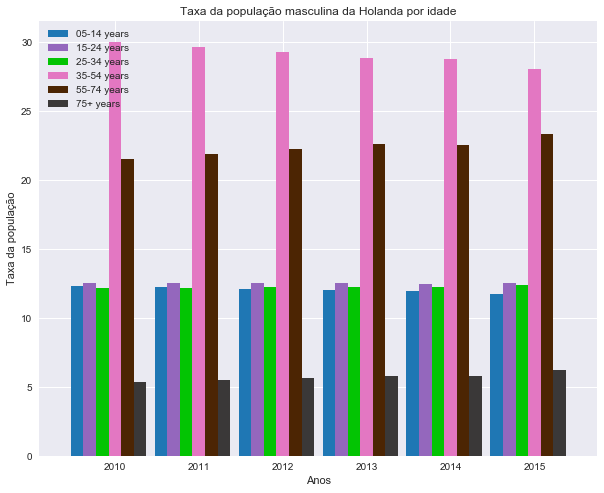

In [179]:
generate_chart_rate_population_age(netherlands_male, "Taxa da população", "Anos", "Taxa da população masculina da Holanda por idade", "totalPopulationMale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



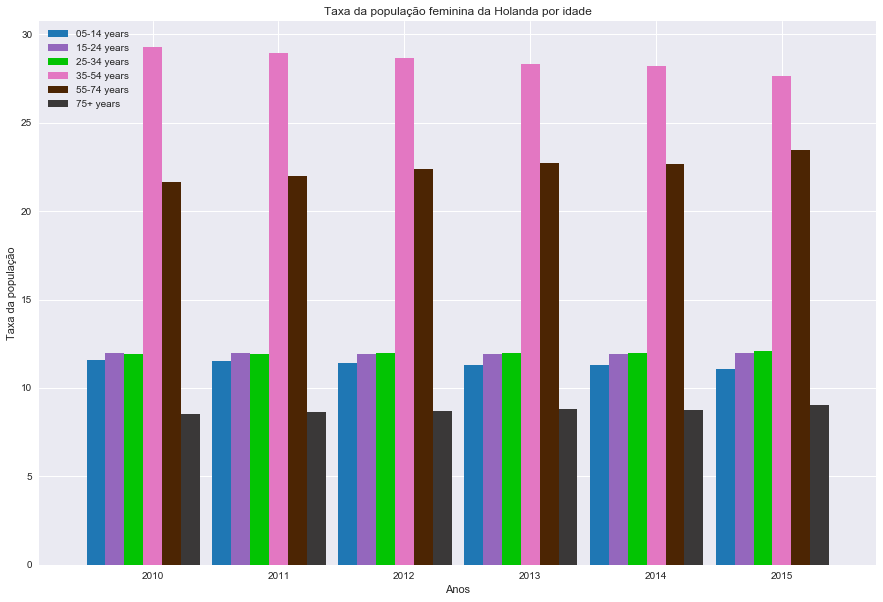

In [180]:
generate_chart_rate_population_age(netherlands_female, "Taxa da população", "Anos", "Taxa da população feminina da Holanda por idade", "totalPopulationFemale",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



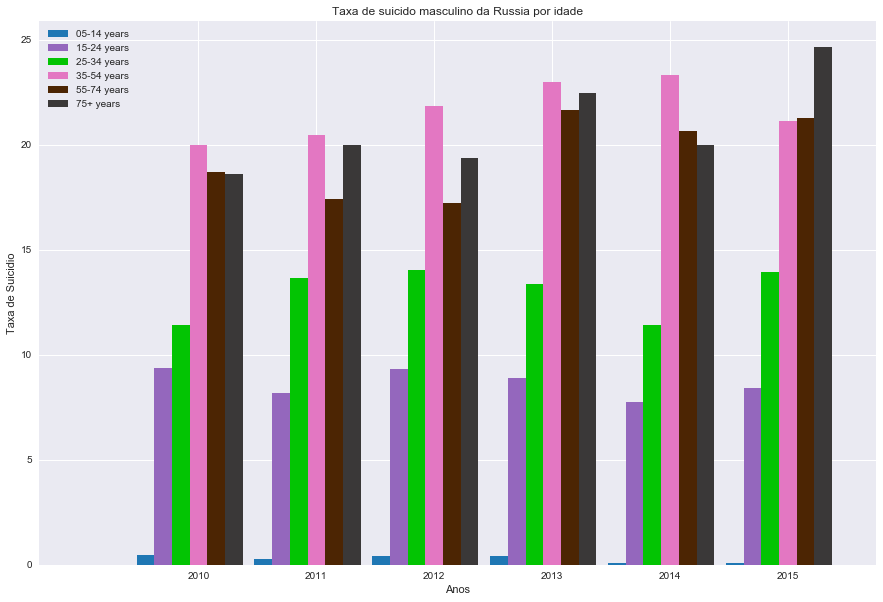

In [181]:
generate_chart_suicide_age(netherlands_male, "Taxa de Suicidio", "Anos", "Taxa de suicido masculino da Russia por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



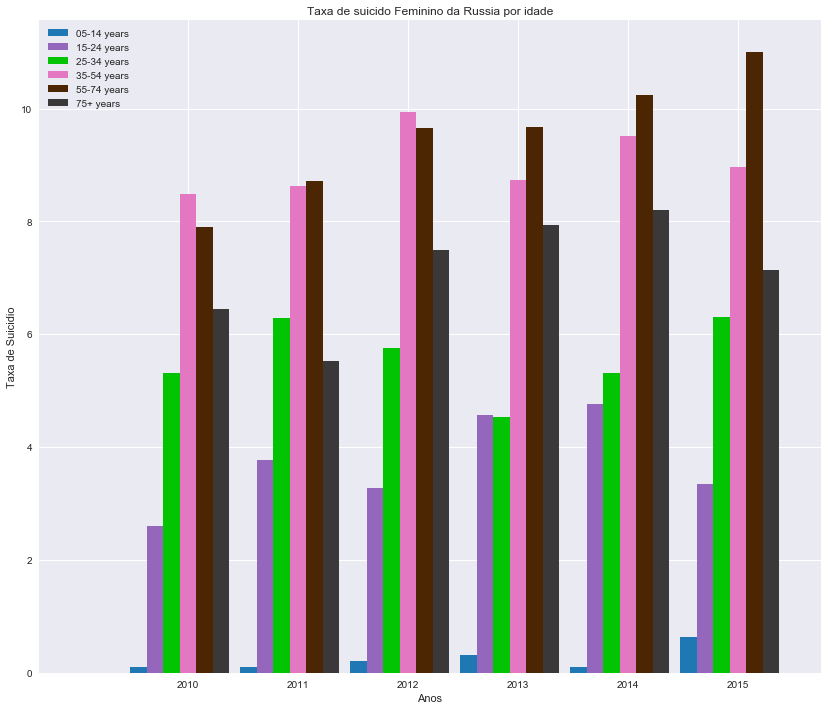

In [182]:
generate_chart_suicide_age(netherlands_female, "Taxa de Suicidio", "Anos", "Taxa de suicido Feminino da Russia por idade",age_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



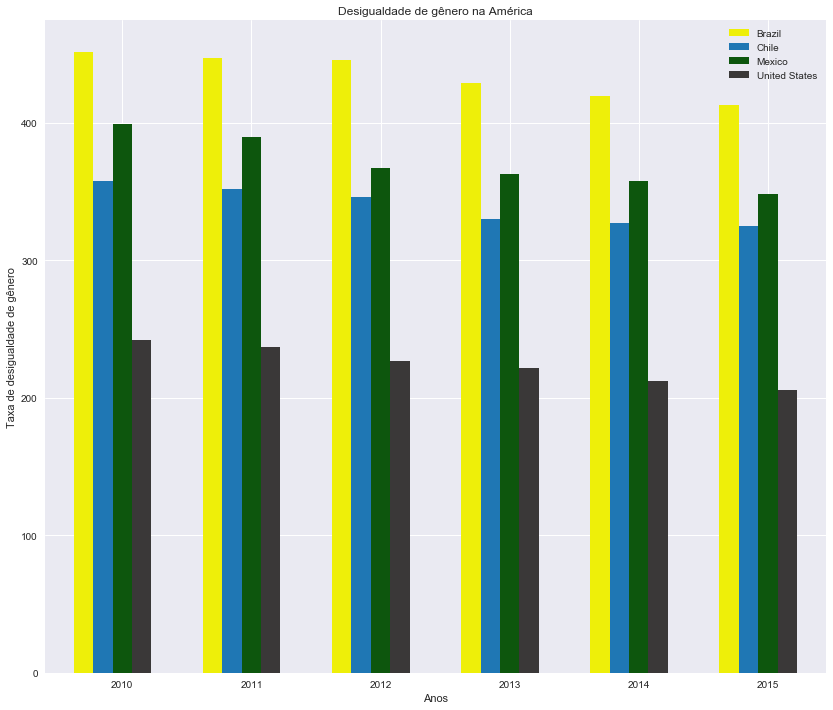

In [183]:
generate_chart_gender_inequality(gamerica,"Taxa de desigualdade de gênero","Anos","Desigualdade de gênero na América", america_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



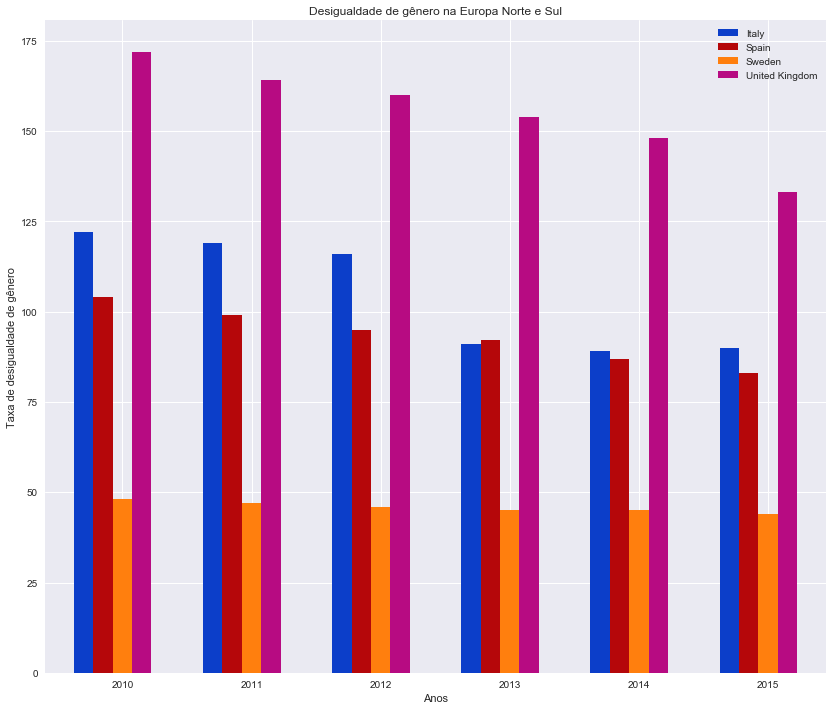

In [184]:
generate_chart_gender_inequality(geurons,"Taxa de desigualdade de gênero","Anos","Desigualdade de gênero na Europa Norte e Sul", europe_ns_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



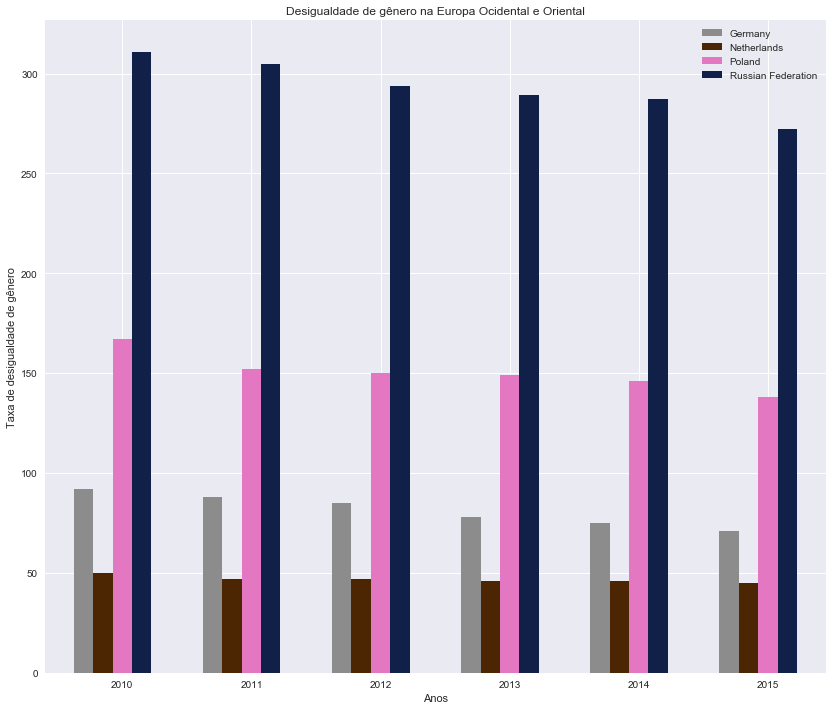

In [185]:
generate_chart_gender_inequality(geurowe,"Taxa de desigualdade de gênero","Anos","Desigualdade de gênero na Europa Ocidental e Oriental", europe_we_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



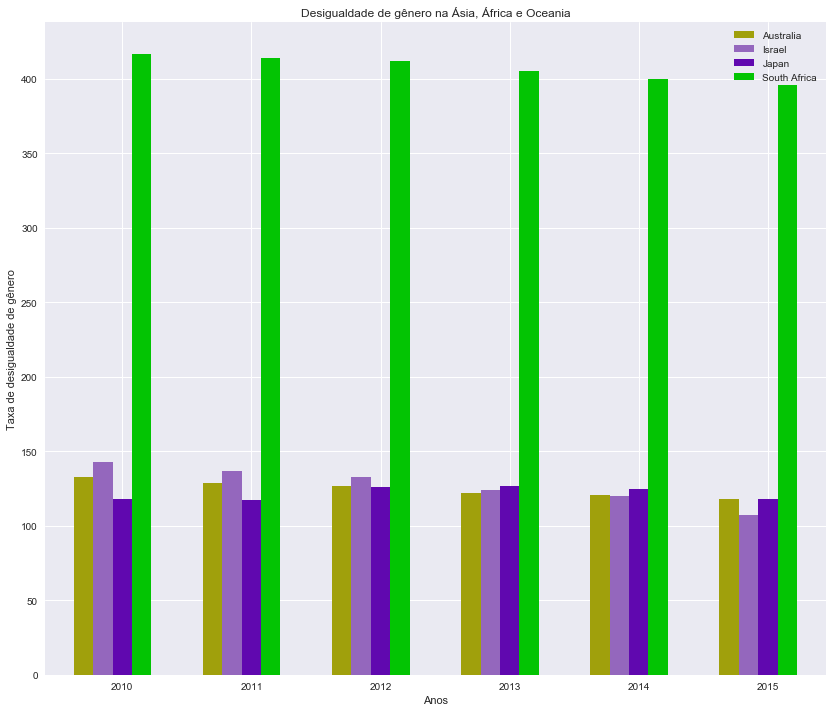

In [186]:
generate_chart_gender_inequality(gaao,"Taxa de desigualdade de gênero","Anos","Desigualdade de gênero na Ásia, África e Oceania", aao_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



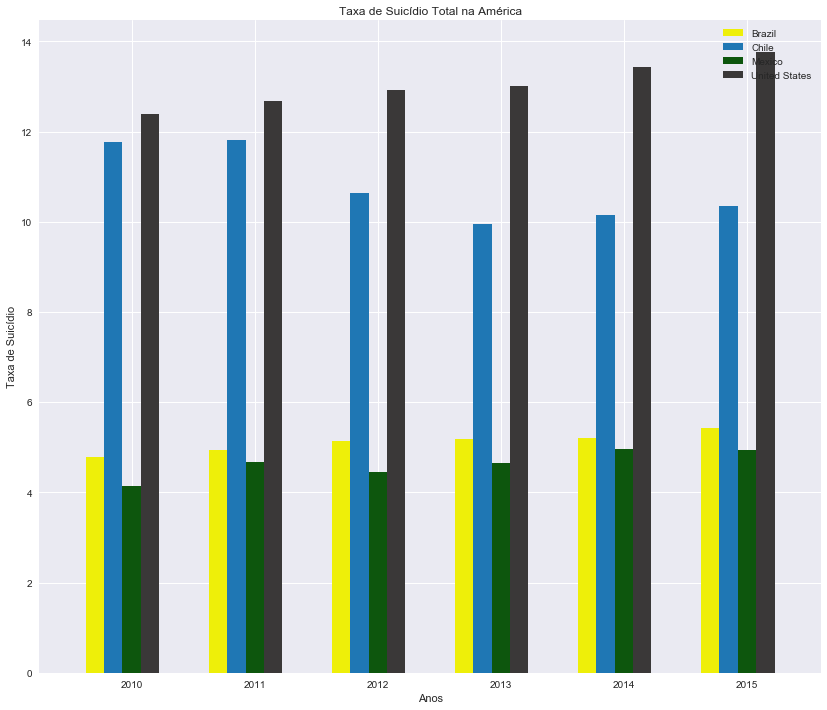

In [187]:
generate_chart_suicide_total(gamerica, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Total na América",america_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



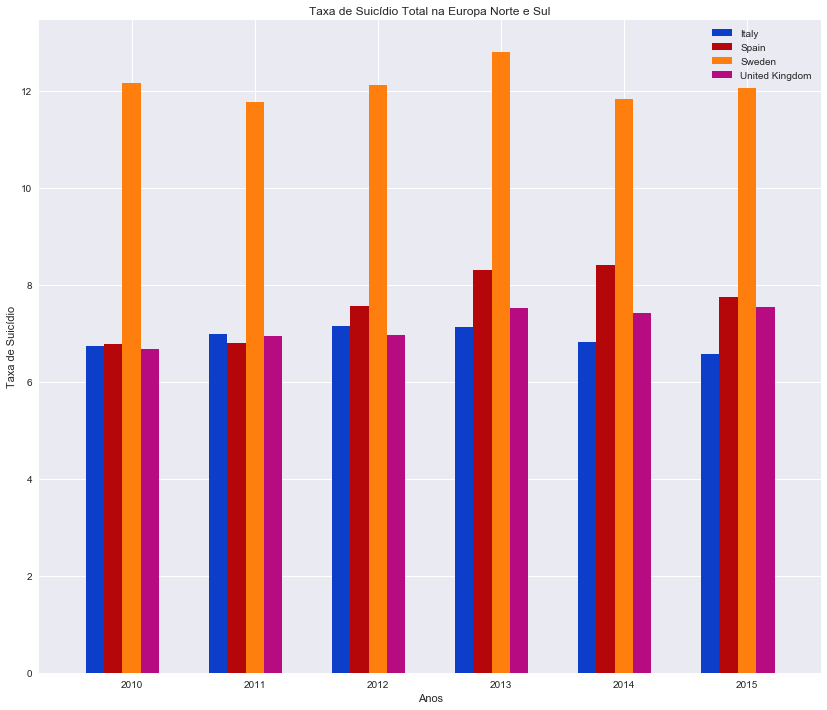

In [188]:
generate_chart_suicide_total(geurons, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Total na Europa Norte e Sul",europe_ns_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



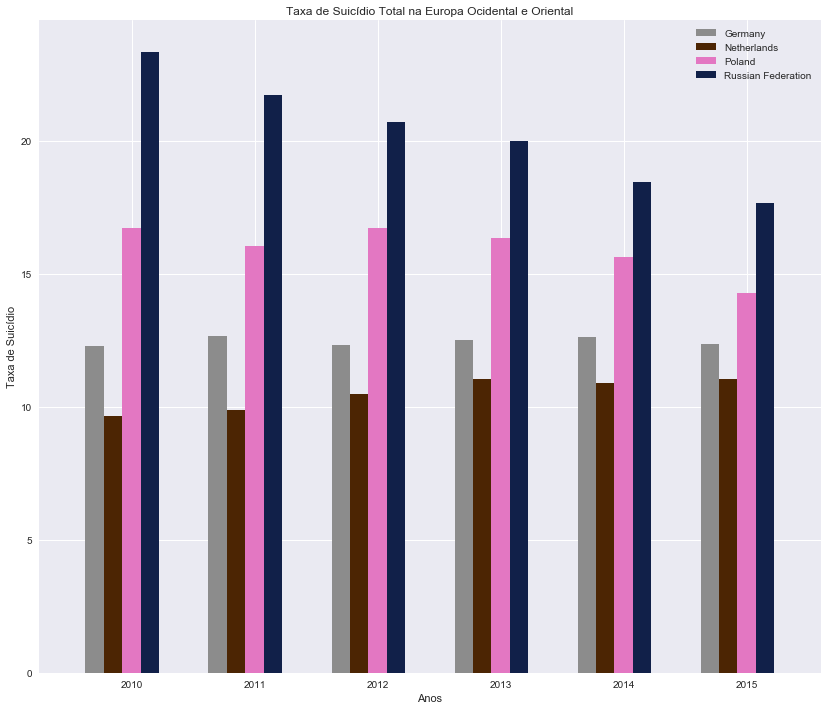

In [189]:
generate_chart_suicide_total(geurowe, "Taxa de Suicídio", "Anos", "Taxa de Suicídio Total na Europa Ocidental e Oriental",europe_we_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



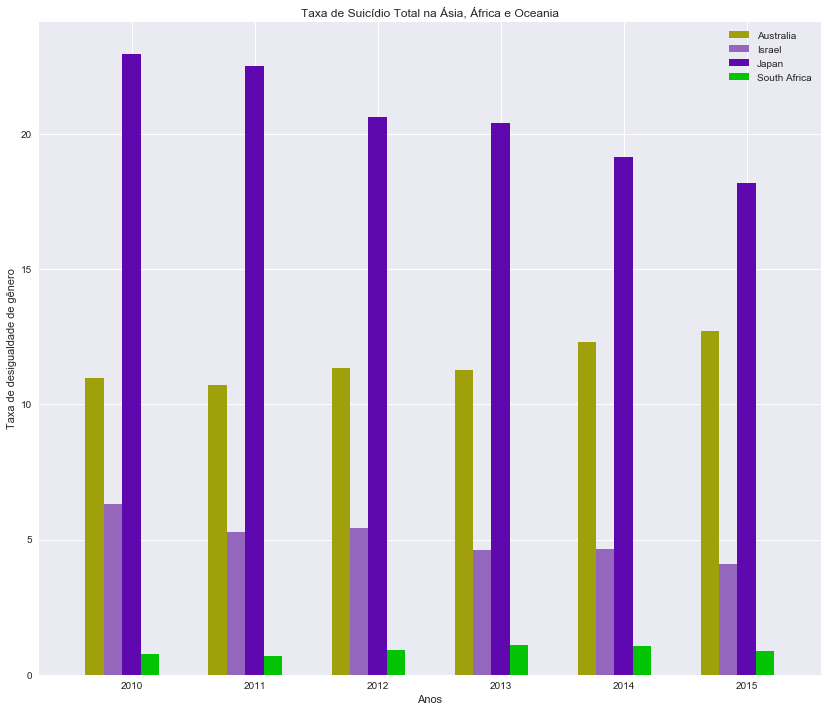

In [190]:
generate_chart_suicide_total(gaao,"Taxa de desigualdade de gênero","Anos","Taxa de Suicídio Total na Ásia, África e Oceania", aao_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



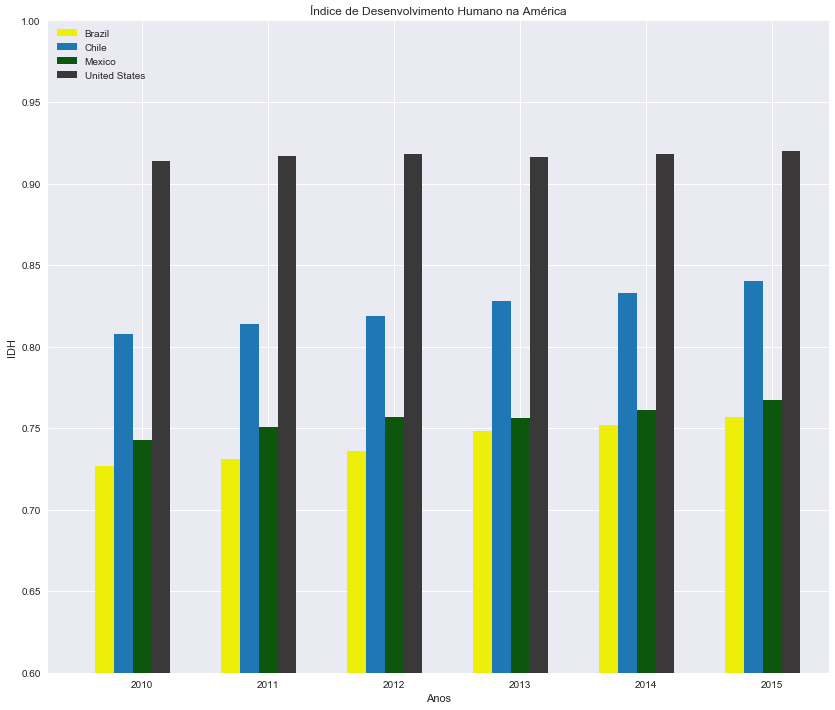

In [191]:
generate_chart_hdi_total(gamerica, "IDH", "Anos", "Índice de Desenvolvimento Humano na América",america_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



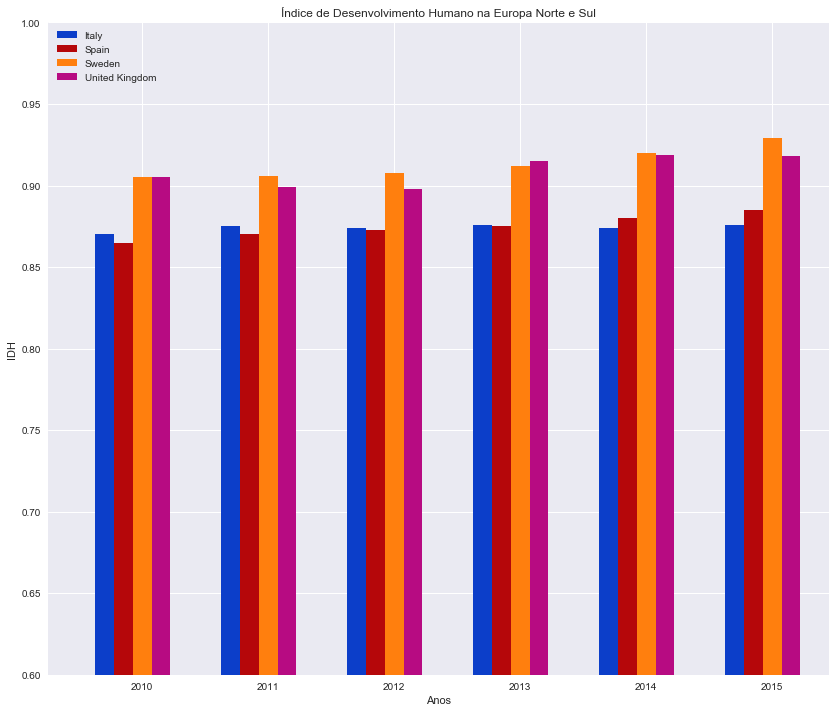

In [192]:
generate_chart_hdi_total(geurons, "IDH", "Anos", "Índice de Desenvolvimento Humano na Europa Norte e Sul",europe_ns_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



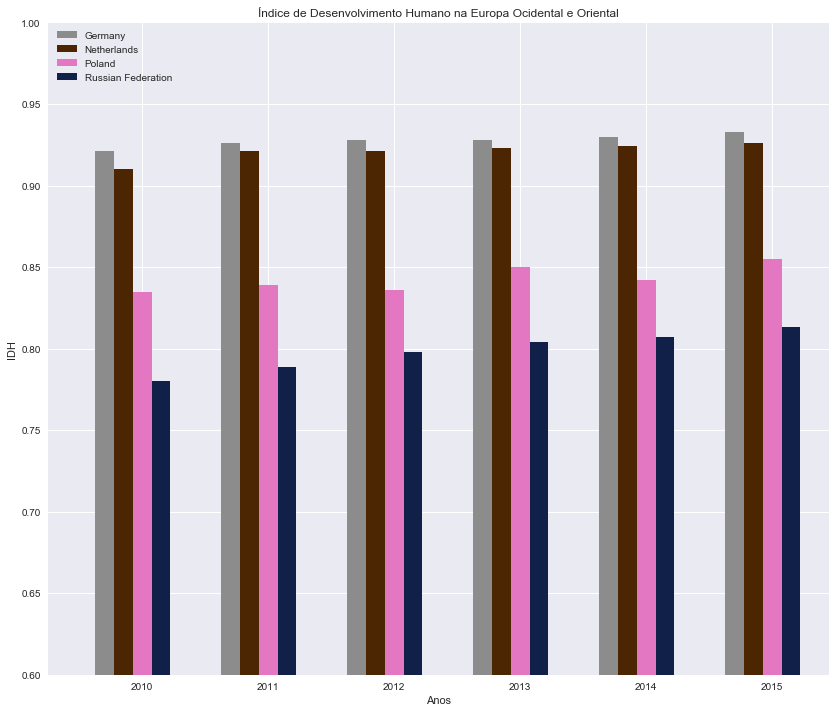

In [193]:
generate_chart_hdi_total(geurowe, "IDH", "Anos", "Índice de Desenvolvimento Humano na Europa Ocidental e Oriental",europe_we_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



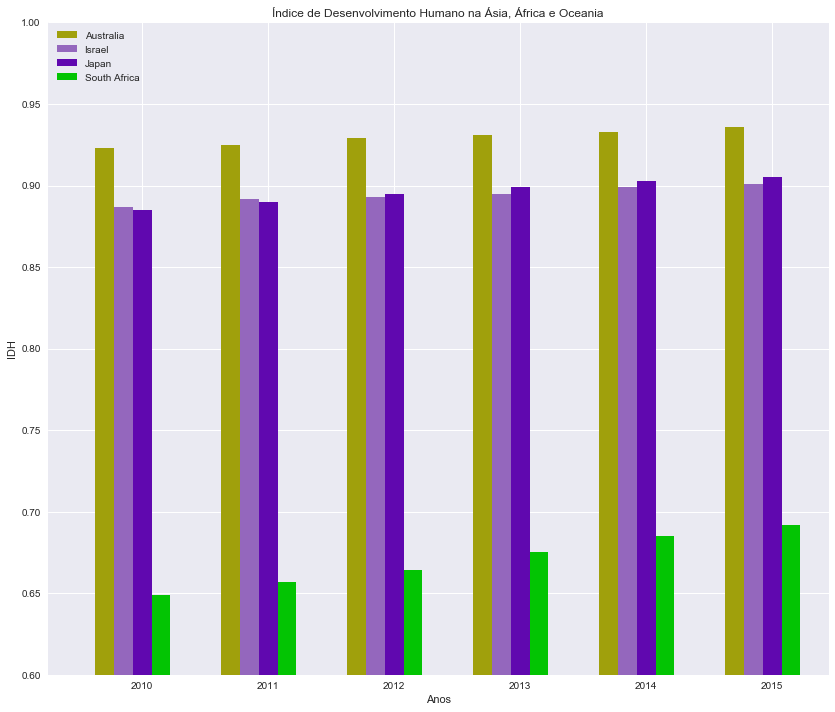

In [194]:
generate_chart_hdi_total(gaao,"IDH","Anos","Índice de Desenvolvimento Humano na Ásia, África e Oceania", aao_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



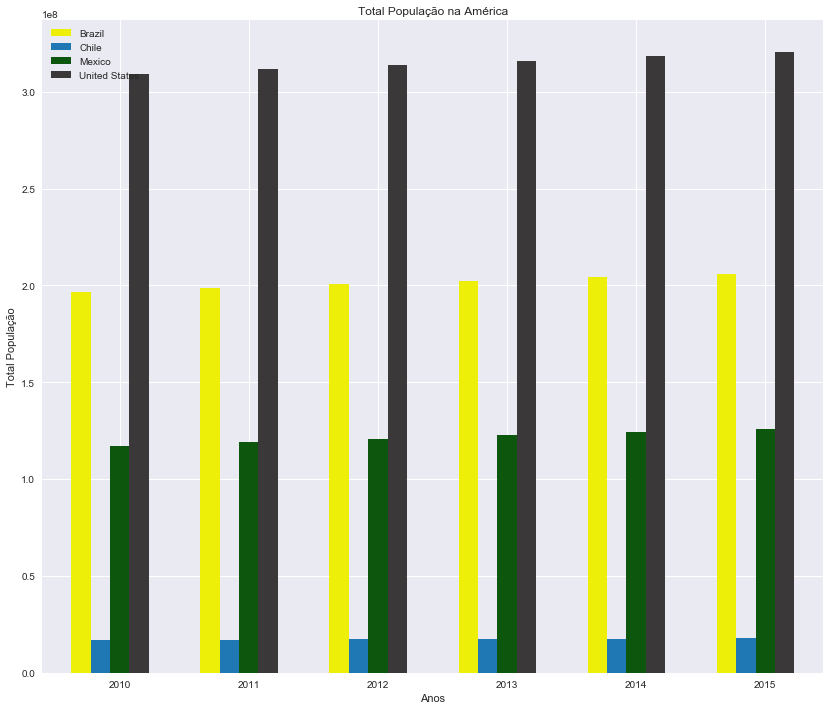

In [195]:
generate_chart_total_pop(gamerica, "Total População", "Anos", "Total População na América",america_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



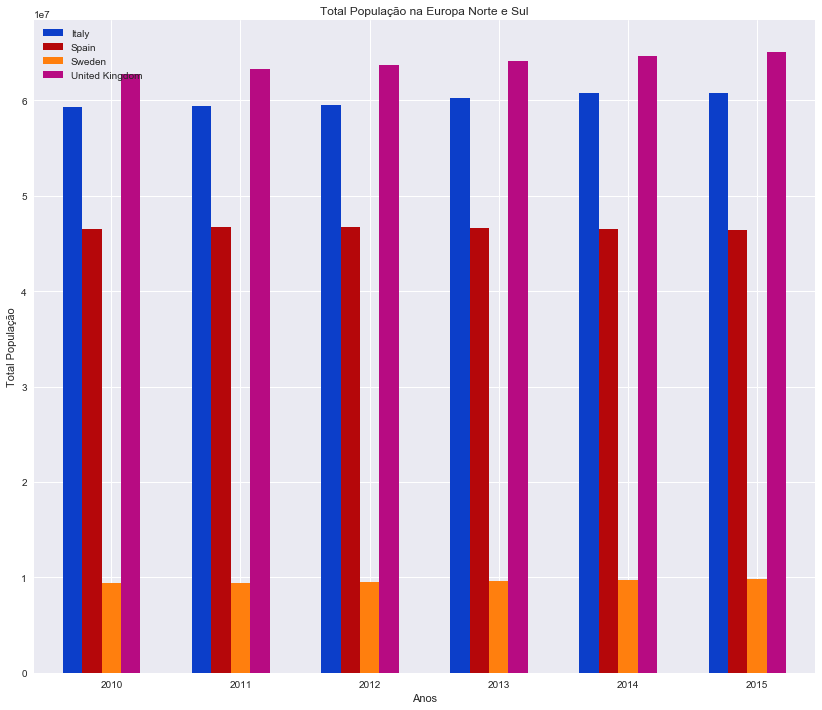

In [196]:
generate_chart_total_pop(geurons, "Total População", "Anos", "Total População na Europa Norte e Sul",europe_ns_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



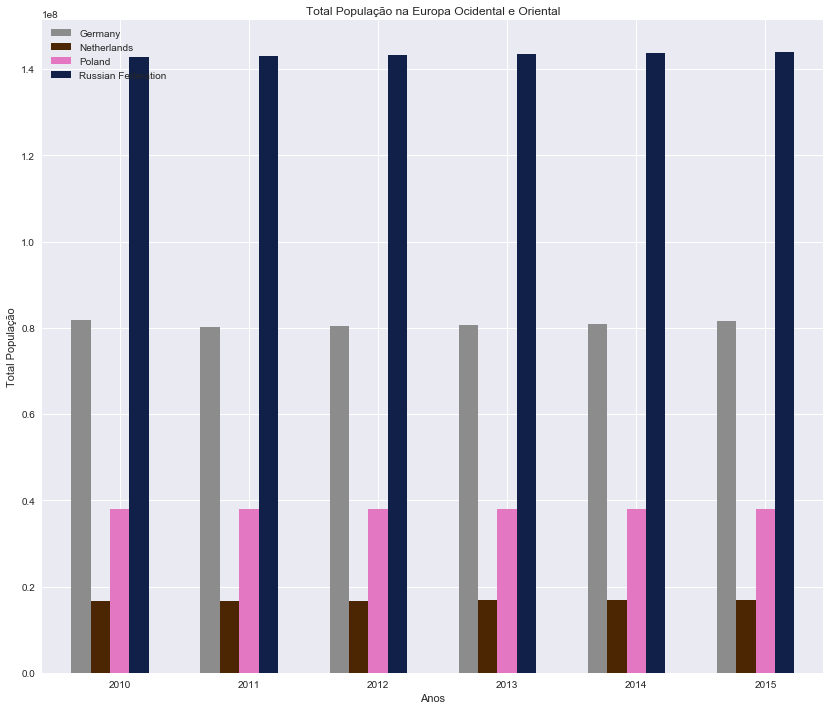

In [197]:
generate_chart_total_pop(geurowe, "Total População", "Anos", "Total População na Europa Ocidental e Oriental",europe_we_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



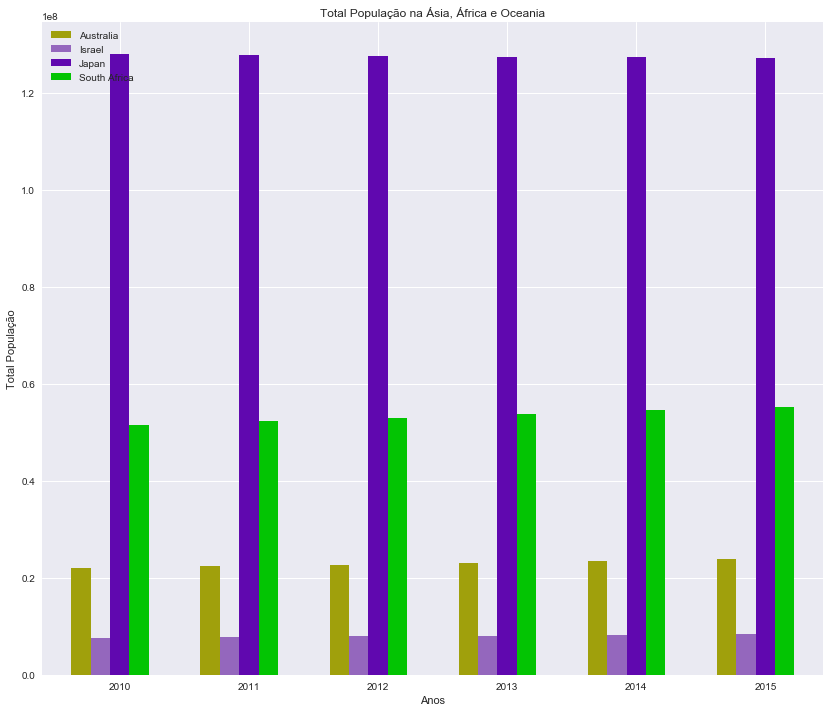

In [198]:
generate_chart_total_pop(gaao,"Total População","Anos","Total População na Ásia, África e Oceania", aao_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



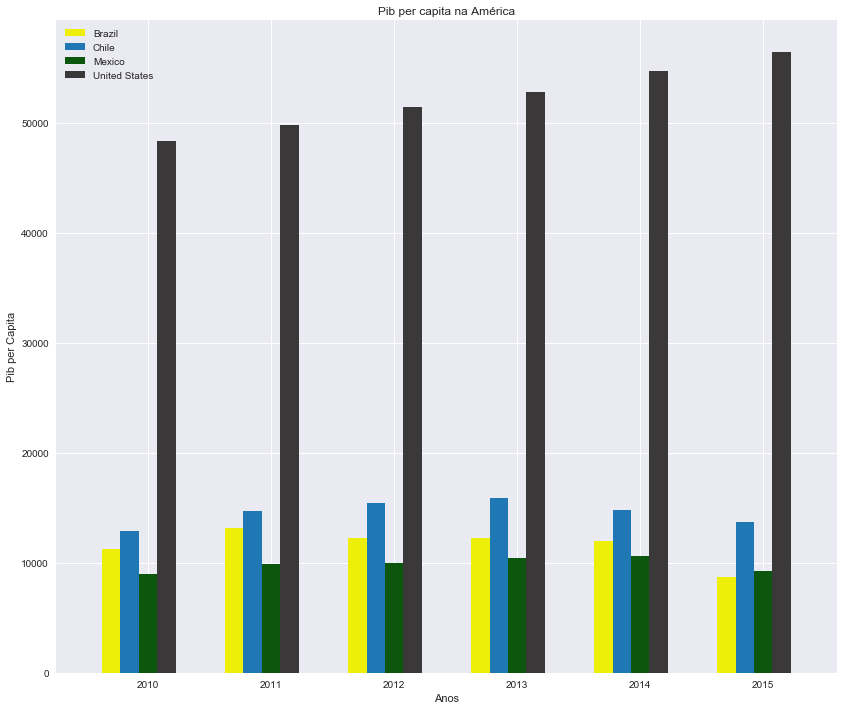

In [199]:
generate_chart_gdp_pc(gamerica, "Pib per Capita", "Anos", "Pib per capita na América",america_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



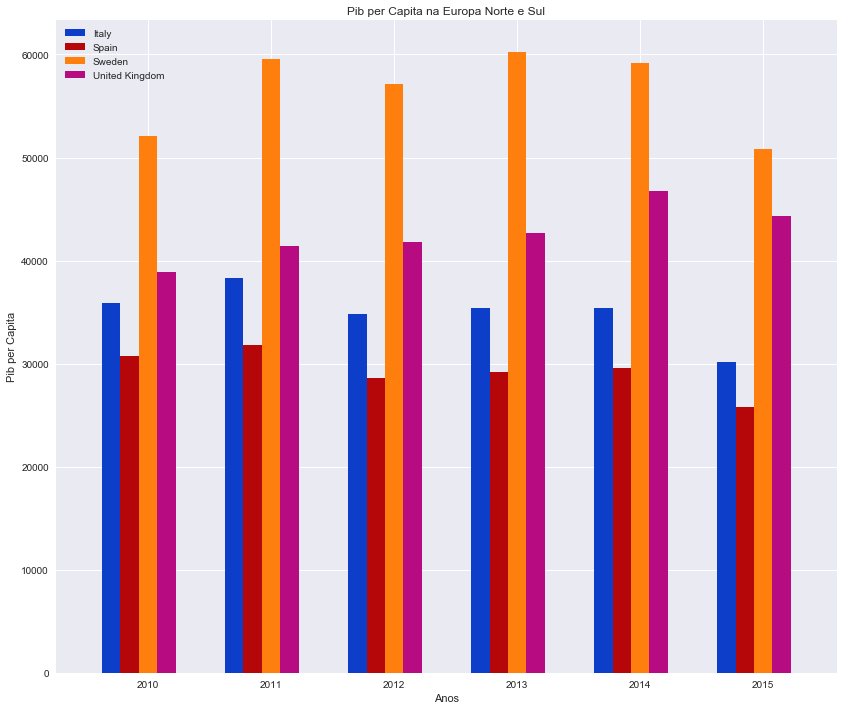

In [200]:
generate_chart_gdp_pc(geurons, "Pib per Capita", "Anos", "Pib per Capita na Europa Norte e Sul",europe_ns_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



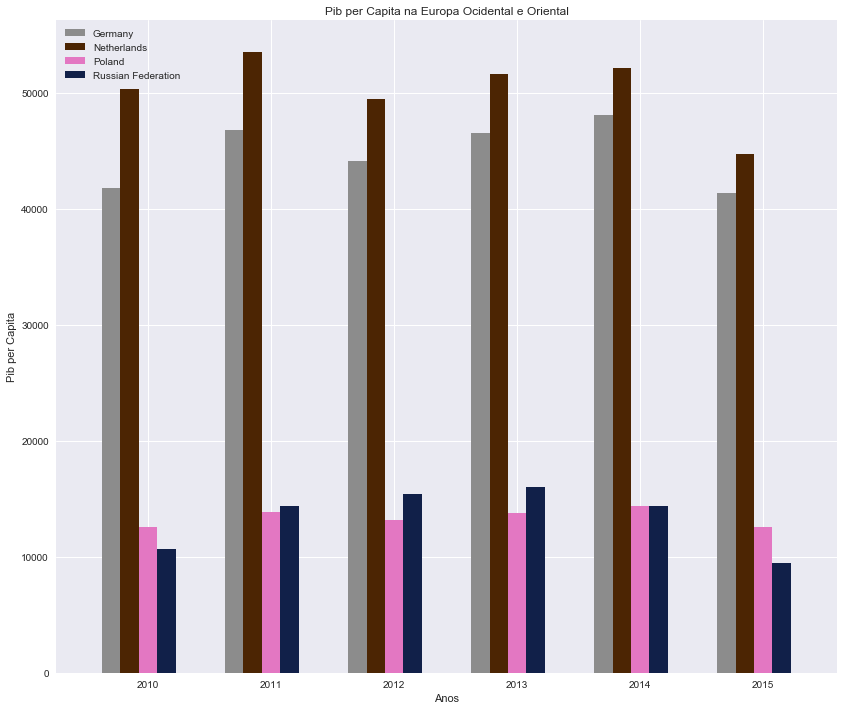

In [201]:
generate_chart_gdp_pc(geurowe, "Pib per Capita", "Anos", "Pib per Capita na Europa Ocidental e Oriental",europe_we_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



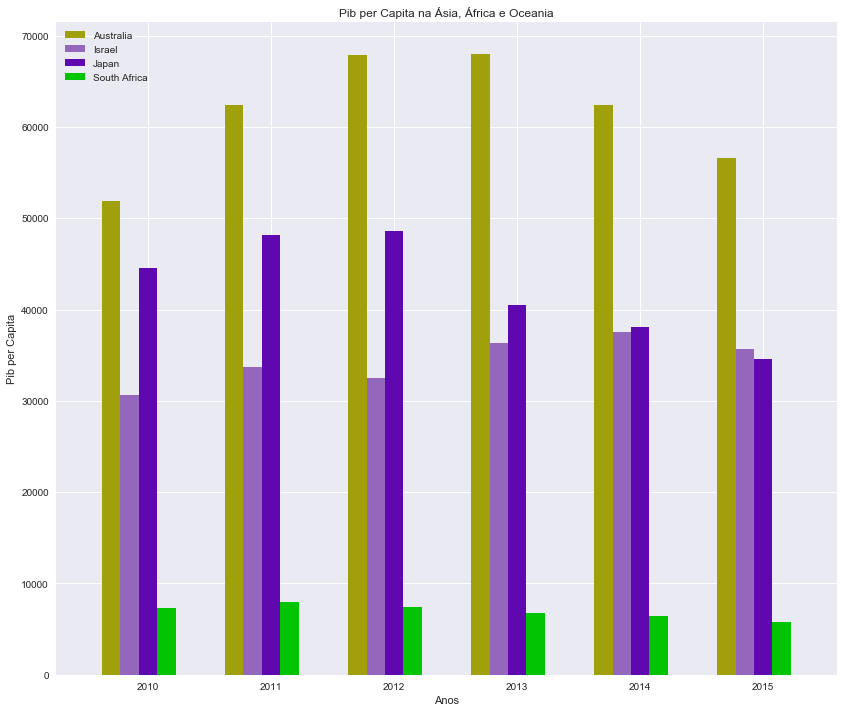

In [202]:
generate_chart_gdp_pc(gaao,"Pib per Capita","Anos","Pib per Capita na Ásia, África e Oceania", aao_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



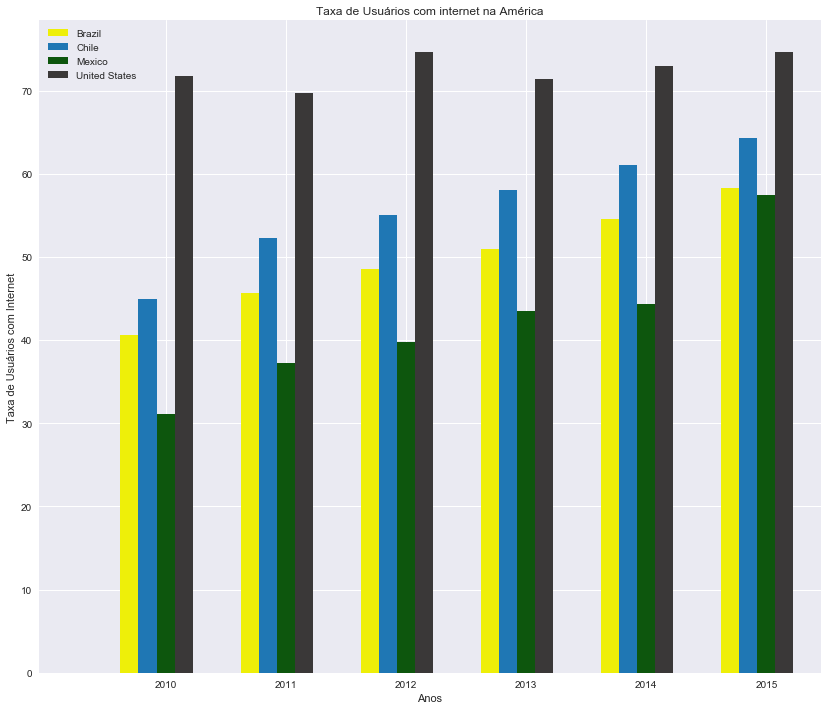

In [203]:
generate_chart_users_internet(gamerica, "Taxa de Usuários com Internet", "Anos", "Taxa de Usuários com internet na América", america_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



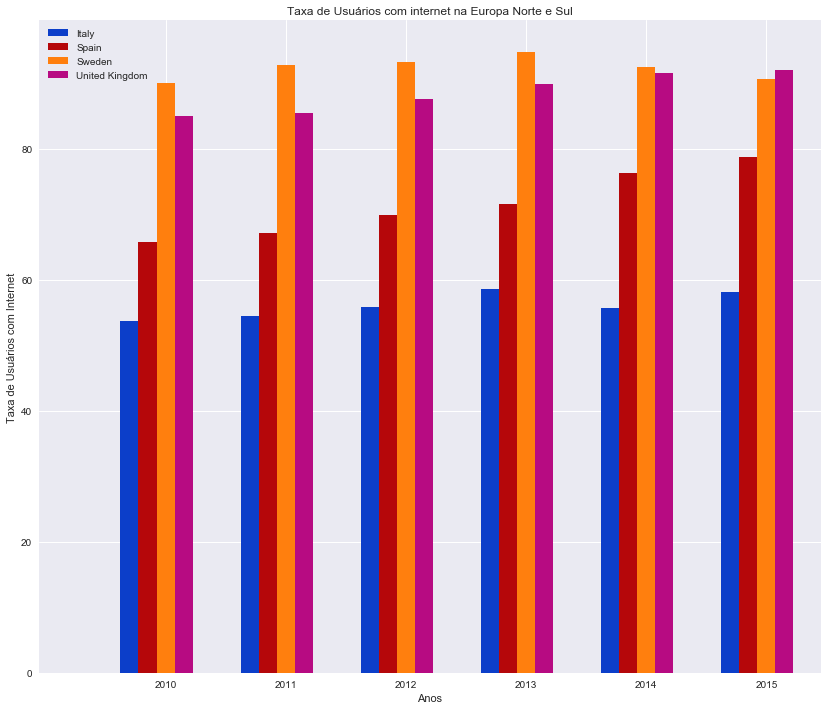

In [204]:
generate_chart_users_internet(geurons, "Taxa de Usuários com Internet", "Anos", "Taxa de Usuários com internet na Europa Norte e Sul", europe_ns_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



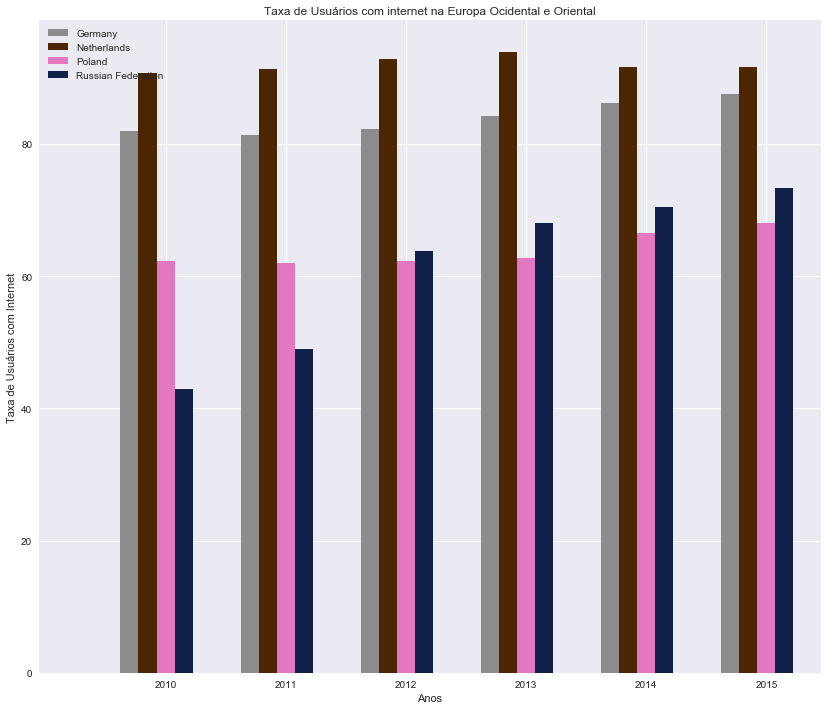

In [205]:
generate_chart_users_internet(geurowe, "Taxa de Usuários com Internet", "Anos", "Taxa de Usuários com internet na Europa Ocidental e Oriental", europe_we_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



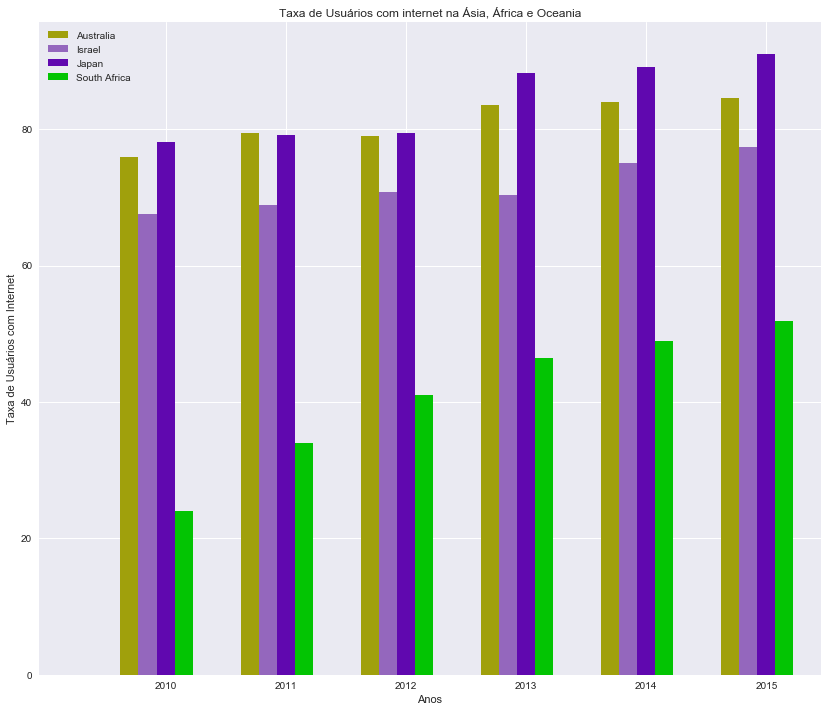

In [206]:
generate_chart_users_internet(gaao, "Taxa de Usuários com Internet", "Anos", "Taxa de Usuários com internet na Ásia, África e Oceania", aao_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



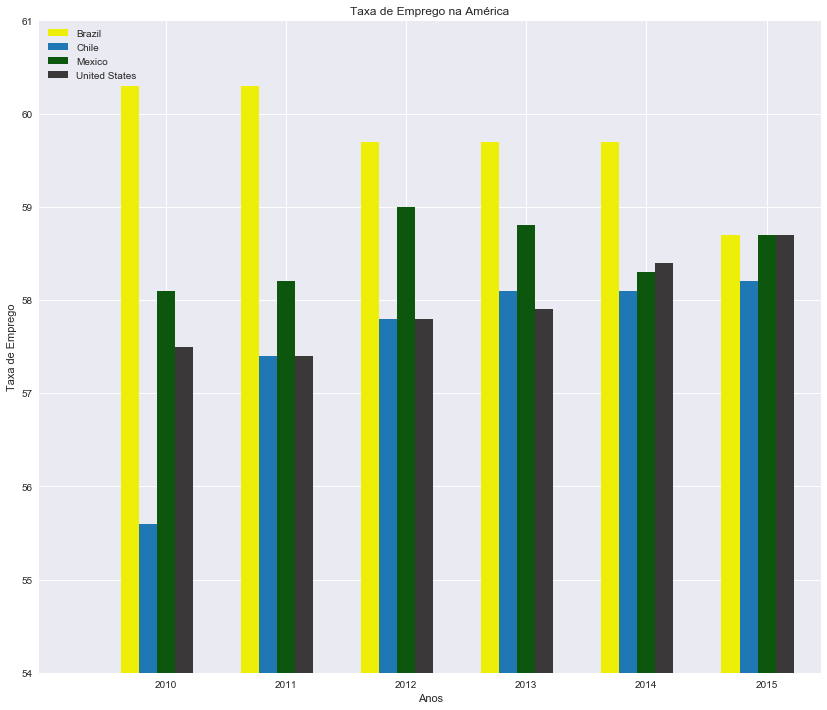

In [207]:
generate_chart_employment(gamerica, "Taxa de Emprego", "Anos", "Taxa de Emprego na América",america_colors,54,61)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



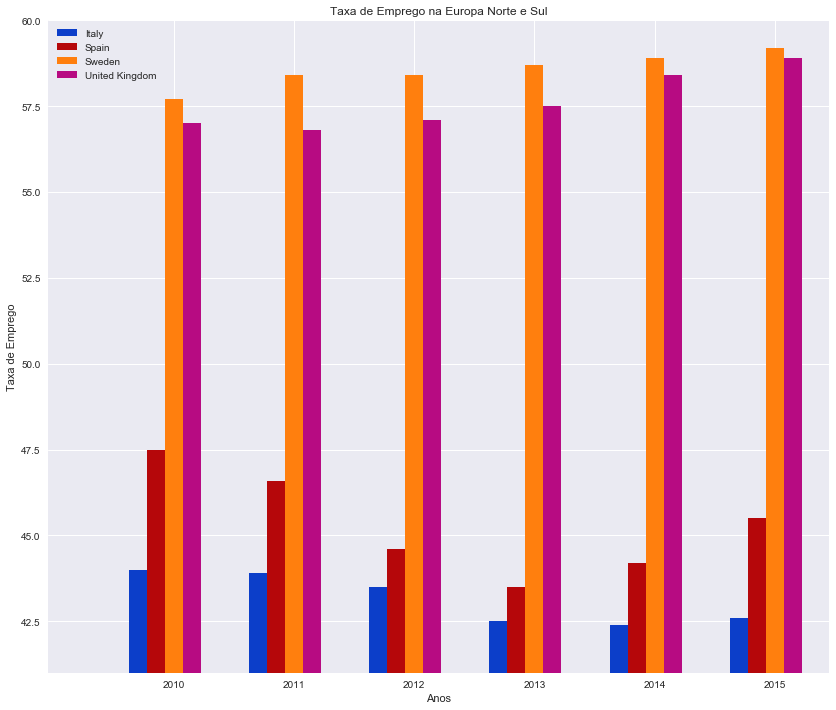

In [208]:
generate_chart_employment(geurons, "Taxa de Emprego", "Anos", "Taxa de Emprego na Europa Norte e Sul",europe_ns_colors,41,60)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



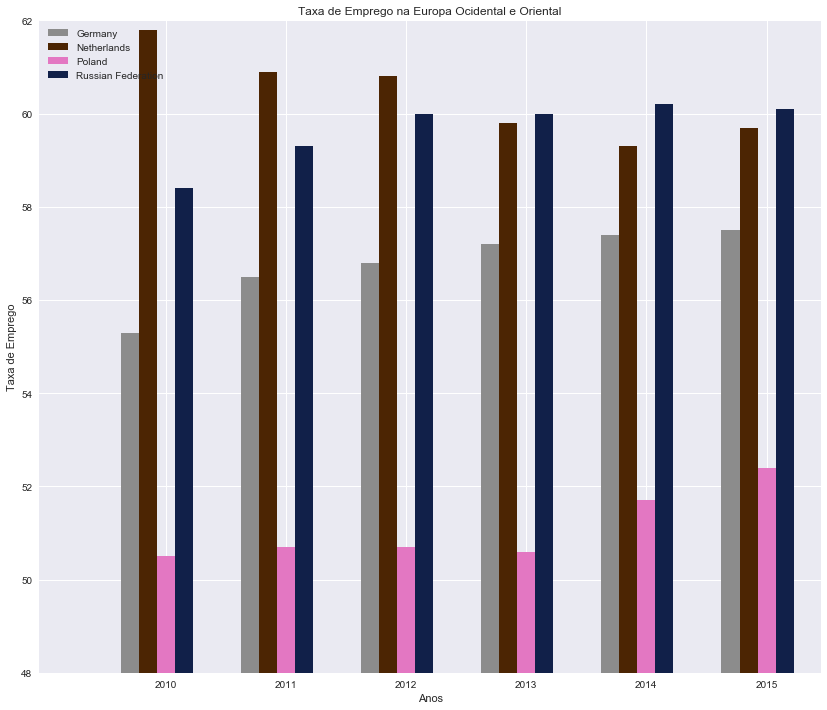

In [209]:
generate_chart_employment(geurowe, "Taxa de Emprego", "Anos", "Taxa de Emprego na Europa Ocidental e Oriental",europe_we_colors,48,62)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



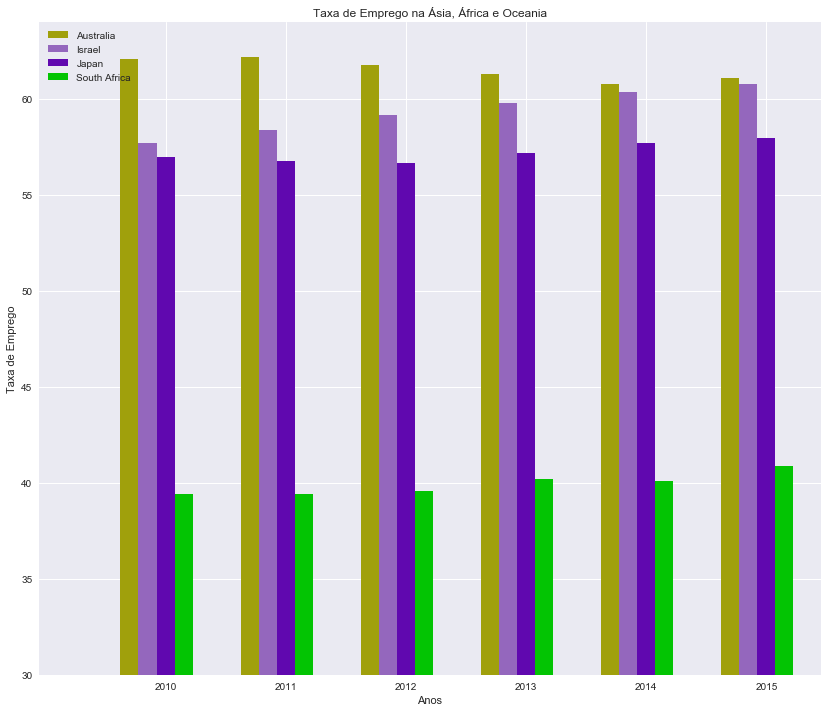

In [210]:
generate_chart_employment(gaao, "Taxa de Emprego", "Anos", "Taxa de Emprego na Ásia, África e Oceania",aao_colors,30,64)

In [211]:
def generate_growth_pop_age_lin(df, col_y, col_f, col_m, x_limit, x_label, y_label, legend, title):
    plt.plot(df[col_y],df[col_f], color='red' )
    plt.plot (df[col_y],df[col_m], color='green' )
    plt.xlim(x_limit)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(legend)
    plt.title(title)
    plt.show()



In [212]:
# Grupo de funções para gerar posição e labels do eixo x do gráfico de faixa etária
# Diminui um dado inteiro n de 2 unidades:
func = lambda x:x-50
# Retorna o valor negativo de um número x:
negativeNum = lambda x:x*(-1)
# Função recursiva que retorna um string composta por uma série de números descrecidos de 2 unidades a partir do anterior.
def tiraDois(n):
  if n != 0 and n > 0:
    string = ''
    string+= str(n)+','
    n = func(n)
    if n > 49:
      string+=str(n)+','
  if n < 50:
    n = 0
    string+=str(n)
    return string
  elif n != 0:
    string+=str(tiraDois(n))
    return string
# Gera lista de inteiros dos valores gerados na função tiraDois:
def generateListLabels(n):
  lista = tiraDois(n)
  l = lista.split(',')
  l1 = list (map(int,l))
  return l1
# Retorna um número inteiro a partir de um float:
# Obs: A função nativa do python int não faz o arrendondamento ideal para nossas necessidades.
def floatToInt(n):
  try:
    n = str(n).split('.')
    if int(n[1])>5: 
      return int(n[0])+1
    else:
      return int(n[0])
  except:
    print('Por favor utilizar um valor do tipo inteiro')
# Retorna o valor maximo de uma coluna do dataframe:
def getMaxValue(df, coluna):
  n = df.loc[[df[coluna].idxmax()]]
  n = n[coluna]
  return float(n)
# Retorna o valor maximo entre dois maximos:
# Retorna o maior tamanho possivel, pois este será o limite superior dos labels do eixo x:
def returnMax(lista1, lista2):
  if max(lista1) < max(lista2):
    return lista2
  elif max(lista1) > max(lista2):
    return lista1
  elif max(lista1) == max(lista2):
    return lista2
  else:
    return 'Erro inesperado'
# Retorna nos labels do eixo X:
# Quando o parâmetro position tiver valor "True" será gerada a lista de posição dos labels do eixo x.
def getLabels(df, coluna1, coluna2, position = False):
  if position:
    lista1 = returnMax(generateListLabels(floatToInt(getMaxValue(df,coluna1 ))),
            generateListLabels(floatToInt(getMaxValue(df,coluna2 ))))
    lista2 = lista1[::-1] # reverte a lista
    lista1 = list(map(negativeNum, lista1)) # 
    lista3 = lista1 + lista2 # une as duas listas
    lista3.remove(0) # remove o zero duplicado
    return lista3
  else:
    lista1 = returnMax(generateListLabels(floatToInt(getMaxValue(df,coluna1 ))),
            generateListLabels(floatToInt(getMaxValue(df,coluna2 ))))
    lista2 = lista1[::-1] # reverte a lista
    lista3 = lista1 + lista2 # une as duas listas
    lista3.remove(0) # remove o zero duplicado
    return lista3

In [213]:
# Gera o grafico que monta a piramide etária média dos países.
def generate_growth_pop_age_barh(df, col_y, col_f, col_m, x_ticks, x_labels, x_label, y_label, y_limit, title, legend ):
    fig,ax = plt.subplots()
    y_pos = df[col_y] # Recupera os labels do eixo y
    ax.barh(y_pos, df[col_f], align='center',color='red') # Define o lado esquerdo da barra.
    ax.barh(y_pos,-df[col_m],align='center',color='green') # Define o lado direito da barra.
    ax.set_yticks(y_pos) # posição dos labes y
    ax.set_xticks(x_ticks) # posição dos labels x
    ax.set_xticklabels(x_labels) # labels do eixo x
    ax.set_xlabel(x_label) # label do eixo x
    ax.set_ylabel(y_label) # label do eixo y
    plt.ylim(y_limit) # define o limite 
    ax.set_title(title,size=24) # define o titulo
    plt.legend(legend) #define as legendas
    plt.show() #plota o gráfico
    # Referência: https://mharias.com/2017/08/24/352/

In [214]:
def popCountry(df_female, df_male):
    male_mean = pd.DataFrame(df_male,columns=['country','year',"sex","age", 'population'])
    male_mean = male_mean.groupby(["country","age", 'sex'], as_index=False).mean()
    female_mean = pd.DataFrame(df_female,columns=['country','year',"sex","age", 'population'])
    female_mean = female_mean.groupby(["country","age", 'sex'], as_index=False).mean()
    pop_country = pd.merge(female_mean,male_mean,on=['age'])
    pop_country.drop(['country_y','year_x','year_y','sex_x','sex_y'], axis=1, inplace=True)
    pop_country.rename(columns={'population_x':'populationFemale','population_y':'populationMale','country_x':'country'}, inplace=True)
    pop_country['populationFemale'] =list(pop_country['populationFemale']/100000)
    pop_country['populationMale'] =list(pop_country['populationMale']/100000)
    return pop_country

In [215]:
# Recupera a média das populações em cada faixa etária:
#America
mexico_mean= popCountry(mexico_female,mexico_male)
brazil_mean= popCountry(brazil_female,brazil_male)
unitedStates_mean= popCountry(unitedStates_female, unitedStates_male)
chile_mean= popCountry(chile_female,chile_male)

#Asia, africa e oceania 
japan_mean = popCountry(japan_female,japan_male)
australia_mean = popCountry(australia_female,australia_male)
southAfrica_mean = popCountry(southAfrica_female,southAfrica_male)
israel_mean = popCountry(israel_female,israel_male)

#Europa
sweden_mean = popCountry(sweden_female,sweden_male)
poland_mean = popCountry(poland_female,poland_male)
netherlands_mean = popCountry(netherlands_female,netherlands_male)
germany_mean = popCountry(germany_female,germany_male)
unitedKingdom_mean = popCountry(unitedKingdom_female,unitedKingdom_male)
italy_mean = popCountry(italy_female,italy_male)
spain_mean = popCountry(spain_female,spain_male)
russia_mean = popCountry(russia_female,russia_male)

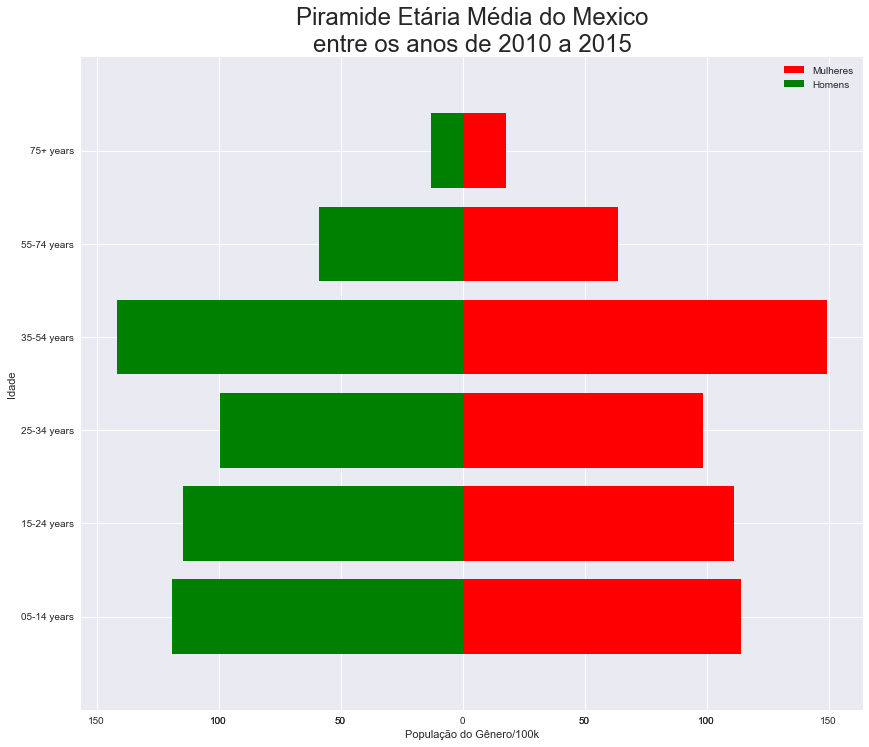

In [216]:
generate_growth_pop_age_barh(mexico_mean, 'age', 'populationFemale', 'populationMale', getLabels(mexico_mean,
                              'populationFemale', 'populationMale', True), getLabels(mexico_mean,'populationFemale',
                            'populationMale'),'População do Gênero/100k', 'Idade', [-1,6], 'Piramide Etária Média do Mexico\nentre os anos de 2010 a 2015',
                             ['Mulheres','Homens'])

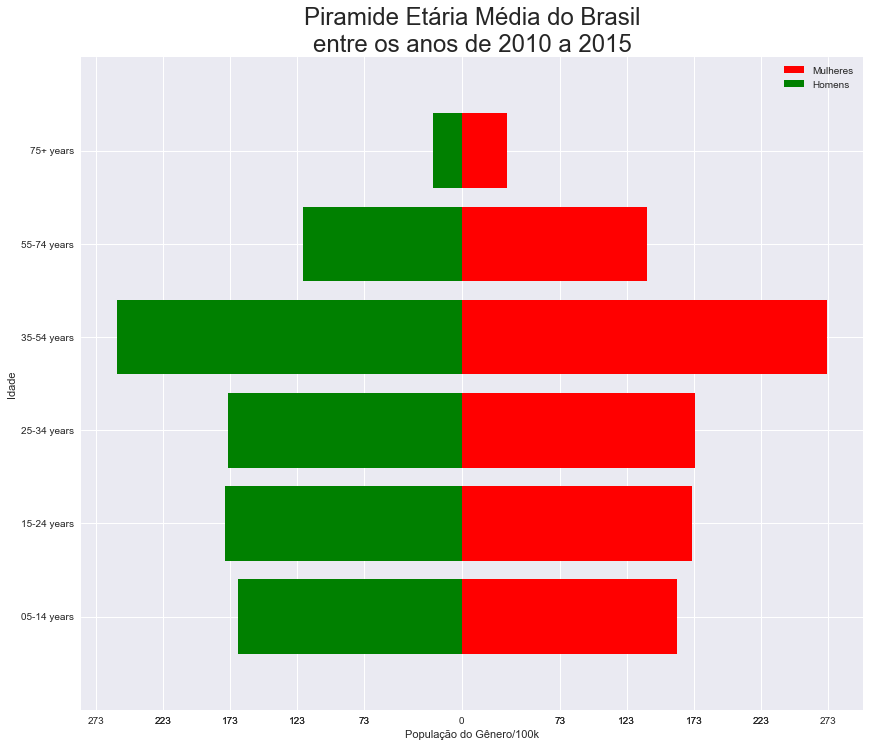

In [217]:
generate_growth_pop_age_barh(brazil_mean, 'age', 'populationFemale', 'populationMale', getLabels(brazil_mean,
                              'populationFemale', 'populationMale', True), getLabels(brazil_mean,'populationFemale',
                            'populationMale'),'População do Gênero/100k', 'Idade', [-1,6], 'Piramide Etária Média do Brasil\nentre os anos de 2010 a 2015',
                             ['Mulheres','Homens'])

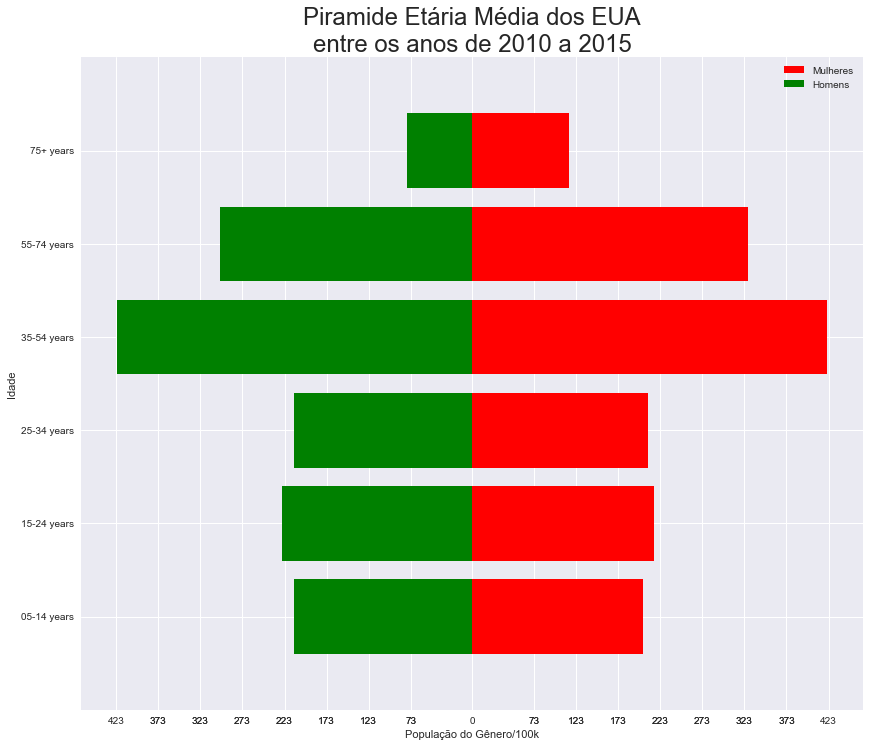

In [218]:
generate_growth_pop_age_barh(unitedStates_mean, 'age', 'populationFemale', 'populationMale', getLabels(unitedStates_mean,
                              'populationFemale', 'populationMale', True), getLabels(unitedStates_mean,'populationFemale',
                            'populationMale'),'População do Gênero/100k', 'Idade', [-1,6], 'Piramide Etária Média dos EUA\nentre os anos de 2010 a 2015',
                             ['Mulheres','Homens'])

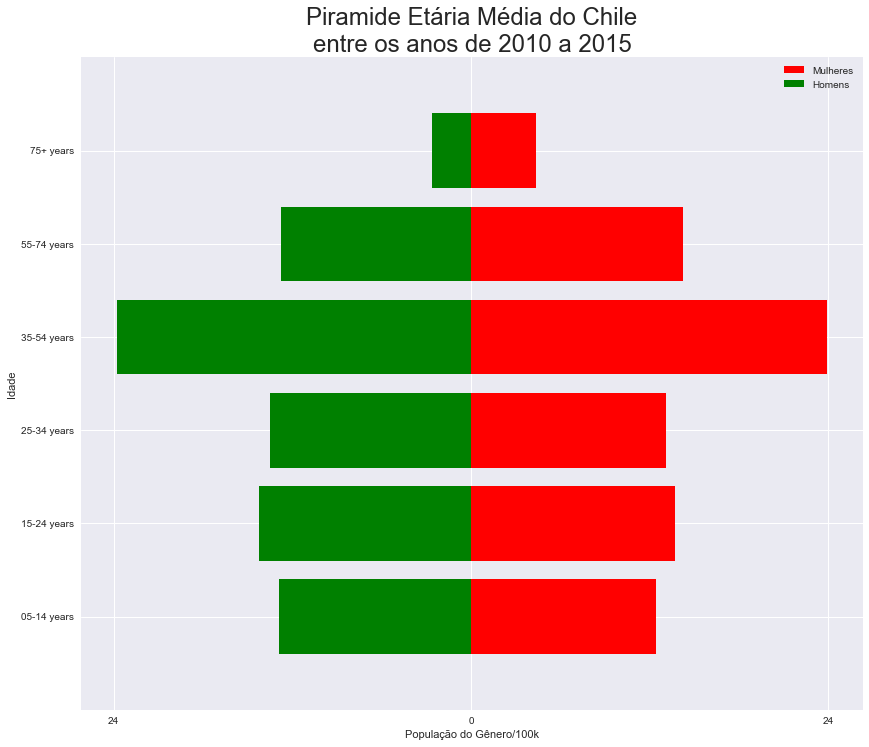

In [219]:
generate_growth_pop_age_barh(chile_mean, 'age', 'populationFemale', 'populationMale', getLabels(chile_mean,
                              'populationFemale', 'populationMale', True), getLabels(chile_mean,'populationFemale',
                            'populationMale'),'População do Gênero/100k', 'Idade', [-1,6], 'Piramide Etária Média do Chile\nentre os anos de 2010 a 2015',
                             ['Mulheres','Homens'])

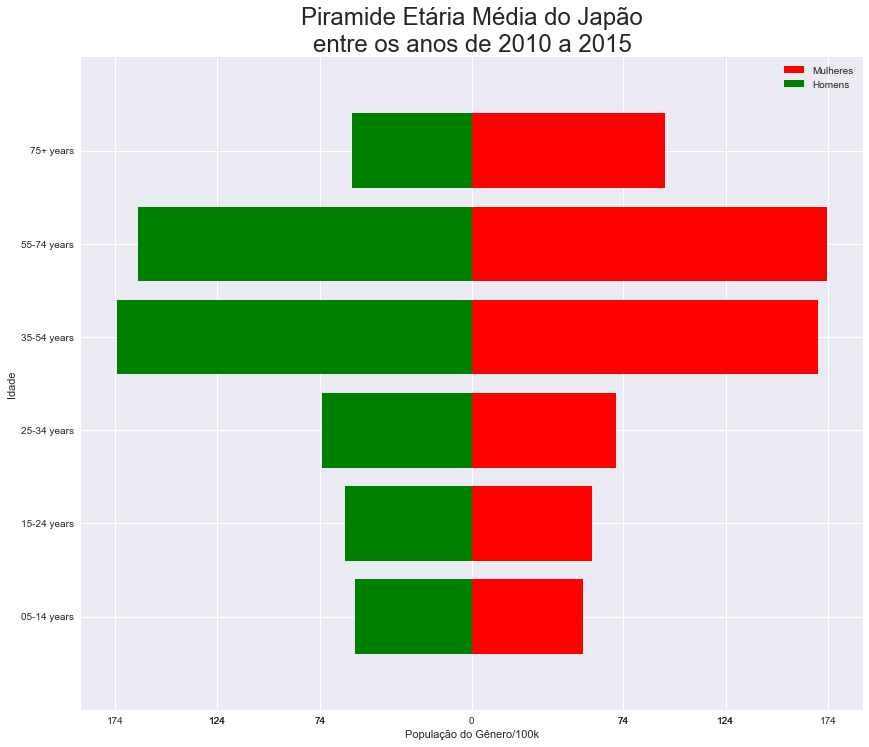

In [220]:
generate_growth_pop_age_barh(japan_mean, 'age', 'populationFemale', 'populationMale', getLabels(japan_mean,
                              'populationFemale', 'populationMale', True), getLabels(japan_mean,'populationFemale',
                            'populationMale'),'População do Gênero/100k', 'Idade', [-1,6], 'Piramide Etária Média do Japão\nentre os anos de 2010 a 2015',
                             ['Mulheres','Homens'])

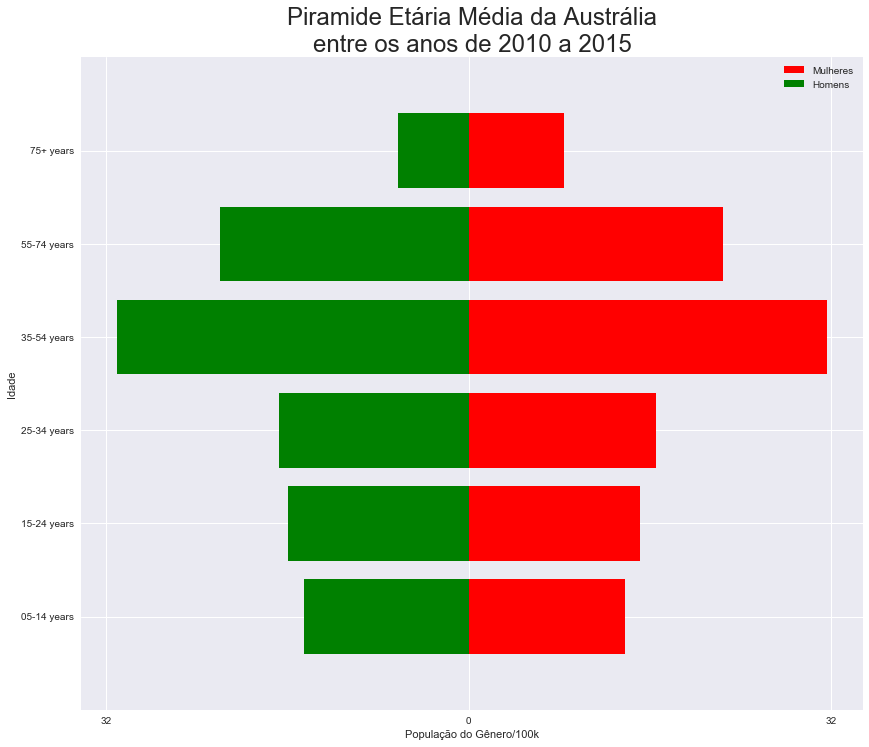

In [221]:
generate_growth_pop_age_barh(australia_mean, 'age', 'populationFemale', 'populationMale', getLabels(australia_mean,
                              'populationFemale', 'populationMale', True), getLabels(australia_mean,'populationFemale',
                            'populationMale'),'População do Gênero/100k', 'Idade', [-1,6], 'Piramide Etária Média da Austrália\nentre os anos de 2010 a 2015',
                             ['Mulheres','Homens'])

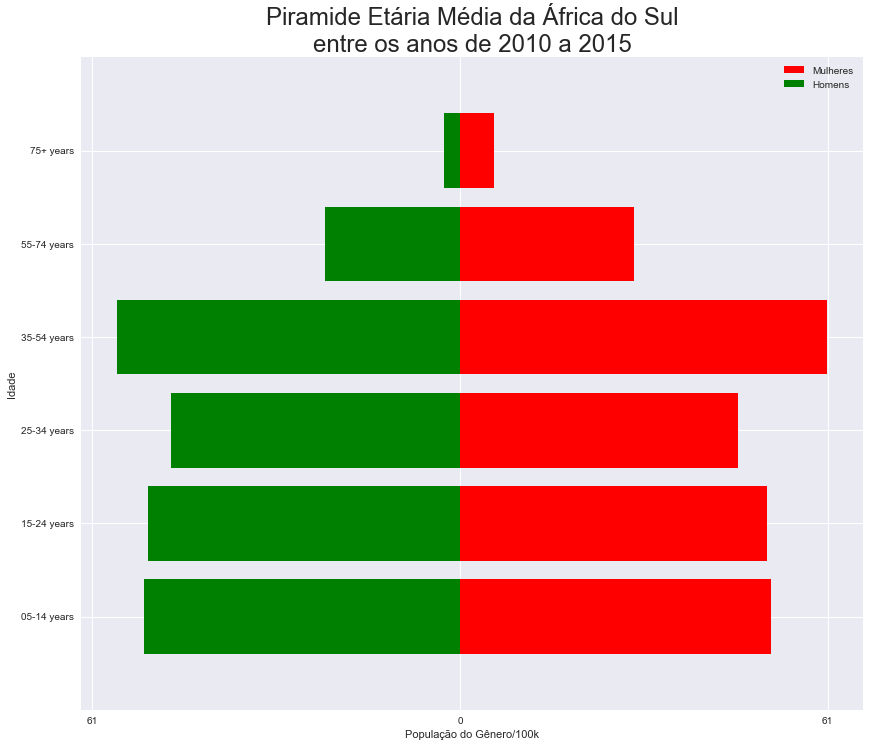

In [222]:
generate_growth_pop_age_barh(southAfrica_mean, 'age', 'populationFemale', 'populationMale', getLabels(southAfrica_mean,
                              'populationFemale', 'populationMale', True), getLabels(southAfrica_mean,'populationFemale',
                            'populationMale'),'População do Gênero/100k', 'Idade', [-1,6], 'Piramide Etária Média da África do Sul\nentre os anos de 2010 a 2015',
                             ['Mulheres','Homens'])

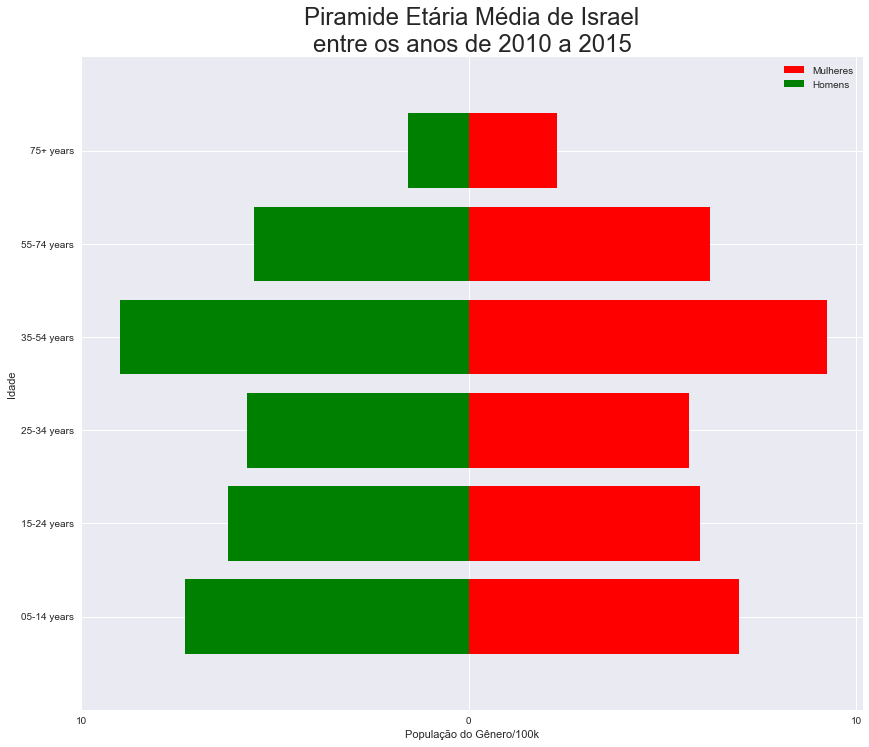

In [223]:
generate_growth_pop_age_barh(israel_mean, 'age', 'populationFemale', 'populationMale', getLabels(israel_mean,
                              'populationFemale', 'populationMale', True), getLabels(israel_mean,'populationFemale',
                            'populationMale'),'População do Gênero/100k', 'Idade', [-1,6], 'Piramide Etária Média de Israel\nentre os anos de 2010 a 2015',
                             ['Mulheres','Homens'])

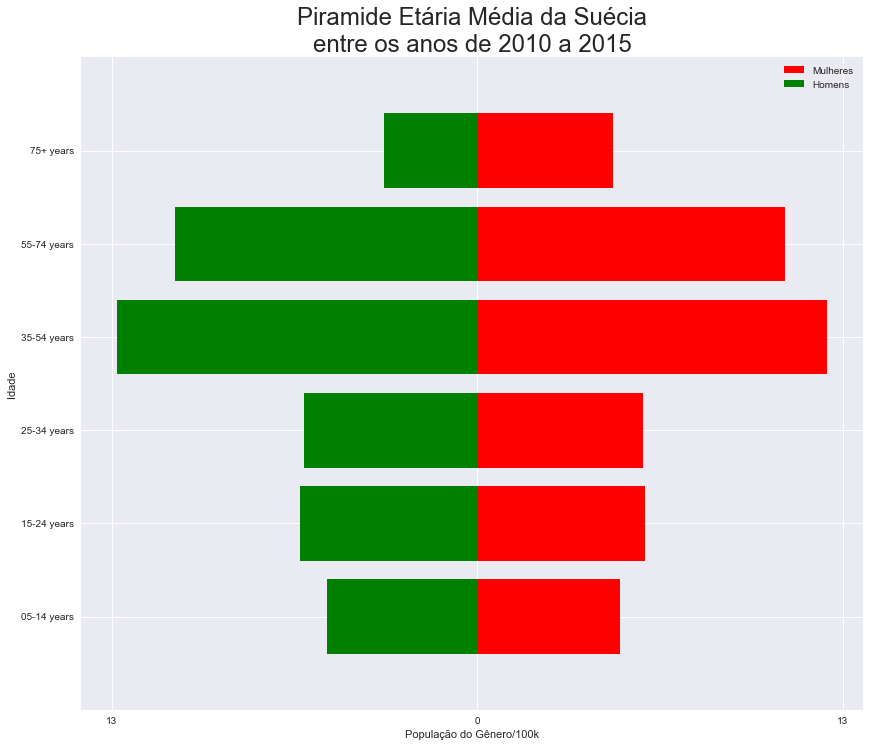

In [224]:
generate_growth_pop_age_barh(sweden_mean, 'age', 'populationFemale', 'populationMale', getLabels(sweden_mean,
                              'populationFemale', 'populationMale', True), getLabels(sweden_mean,'populationFemale',
                            'populationMale'),'População do Gênero/100k', 'Idade', [-1,6], 'Piramide Etária Média da Suécia\nentre os anos de 2010 a 2015',
                             ['Mulheres','Homens'])

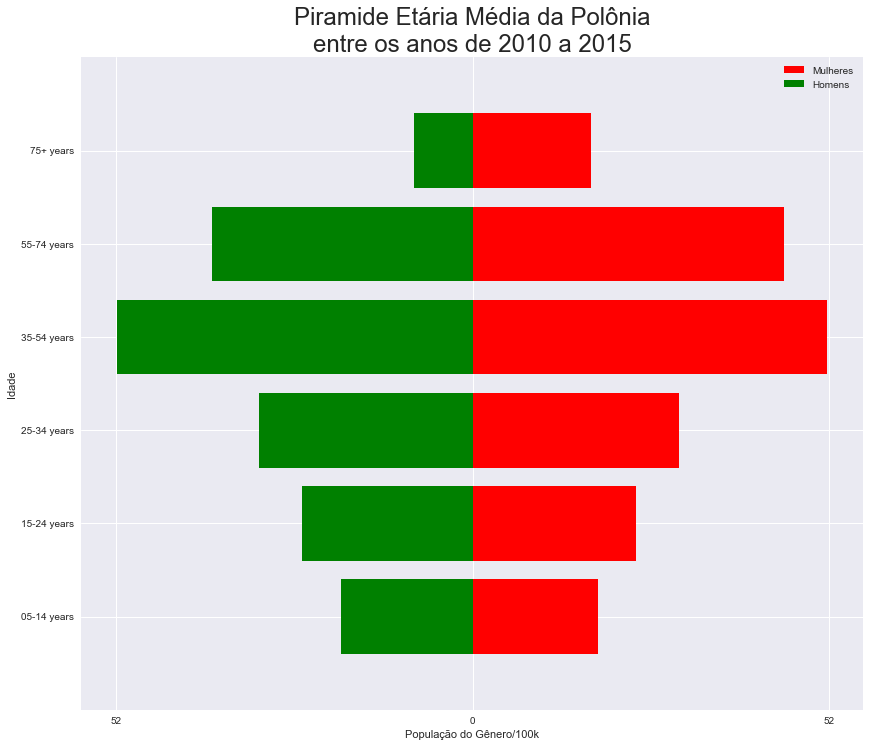

In [225]:
generate_growth_pop_age_barh(poland_mean, 'age', 'populationFemale', 'populationMale', getLabels(poland_mean,
                              'populationFemale', 'populationMale', True), getLabels(poland_mean,'populationFemale',
                            'populationMale'),'População do Gênero/100k', 'Idade', [-1,6], 'Piramide Etária Média da Polônia\nentre os anos de 2010 a 2015',
                             ['Mulheres','Homens'])

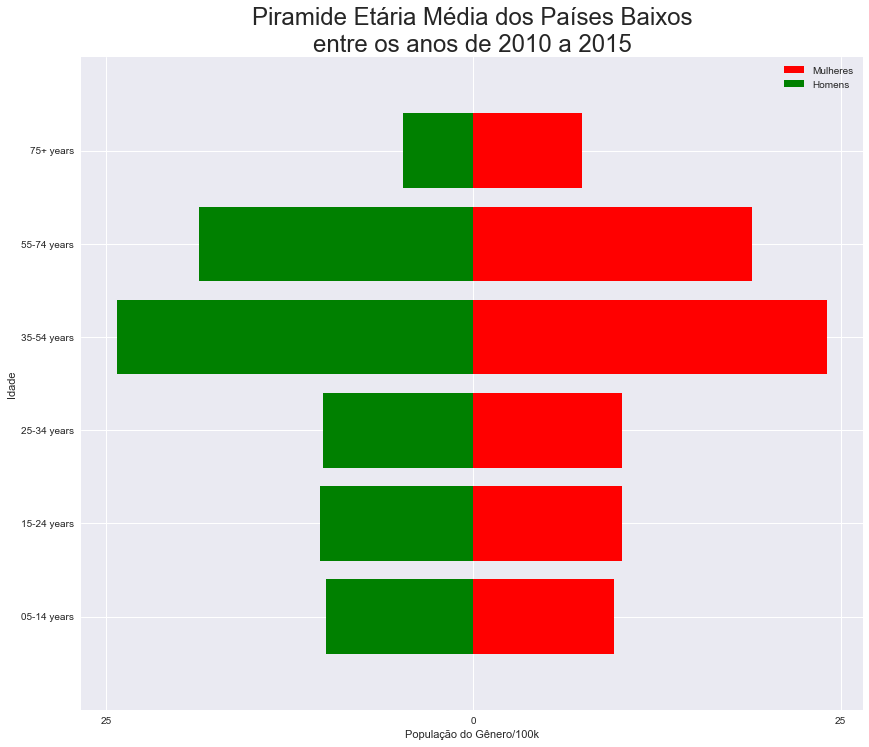

In [226]:
generate_growth_pop_age_barh(netherlands_mean, 'age', 'populationFemale', 'populationMale', getLabels(netherlands_mean,
                              'populationFemale', 'populationMale', True), getLabels(netherlands_mean,'populationFemale',
                            'populationMale'),'População do Gênero/100k', 'Idade', [-1,6], 'Piramide Etária Média dos Países Baixos\nentre os anos de 2010 a 2015',
                             ['Mulheres','Homens'])

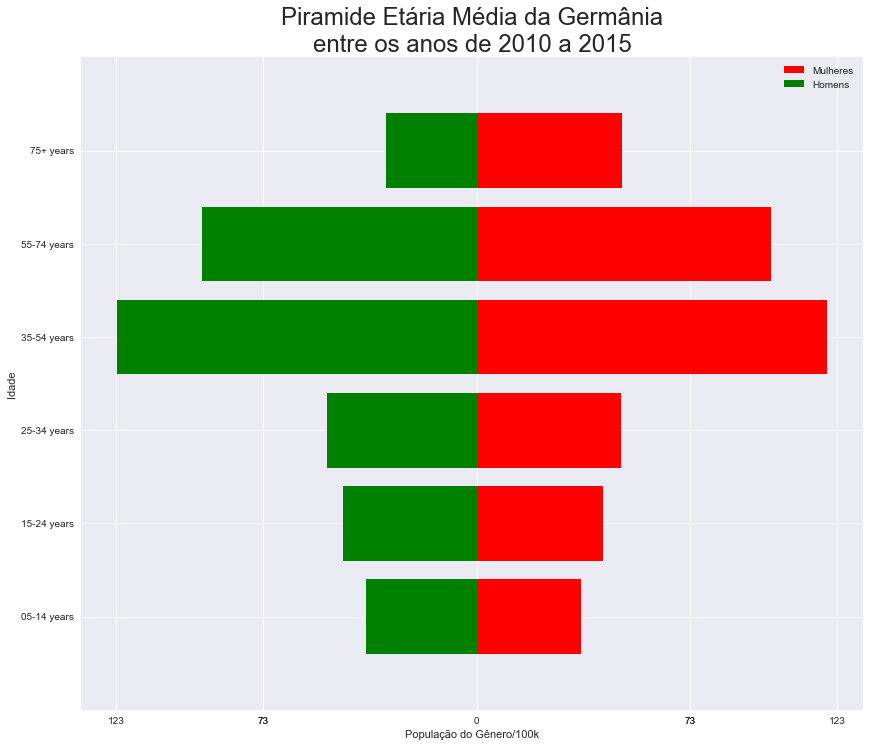

In [227]:
generate_growth_pop_age_barh(germany_mean, 'age', 'populationFemale', 'populationMale', getLabels(germany_mean,
                              'populationFemale', 'populationMale', True), getLabels(germany_mean,'populationFemale',
                            'populationMale'),'População do Gênero/100k', 'Idade', [-1,6], 'Piramide Etária Média da Germânia\nentre os anos de 2010 a 2015',
                             ['Mulheres','Homens'])

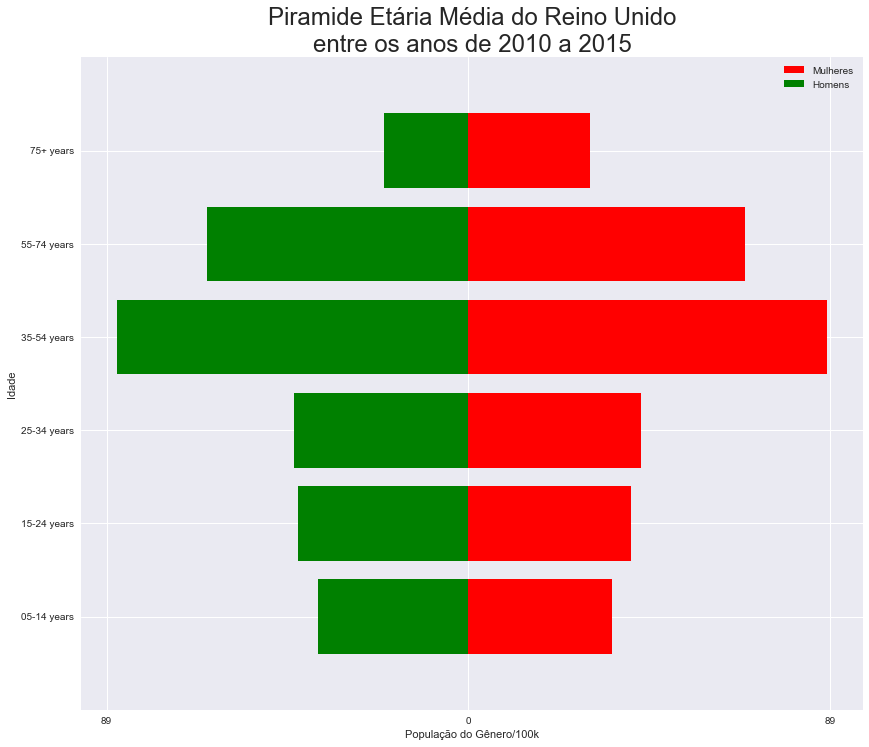

In [228]:
generate_growth_pop_age_barh(unitedKingdom_mean, 'age', 'populationFemale', 'populationMale', getLabels(unitedKingdom_mean,
                              'populationFemale', 'populationMale', True), getLabels(unitedKingdom_mean,'populationFemale',
                            'populationMale'),'População do Gênero/100k', 'Idade', [-1,6], 'Piramide Etária Média do Reino Unido\nentre os anos de 2010 a 2015',
                             ['Mulheres','Homens'])

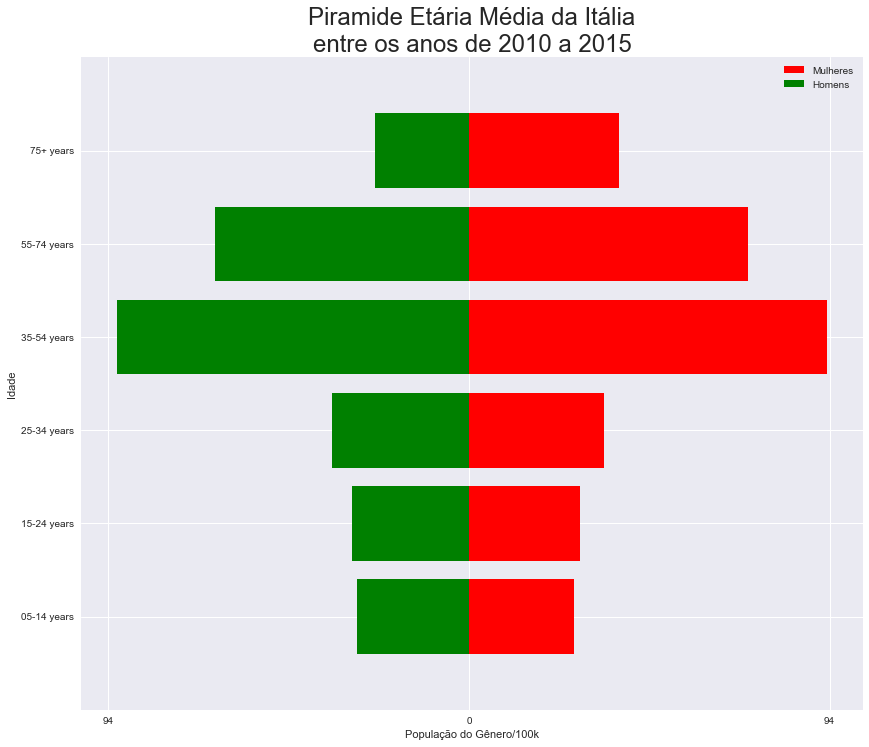

In [229]:
generate_growth_pop_age_barh(italy_mean, 'age', 'populationFemale', 'populationMale', getLabels(italy_mean,
                              'populationFemale', 'populationMale', True), getLabels(italy_mean,'populationFemale',
                            'populationMale'),'População do Gênero/100k', 'Idade', [-1,6], 'Piramide Etária Média da Itália\nentre os anos de 2010 a 2015',
                             ['Mulheres','Homens'])

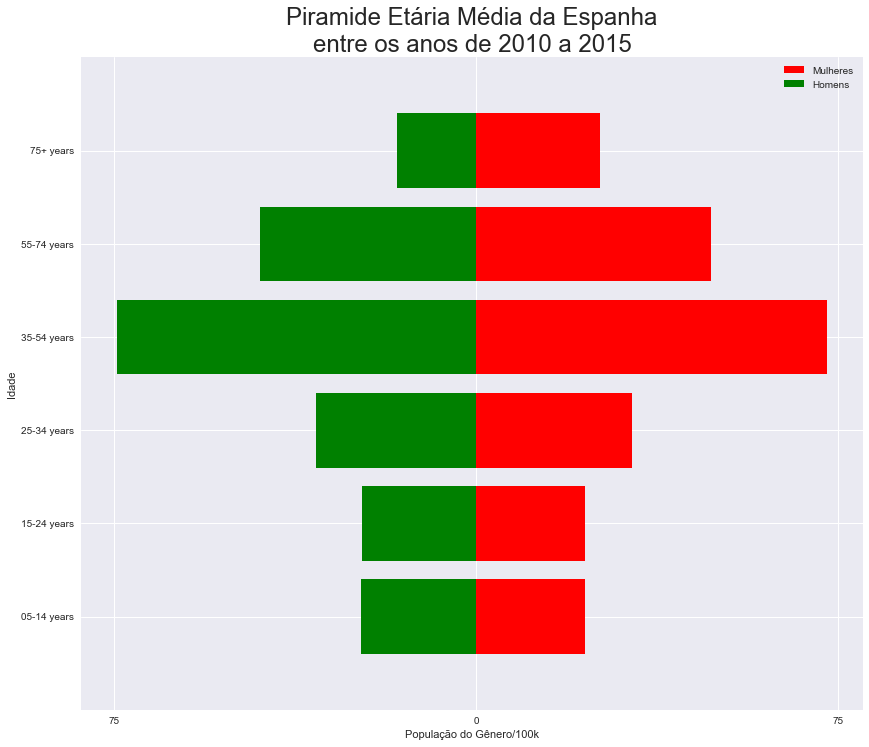

In [230]:
generate_growth_pop_age_barh(spain_mean, 'age', 'populationFemale', 'populationMale', getLabels(spain_mean,
                              'populationFemale', 'populationMale', True), getLabels(spain_mean,'populationFemale',
                            'populationMale'),'População do Gênero/100k', 'Idade', [-1,6], 'Piramide Etária Média da Espanha\nentre os anos de 2010 a 2015',
                             ['Mulheres','Homens'])

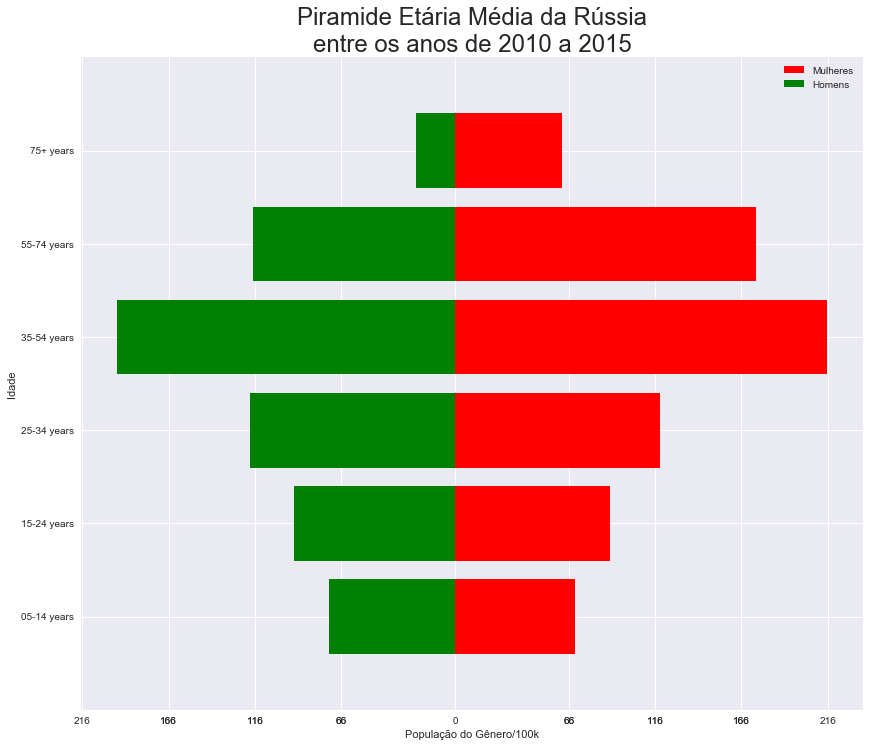

In [231]:
generate_growth_pop_age_barh(russia_mean, 'age', 'populationFemale', 'populationMale', getLabels(russia_mean,
                              'populationFemale', 'populationMale', True), getLabels(russia_mean,'populationFemale',
                            'populationMale'),'População do Gênero/100k', 'Idade', [-1,6], 'Piramide Etária Média da Rússia\nentre os anos de 2010 a 2015',
                             ['Mulheres','Homens'])

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



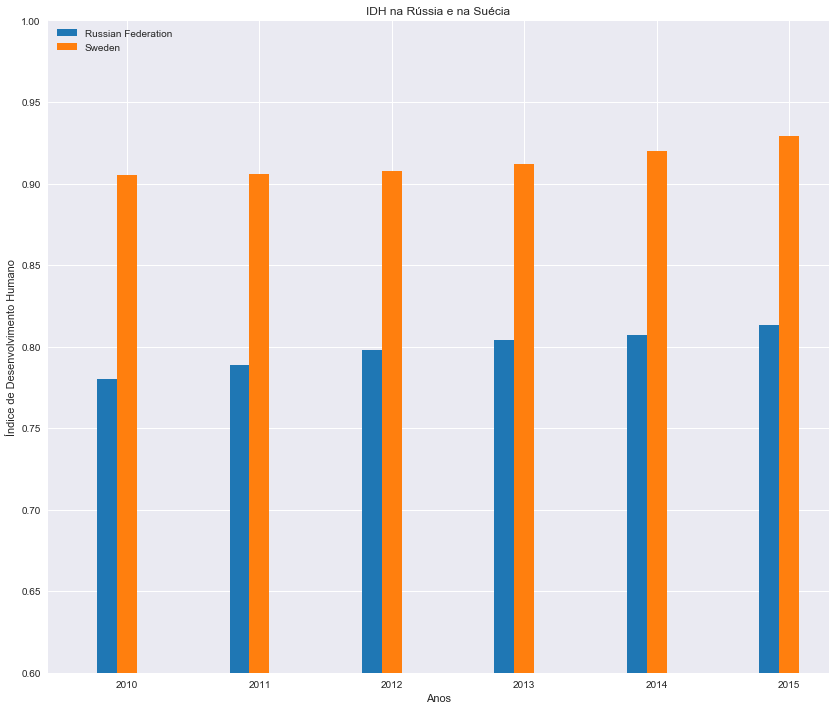

In [232]:
generate_chart_hdi_total(my_group, "Índice de Desenvolvimento Humano", "Anos", "IDH na Rússia e na Suécia", russia_sweden_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



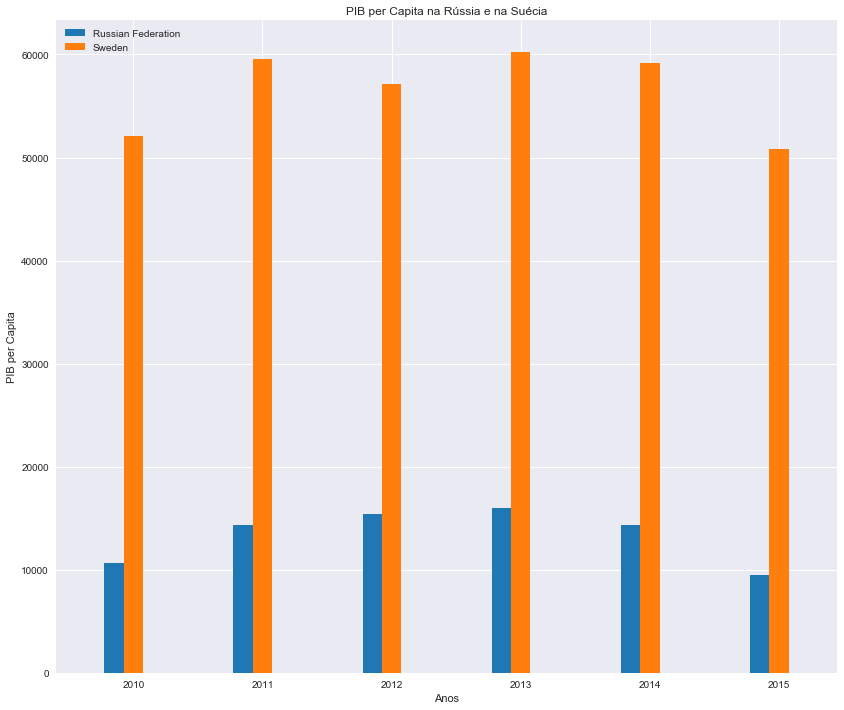

In [233]:
generate_chart_gdp_pc(my_group, "PIB per Capita", "Anos", "PIB per Capita na Rússia e na Suécia", russia_sweden_colors)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



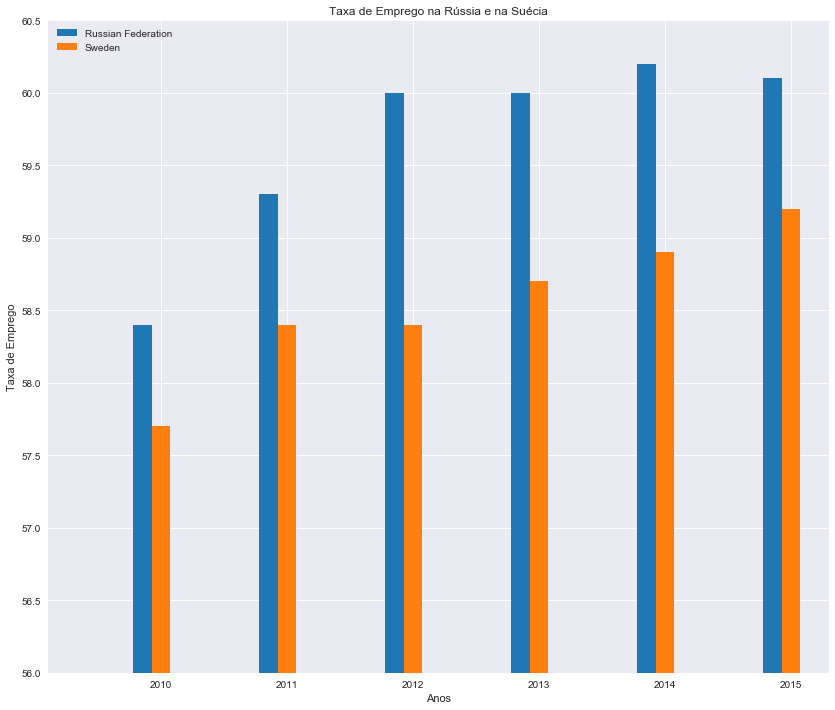

In [234]:
generate_chart_employment(my_group, "Taxa de Emprego", "Anos", "Taxa de Emprego na Rússia e na Suécia", russia_sweden_colors, 56,60.5)

C:\Users\Eudes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



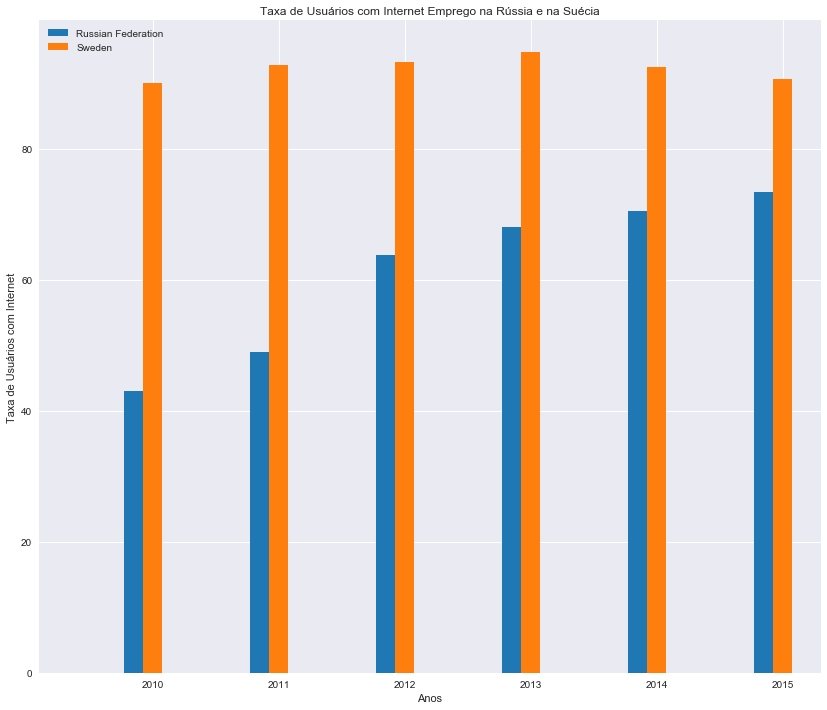

In [235]:
generate_chart_users_internet(my_group, "Taxa de Usuários com Internet", "Anos", "Taxa de Usuários com Internet Emprego na Rússia e na Suécia", russia_sweden_colors)